In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import threading
import os
import matplotlib.mlab as ml
import h5py


from scipy import optimize
import sys
#sys.path.insert(0, '/home/yihanw/repositories/athena/vis/python')
sys.path.insert(0, '/home/yihanw/projects/Athena/vis/python')
import athena_read as ar
plt.rcParams['agg.path.chunksize']=100000
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#plt.style.use('seaborn-deep')
plt.rc('grid', linestyle="--", color='gray')
#plt.rc('xtick', direction = 'in')
#plt.rc('ytick', direction= 'in')
# @working path
FIG_PATH     = '../tex/figs/'
WEB_FIG_PATH = '../tex/web-figs/'
DATA_PATH    = '../code/'

# @global settings
WEB_FIG_DPI  = 600
FIG_DPI      = 800
FIG_EXT      = '.pdf'
WEB_FIG_EXT  = '.png'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT, web_fig_ext = WEB_FIG_EXT):
    if name != '':
        handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0)
    #handler.savefig(WEB_FIG_PATH + name + web_fig_ext, dpi = WEB_FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'athena_read'

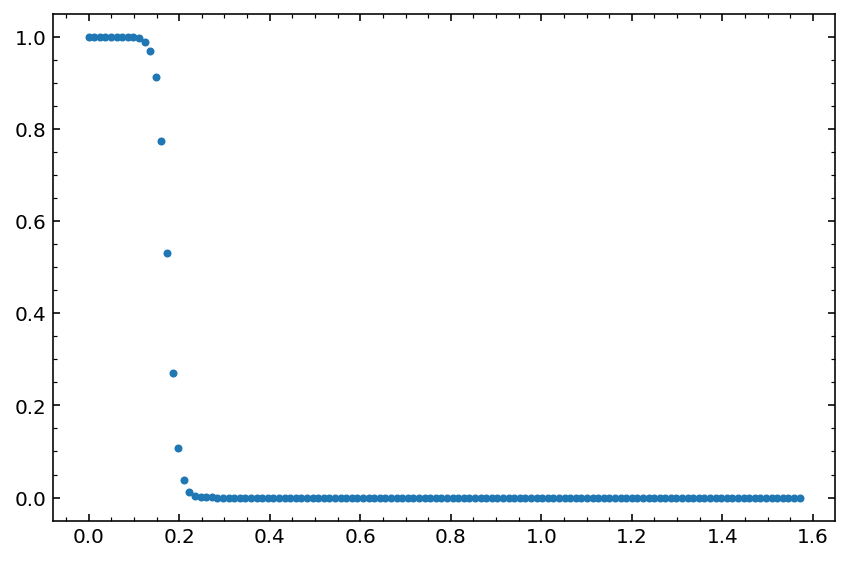

In [43]:
nn = 128
x = np.linspace(0,0.5*np.pi,nn)
#x=np.linspace(-100,100,100)
theta0=0.1745
y=1/(1+np.exp( 1/0.01745/2*np.pi*(x-theta0)))
plt.plot(x,y,marker='.',lw=0)
#plt.yscale('log')

In [ ]:
idx = random.choice(9999,1000,replace=False)
print(idx)
len_unit = 0.01/80
v_unit = 0.5/1.923
x=np.array(hf['i'])[idx]*len_unit
y=np.array(hf['j'])[idx]*len_unit
z=np.array(hf['k'])[idx]*len_unit
vx=np.array(hf['iv'])[idx]*v_unit
vy=np.array(hf['jv'])[idx]*v_unit
vz=np.array(hf['kv'])[idx]*v_unit

In [76]:
5e51/2/np.pi/(0.8*3e10)/(5e7)**2/(1-np.cos(0.1745)) /159/1.67**2/(3e10)**2

2188.304501276601

In [103]:
np.sqrt(29.673*79/4*2)

34.235705046048054

In [100]:
np.sqrt(79*29.68412593414587/4*2)

34.24212280800888

In [14]:
289/17

17.0

In [40]:
v2 = vx**2+vy**2+vz**2
print(np.sqrt(v2.mean()))

1.9320061509987432


In [ ]:
print(x,y)
d = np.stack((np.ones(x.shape),x,y,z,vx,vy,vz)).transpose()
savetxt("init.txt", d, fmt='%.6e', delimiter=' ', newline='\n')

600
1.014938257040963 [1.66666000e-03 1.69155700e-03 1.71682591e-03 1.74247230e-03
 1.76850179e-03 1.79492013e-03 1.82173311e-03 1.84894662e-03
 1.87656666e-03 1.90459930e-03 1.93305069e-03 1.96192710e-03
 1.99123487e-03 2.02098045e-03 2.05117038e-03 2.08181129e-03
 2.11290992e-03 2.14447311e-03 2.17650780e-03 2.20902103e-03
 2.24201996e-03 2.27551183e-03 2.30950401e-03 2.34400397e-03
 2.37901931e-03 2.41455771e-03 2.45062699e-03 2.48723509e-03
 2.52439005e-03 2.56210003e-03 2.60037334e-03 2.63921839e-03
 2.67864371e-03 2.71865798e-03 2.75926999e-03 2.80048867e-03
 2.84232309e-03 2.88478245e-03 2.92787607e-03 2.97161343e-03
 3.01600416e-03 3.06105801e-03 3.10678488e-03 3.15319483e-03
 3.20029806e-03 3.24810494e-03 3.29662596e-03 3.34587181e-03
 3.39585330e-03 3.44658143e-03 3.49806735e-03 3.55032238e-03
 3.60335801e-03 3.65718590e-03 3.71181788e-03 3.76726597e-03
 3.82354236e-03 3.88065942e-03 3.93862970e-03 3.99746597e-03
 4.05718114e-03 4.11778836e-03 4.17930094e-03 4.24173241e-03
 4

(array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20.]),
 array([-2.77815299, -2.64957518, -2.52099737, -2.39241956, -2.26384176,
        -2.13526395, -2.00668614, -1.87810833, -1.74953053, -1.62095272,
        -1.49237491, -1.3637971 , -1.23521929, -1.10664149, -0.97806368,
        -0.84948587, -0.72090806, -0.59233026, -0.46375245, -0.33517464,
        -0.20659683, -0.07801902,  0.05055878,  0.17913659,  0.3077144 ,
         0.43629221,  0.56487001,  0.69344782,  0.82202563,  0.95060344,
         1.07918125]),
 <BarContainer object of 30 artists>)

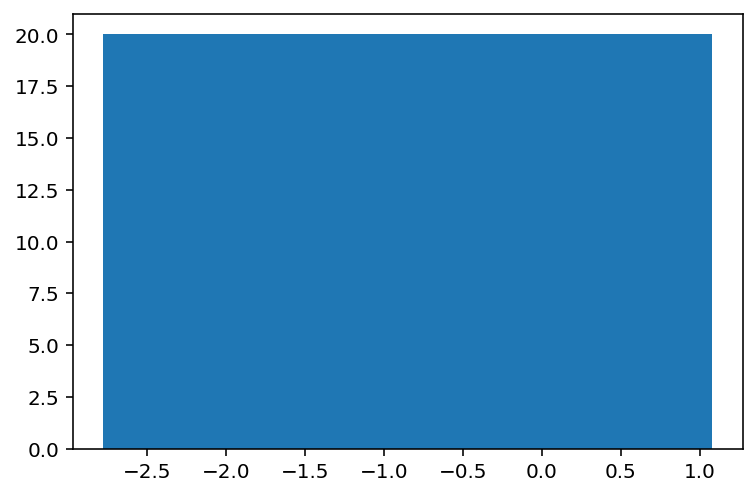

In [17]:
xmax = 12
xmin = 1.66666e-3
N = 600 #int(2312/4)
print(N)
x= np.logspace(np.log10(xmin),np.log10(xmax),N)
dx = np.diff(x)
r = dx[1::]/dx[0:-1]
print(r[0],x)
tt=np.linspace(0,np.pi/2,128)
print((tt< 10/180.0*np.pi).sum())
plt.hist(np.log10(x),30)

In [25]:

EK = 0.5*0.01*(2e33)*(0.2*3e10)**2

print(np.sqrt(EK/7.9E49))

2.13470420089446


In [17]:
11.6*0.043333**3*2*np.pi*(0.5+3.0/8*np.pi)

0.009952020284728585

In [21]:
6.7*np.sqrt(4*np.pi)*7.28e10

1729064180635.3489

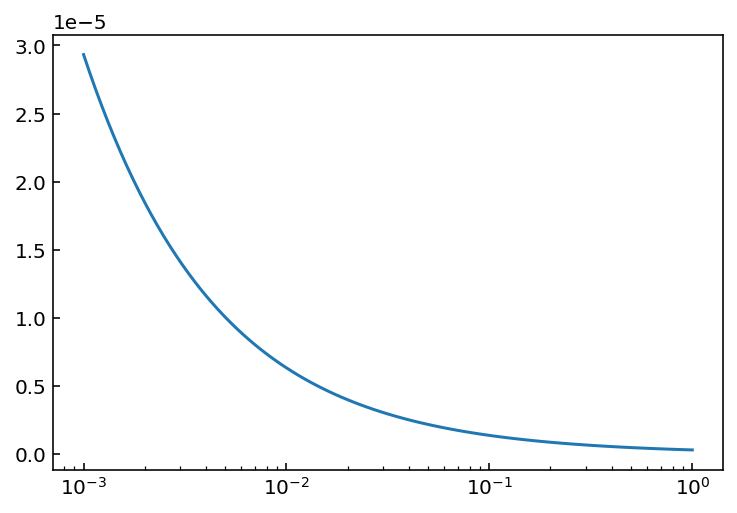

In [6]:
rc = 0.0444
r = 10**np.linspace(-3,0,100)
rho = 0.2*(rc/r)**2
p=1e-6*rho**(1.3333333333333)
eta = p/rho*4
plt.plot(r, eta)
plt.xscale('log')

In [106]:
jet_d = ar.athdf('slow_domain_nbr/Jet.out1.00023.athdf')

In [106]:
jet_d = ar.athdf('domain_r/Jet.out1.00301.athdf')

In [15]:
jet_d = ar.athdf('data/domain-hk7-end.athdf')

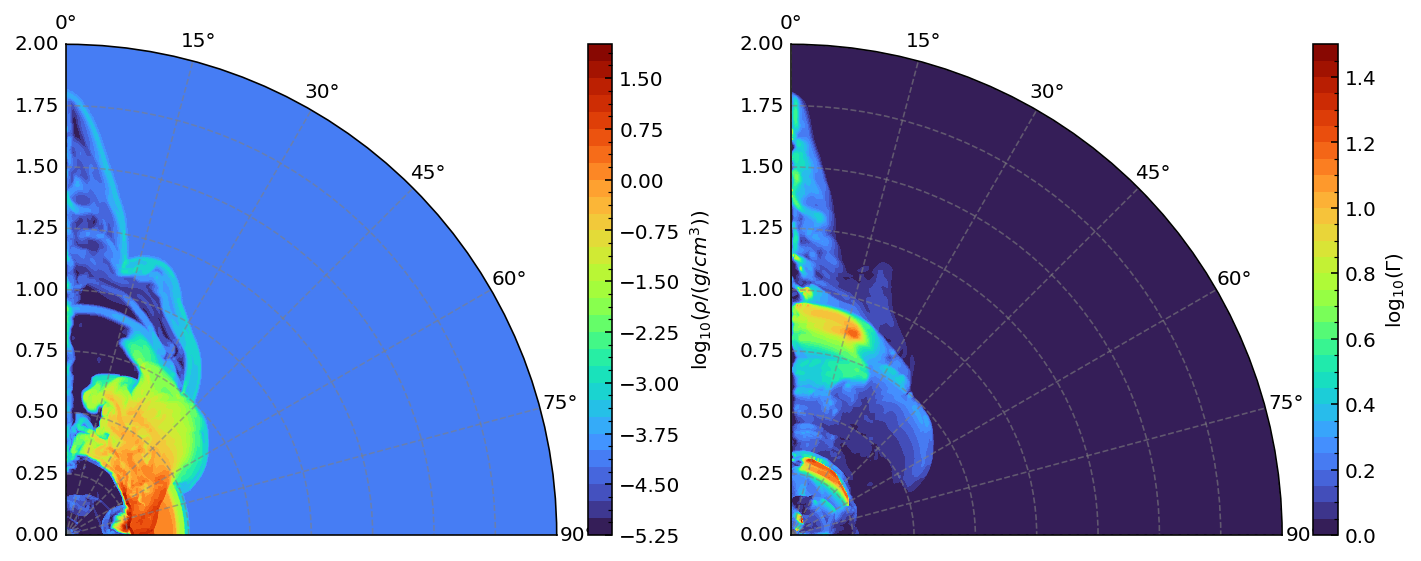

In [16]:

def draw_jet2_plot(d, quantity,unit):

    y = d['x2v']
    x = d['x1v']
    #print(x,y)
    u1 =d['vel1'][0]
    u2 =d['vel2'][0]
    u3 =d['vel3'][0]
    rho = d['rho'][0]
    gamma = np.sqrt(1+u1*u1 +u2*u2+u3*u3)
    gamma_r = np.sqrt(1+u1*u1)
    press = d['press'][0]
    
    
    h = 1+ 4*press/rho
    upper = 2
    r,theta =np.meshgrid(x,y)
    #r=r*3e10/1e7
    p = np.log10(d[quantity][0,:,:]*74)
    
    fg = plt.figure(figsize=(10,4))
    ax1 = fg.add_subplot(1,2,1, projection='polar')
    ax1.set_theta_offset(0.5*np.pi)
    #$ax1.yaxis.tick_right()
    ax1.set_theta_offset(pi/2)
    ax1.set_theta_direction(-1)
    l = ax1.contourf(theta, (r), p ,levels=30,cmap=cm.turbo)
   
    ax1.set_xlim(0,0.5*np.pi)
    ax1.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    
    cbar.set_label('$\\log_{10}(\\rho/(g/cm^3))$', rotation=90)
    
    ax = fg.add_subplot(122,projection='polar',sharey=ax1)
    #ax.yaxis.tick_right()
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r),np.log10(gamma),levels=30,cmap=cm.turbo)
    
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$\\log_{10}(\\Gamma)$', rotation=90)
    
    
    plt.tight_layout()
    plt.savefig('figs/domain-k7-hi-end.jpg',dpi=400)
    #print(press)
draw_jet2_plot(jet_d,'rho',74)

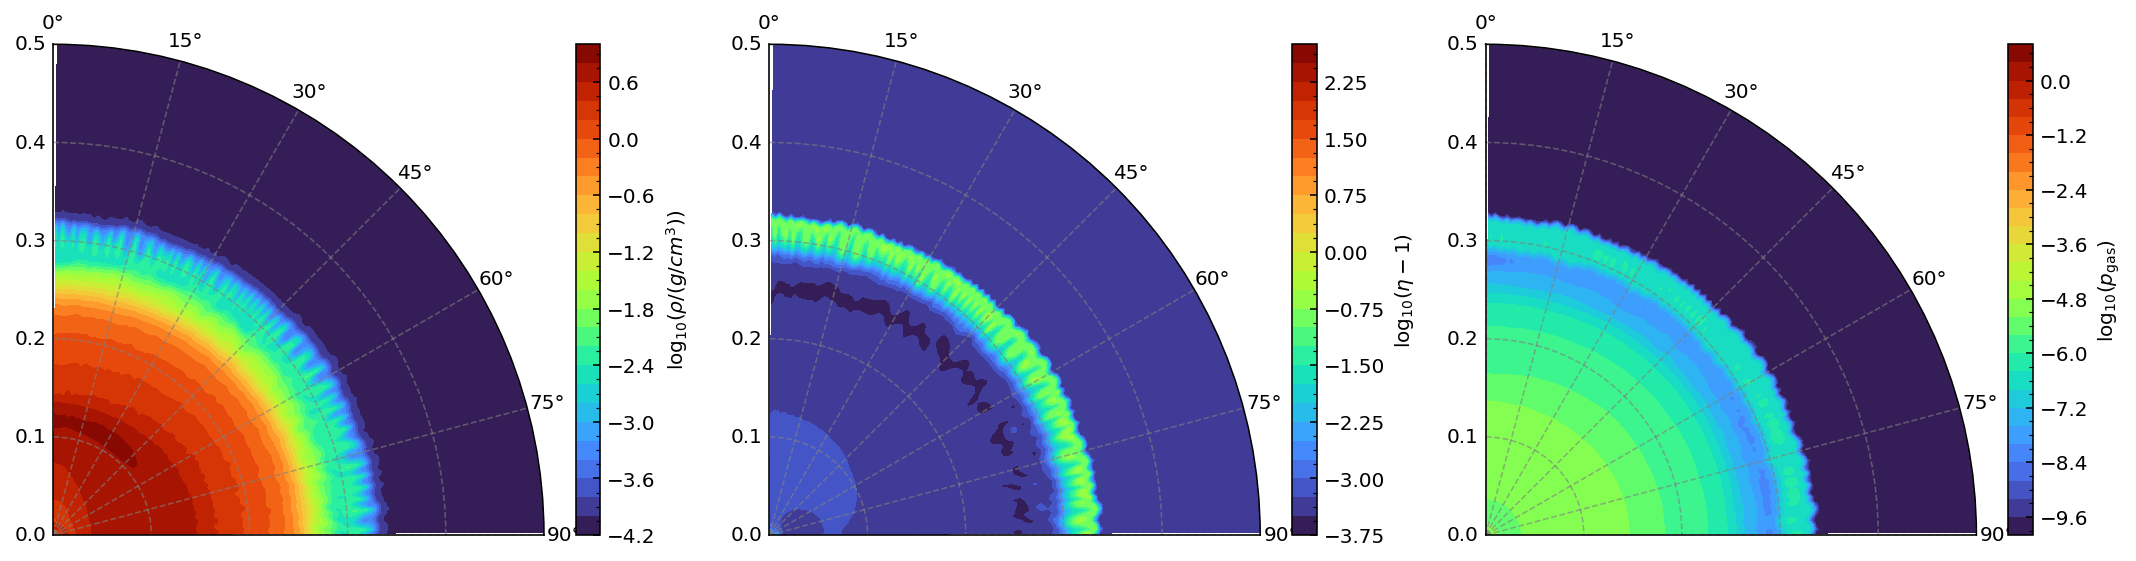

In [25]:
def draw_jet1_plot(d, quantity,unit):

    y = d['x2v']
    x = d['x1v']
    #print(x,y)
    u1 =d['vel1'][0]
    u2 =d['vel2'][0]
    u3 =d['vel3'][0]
    rho = d['rho'][0]
    gamma = np.sqrt(1+u1*u1 +u2*u2+u3*u3)
    gamma_r = np.sqrt(1+u1*u1)
    press = d['press'][0]
    
    
    h = 1+ 4*press/rho
    upper = .5
    r,theta =np.meshgrid(x,y)
    #r=r*3e10/1e7
    p = np.log10(d[quantity][0,:,:]*74)
    
    fg = plt.figure(figsize=(15,4))
    ax1 = fg.add_subplot(1,3,1, projection='polar')
    ax1.set_theta_offset(0.5*np.pi)
    #$ax1.yaxis.tick_right()
    ax1.set_theta_offset(pi/2)
    ax1.set_theta_direction(-1)
    l = ax1.contourf(theta, (r), p ,levels=30,cmap=cm.turbo)
   
    ax1.set_xlim(0,0.5*np.pi)
    ax1.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    
    cbar.set_label('$\\log_{10}(\\rho/(g/cm^3))$', rotation=90)
    
    ax = fg.add_subplot(132,projection='polar',sharey=ax1)
    #ax.yaxis.tick_right()
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r),np.log10(4*press/rho),levels=30,cmap=cm.turbo)
    
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$\\log_{10}(\\eta-1)$', rotation=90)
    
    
    ax = fg.add_subplot(133,projection='polar',sharey=ax1)
    #ax.yaxis.tick_right()
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r),np.log10(press),levels=30,cmap=cm.turbo)
    
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$\\log_{10}(p_{\\rm gas})$', rotation=90)
    
    
    plt.tight_layout()
    plt.savefig('figs/ej-eta-hi.jpg',dpi=400)
draw_jet1_plot(jet_d,'rho',74)

In [190]:
11*(4**-8)

0.0001678466796875

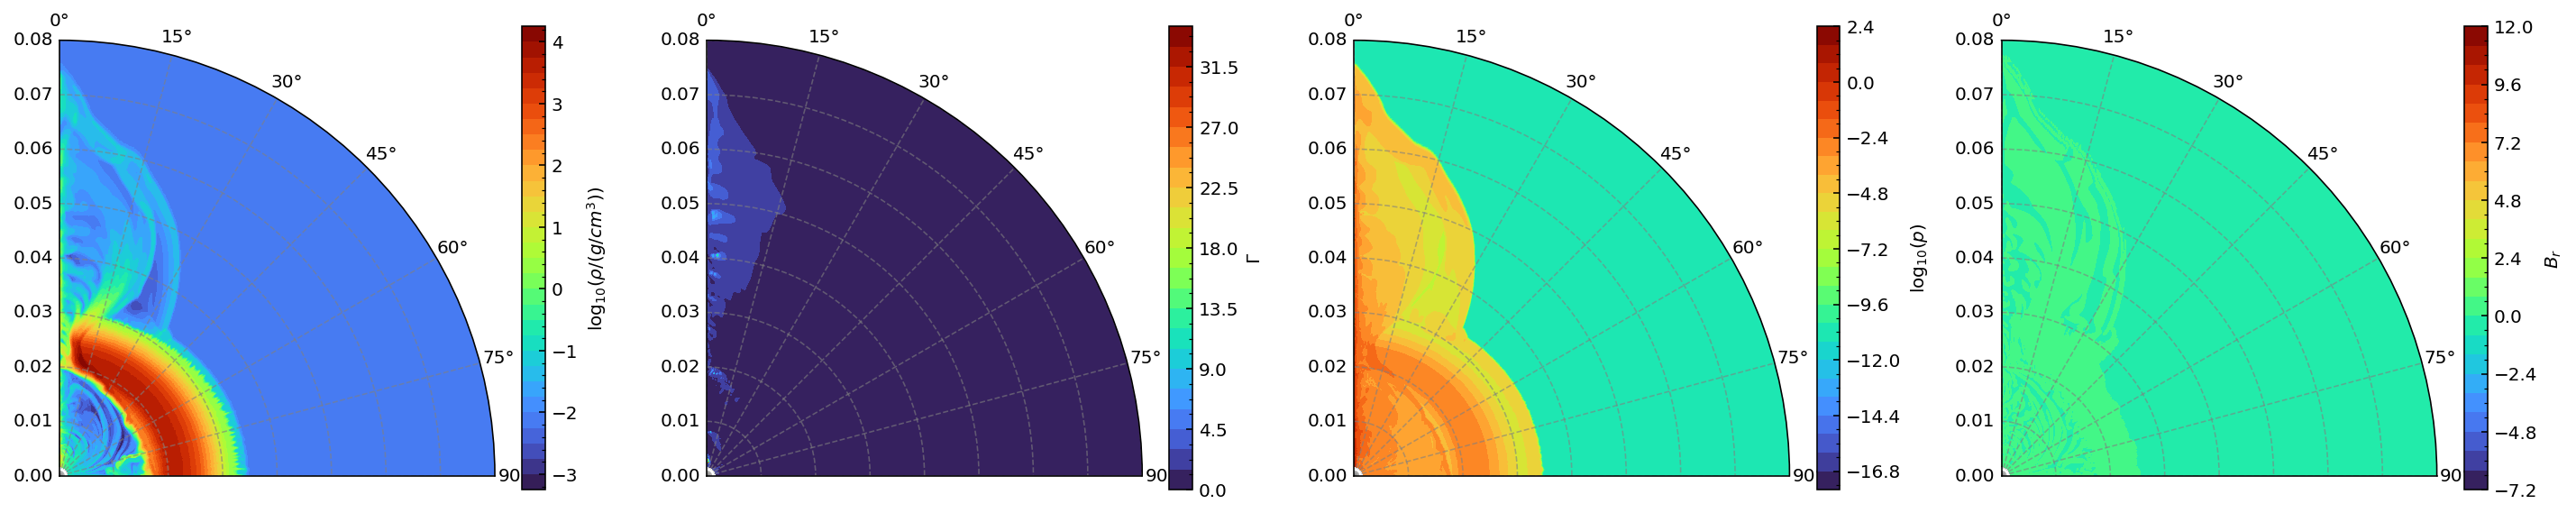

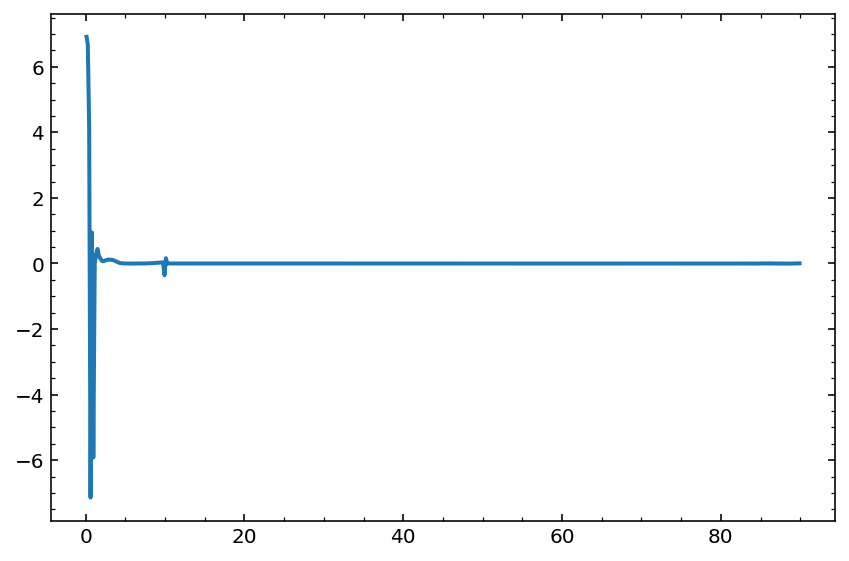

In [15]:
def draw_jet_plot(d, quantity,unit):
    
    y = d['x2v']
    x = d['x1v']
    u1 =d['vel1'][0]
    u2 =d['vel2'][0]
    u3 =d['vel3'][0]
    rho = d['rho'][0]
    gamma = np.sqrt(1+u1*u1 +u2*u2+u3*u3)
    gamma_r = np.sqrt(1+u1*u1)
    press = d['press'][0]
    bx = d['Bcc1'][0]
    by = d['Bcc2'][0]
    bz = d['Bcc3'][0]
    b = np.sqrt(bx**2+by**2+bz**2)
    b2 = (bx**2 +bz**2/gamma_r**2)
    
    h = 1+ 4*press/rho+b2/rho
    hb = b2/2/rho
    
    upper = 0.08
    r,theta =np.meshgrid(x,y)
    #r=r*3e10/1e7
    p = np.log10(d[quantity][0,:,:]*unit)
    
    fg = plt.figure(figsize=(20,4))
    ax = fg.add_subplot(1,4,1,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r), p ,levels=30,cmap=cm.turbo)
   
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    
    cbar.set_label('$\\log_{10}(\\rho/(g/cm^3))$', rotation=90)
    
    ax = fg.add_subplot(142,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r),(gamma) ,levels=30,cmap=cm.turbo)
    
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$\\Gamma$', rotation=90)
    
    ax = fg.add_subplot(143,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r),np.log10(press) ,levels=30,cmap=cm.turbo)
   
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$\\log_{10}(p)$', rotation=90)
    
    ax = fg.add_subplot(144,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    #ax.streamplot(theta, (r),bx,by,color='k',density=1.5)
    l = ax.contourf(theta, (r),(bx),levels=30,cmap=cm.turbo)
    #ax.streamplot(theta, r,bx,by,color='k')
    #ax.contour(theta, (r), b ,levels=10,linewidths=0.5,colors='w',linestyles='-')
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$B_r$', rotation=90)
    #plt.savefig('pure-hydro-low-floor.png',dpi=500)
    #print( bx,bz)
    plt.figure()
    plt.plot(y*180/np.pi,bx[:,0])
    #plt.plot(x,bx[0,:])
draw_jet_plot(jet_d,'rho',74)

In [79]:
1e6/4/4**8

3.814697265625

In [45]:
(5e7-1e6)/(1.3e9/(0.2*3e10))/3e10

0.007538461538461538

In [43]:
5e7/1.3e9*0.2

0.007692307692307693

In [46]:
1.3e9/3e10

0.043333333333333335

In [19]:
4.04e4*1e-3/74

0.5459459459459459

In [13]:
#g = 4.0/3


m=1e18
l=1e7
t=2/6000

M=2e33
L= 3e10
T = 1

print((M/L)**0.5/T*np.sqrt(4*np.pi)*6.7 )

#k=m**(1-g)/t**2/l**(1-3*g)

#K=M**(1-g)/T**2/L**(1-3*g)

#print(1e-7*k/K)
#print(m/l/t**2,M/L/T**2)
#print(M/L**3)
#print(3.1e12/ ((m/l)**0.5/t)/np.sqrt(4*np.pi),((M/L)**0.5/T)/np.sqrt(4*np.pi))

6132451260187.252


In [16]:
print(1.2e+50/1.8e54)

6.666666666666667e-05


In [9]:
(1.35e-6)**1.333333*1e-5

1.4920394787739706e-13

In [148]:
3e10*0.2*1.5/1e7

900.0

In [107]:
1e-7* (74/1e-3)**(4.0/3)*1e17/6.6666666e22

4.6601535103288633e-07

In [4]:
6.666666e22/(74)**(4.0/3)

2.1458518647155664e+20

In [5]:
1e-7*1e21/2.1e20

4.761904761904762e-07

In [49]:
g = 1/np.sqrt(1-0.64-0.25)
gr = 1/np.sqrt(1-0.64)
pave= 615389.3246795435
rho =4e4
print(rho)
b=0.2
y =4*b**2*(np.log(1+1/b**2) -1/(1+b**2) ) #=2*b*(np.arctan(1/b)-b/(b**2+1))
B2 = 1830**2+915**2
vB = 1830*0.5 + 915*0.8
print(y)
b2 = y*1830**2/gr**2+915**2
b2 = B2/g/g+vB*82
hb = b2/rho
h=1+4*pave/rho
print(h,hb, h+hb, (h+hb))

40000.0
0.3674492922372833
62.538932467954346 14.88819375 77.42712621795434 77.42712621795434


In [44]:
0.54/0.24

2.2500000000000004

In [84]:
sr =915**2/2/pave
sp =y*1830**2/2/pave/gr**2
print(sr,sp,sr+sp,h+0.5*(h-1)*(sr+sp))

0.6802401068916614 0.359933393993407 1.0401735008850683 234.86128970228822


In [161]:
1e-4/74

1.3513513513513515e-06

In [407]:
1/np.sqrt(1-0.64-0.16)

2.23606797749979

In [408]:
265/2.236

118.51520572450804

In [401]:
np.sqrt(np.pi)*16.6

29.422733925031565

In [85]:
def draw_B_2d(d, quantity,unit):
    
    y = d['x2v']
    x = d['x1v']
    u1 =d['vel1'][0]
    u2 =d['vel2'][0]
    u3 =d['vel3'][0]
    gamma = np.sqrt(1+u1*u1 +u2*u2+u3*u3)
    press = d['press'][0]
    bx = d['Bcc1'][0]
    by = d['Bcc2'][0]
    bz = d['Bcc3'][0]
    b2 = (bx**2 + by**2 +bz**2)
    print(bx)
    plt.hist(bx[bx<0])
    return
    
    upper = 0.01
    r,theta =np.meshgrid(x,y)
    fg = plt.figure(figsize=(4,3))
    ax = fg.add_subplot(111,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r), bx,levels=30,cmap=cm.turbo)
    #ax.contour(theta, (r), gamma ,levels=10,linewidths=0.5,colors='w',linestyles='-')
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,upper)
    cbar = fg.colorbar(l)
    #ax.set_xscale('log')
    cbar.set_label('$B_{\\rm phi}$ [G]', rotation=90)

    #plt.savefig('old-h0.01s.png',dpi=500)
    #plt.savefig('highr-0.001.jpg',dpi=500)
jet_d = ar.athdf('jet2d/Jet.out1.00001.athdf')
draw_B_2d(jet_d,'rho',74)

KeyError: 'Bcc1'

0.36775055914443017
21.1929424629096
0.00012461633949377096


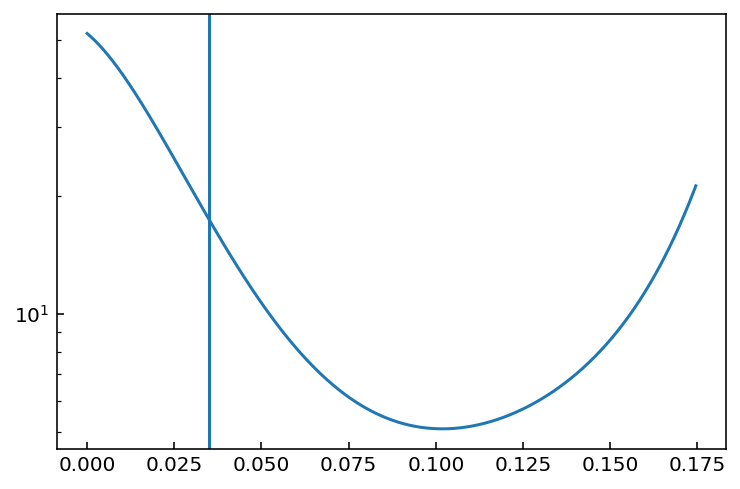

In [48]:
tj = 0.17453292519943295
tm = tj*0.2
tt=np.linspace(0,tj,1000)
ff = 2*tt/tm/(1+(tt/tm)**2)
print(np.trapz(ff**2*np.sin(tt),tt)/(1-np.cos(tj)))
p=10**( 11.5961*(tt/tj)**5-30.9*(tt/tj)**4+30.6*(tt/tj)**3-10.4*(tt/tj)**2-1.285*(tt/tj)+6.539)*9e17/6e22#/(615389 )
plt.plot(tt,p)
plt.yscale('log')
plt.axvline(tm)
print(p[-1])
ave = np.trapz(p*np.sin(tt),tt)/(1-np.cos(tj))
print(ave*9e17/6.6666666e22)

In [41]:
bj = 915
bp1 = 2*1830*5/(1+5**2)
p1=1412862.8308606397 
pb = bj**2/2*(1-0.5**2) + bp1**2/2/1.66667**2+0.5*bp1*0.8*915 
pa =p1+pb
rho=1.79e10 *(5/7.1)**(-2)*(0.25+np.sin(0.17)**3)
pp = 1e-7*rho**(4.0/3)
print(pa*9e17/6.7e22,pb*9e17/6.7e22,pp*9e17/6.7e22,pp/pa,rho*1e-3/74)

27.85434763396503 8.875593189568379 25.888269962431394 0.9294157703002083 0.5591852499484878


In [17]:
1e15*(1e-3)**(1.0/3)/3e10/3e10 *(74/1e-3)**(4.0/3)*9e17/6.6666666e22

4.660153510328865e-06

In [6]:
3.36**2/2*(1-0.5**2)+ (2*6.72*5/(1+5**2))**2/2/1.66667**2+0.5*(2*6.72*5/(1+5**2))*0.8*3.36 

8.909760870717387

In [15]:
4.76e-7*9

4.284e-06

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


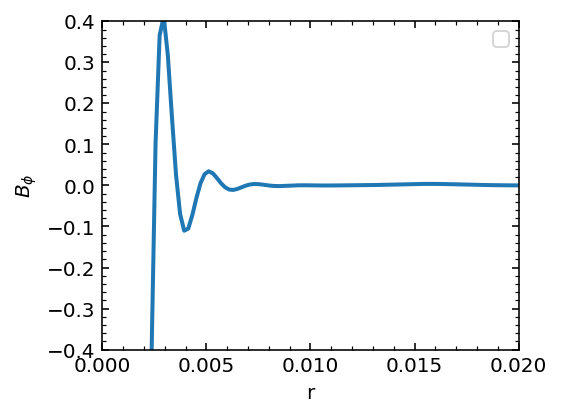

In [82]:
def draw_B(d):
    y = d['x2v']
    x = d['x1v']
    u1 =d['vel1'][0]
    u2 =d['vel2'][0]
    u3 =d['vel3'][0]
    gamma = np.sqrt(1+u1*u1 +u2*u2+u3*u3)
   
    bz = d['Bcc3'][0]
    
    
    plt.figure(figsize=(4,3))
    b= (bz[5,:])
    #plt.loglog(x,np.abs(b))
    plt.plot(x,(b))
    #plt.plot(x,1/x/500,ls='--',c='k',label='1/r')
    #plt.plot(x,-1/x/500,ls='--',c='k',label='1/r')
    #plt.loglog(x,1/x/200,ls='--',c='k',label='1/r')
    plt.ylim(-0.4,0.4)
    plt.xlim(0,0.02)
    plt.xlabel('r')
    plt.ylabel('$B_{\\phi}$')
    plt.legend()
    plt.savefig("high-r-0.001B.jpg",dpi=500)
draw_B(jet_d)

13.181798434625449
13.089543323091272 13.181798434625449 5.116550268118407 313.56334860822665 0.43846235566334435
583.4189422787538


Text(0.5, 0, '$\\theta$')

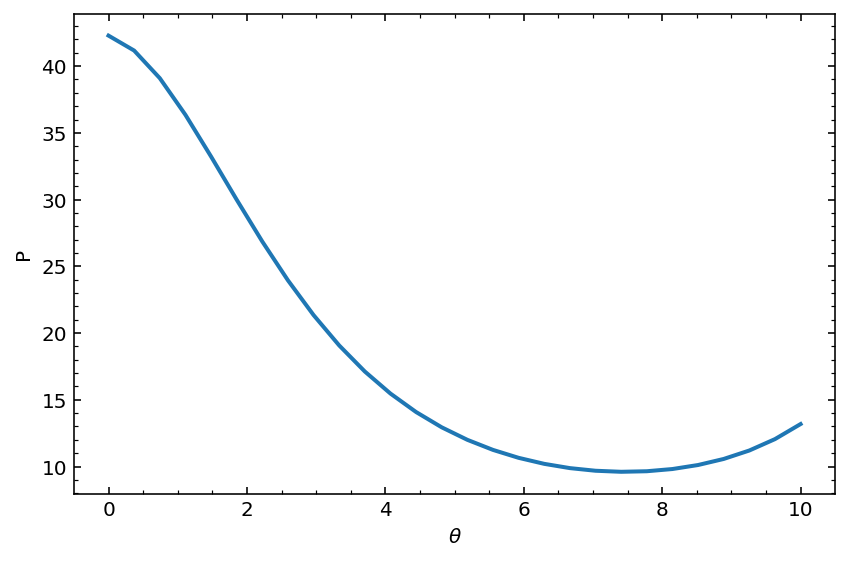

In [36]:
tj = np.pi/180*10
n =int(256/9)
t = np.linspace(1e-8,tj,n)
t1 = np.linspace(1e-8,tj,n+1)
vr = 0.8
vpm = 0.5
tm = tj*0.4
rho = 0.24
br = 3.388
B =br*2.0
bp = 2*B*t/tm/(1+(t/tm)**2)
dbpdt = np.diff(2*B*t1/tm/(1+(t1/tm)**2))/(tj/(n+1))

vp = vpm*t/tj

dvpdt = np.diff(vpm*t1/tj)/(tj/(n+1))

Gr = 1/np.sqrt(1-vr*vr)
G = 1/np.sqrt(1-vr*vr- vp*vp)
b2 = br*br+bp*bp/Gr**2
pa = 27
p1 = pa -br**2/2*(1-vp[-1]**2) - bp[-1]**2/2/Gr**2-vp[-1]*bp[-1]*vr*br
print(p1)

p=np.ones(t.shape)*p1
DP = np.ones(t.shape)
H = np.ones(t.shape)
#pgas=np.ones(t.shape)*pa
dt = tj/(n+1)
for j in range(len(t)-1):
    i = len(t) -1 - j
    h=1+4*p[i]/rho
    dpdt = -bp[i]**2/Gr**2/t[i]-(bp[i]/Gr**2+br*vr*vp[i])*dbpdt[i]+(br*vp[i]-vr*bp[i])*br*dvpdt[i]+rho*h*G[i]**2*vp[i]**2/t[i] + br*vp[i]/t[i]*(br*vp[i]-2*bp[i]*vr)
    #if(p[i]-dpdt*dt<0):
    #    p[i-1]=0
    #else:
    p[i-1] = (p[i]-dpdt*dt)
    DP[i] = dpdt
    H[i]=h
    #pgas[i-1] = p[i-1] + br**2/2*(1-vp[i]**2) + bp[i]**2/2/Gr**2 + vp[i]*bp[i]*vr*br
p=np.array(p)
#pgas=np.array(pgas)
pave=np.trapz(p,t)/tj
bpave=np.trapz(bp**2,t)/tj
#pf=586/0.325*np.exp(-7.5*t**2/tj**2)
pave=np.trapz(p*t,t)/(tj**2/2)
print(pave,p[-1],np.sqrt(2*pave),1+4*pave/rho+(br**2+bpave/Gr/Gr)/rho,br**2/2/pave)
#print(dbpdt)

#plt.plot(t,dbpdt)
plt.plot(t/np.pi*180,p)

print(np.trapz(pf,t)/tj)
#plt.plot(t/np.pi*180,pf)
plt.ylabel('P')
plt.xlabel('$\\theta$')

In [32]:
1.6574498310198504e-01-1.5347924858438503e-01

0.012265734517600019

In [33]:
9.2174816220010003e-02-7.9923998897342252e-02

0.01225081732266775

0.0


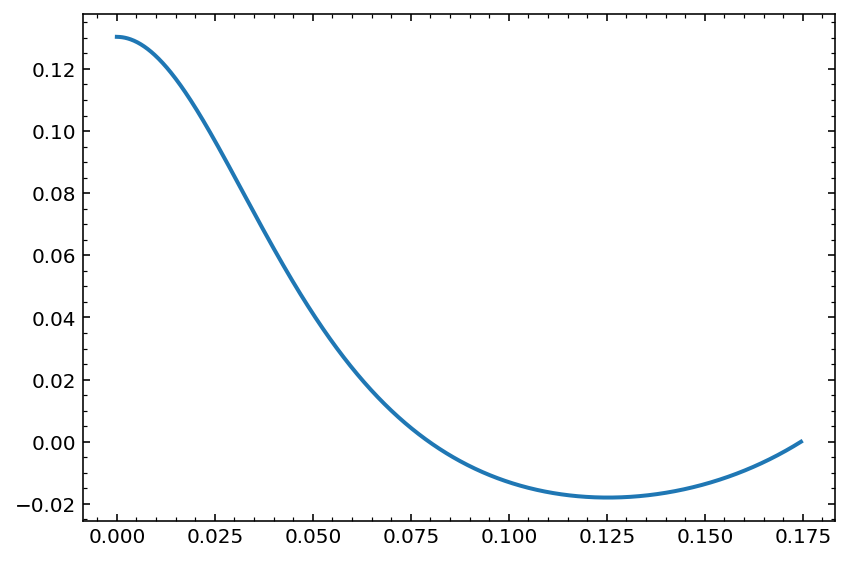

In [180]:

print(p[-1])

In [88]:
from scipy.integrate import quad

# function we want to integrate
def dpdt(p):
    h = 1+4*p/rho
    dpdt = -bp**2/Gr**2/t-(bp/Gr**2+br*vr*vp)*dbpdt+(br*vp-vr*bp)*br*dvpdt+rho*h*G**2*vp**2/t + br*vp/t*(br*vp-2*bp*vr)
    return 

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)


p=[]
for i in range(len(dpdt)):
    p.append(np.trapz(dpdt[0:i],t[0:i]))
    
p=np.array(p)+38

p_ave = np.trapz(p,t)/tj

[ 3.80000000e+01  3.80000000e+01  3.79994391e+01  3.79977566e+01
  3.79949528e+01  3.79910279e+01  3.79859823e+01  3.79798167e+01
  3.79725318e+01  3.79641282e+01  3.79546069e+01  3.79439690e+01
  3.79322156e+01  3.79193480e+01  3.79053675e+01  3.78902757e+01
  3.78740742e+01  3.78567648e+01  3.78383492e+01  3.78188294e+01
  3.77982076e+01  3.77764860e+01  3.77536668e+01  3.77297524e+01
  3.77047455e+01  3.76786487e+01  3.76514648e+01  3.76231965e+01
  3.75938470e+01  3.75634192e+01  3.75319165e+01  3.74993421e+01
  3.74656995e+01  3.74309921e+01  3.73952237e+01  3.73583979e+01
  3.73205186e+01  3.72815898e+01  3.72416155e+01  3.72005998e+01
  3.71585470e+01  3.71154614e+01  3.70713476e+01  3.70262099e+01
  3.69800532e+01  3.69328821e+01  3.68847014e+01  3.68355161e+01
  3.67853312e+01  3.67341518e+01  3.66819831e+01  3.66288304e+01
  3.65746990e+01  3.65195945e+01  3.64635222e+01  3.64064880e+01
  3.63484974e+01  3.62895563e+01  3.62296706e+01  3.61688461e+01
  3.61070889e+01  3.60444

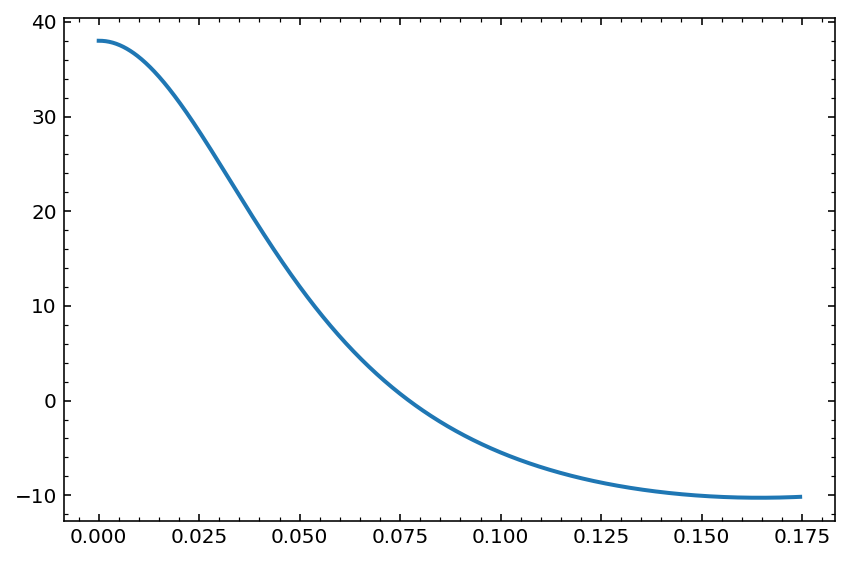

In [89]:
plt.plot(t,p)
print(p)

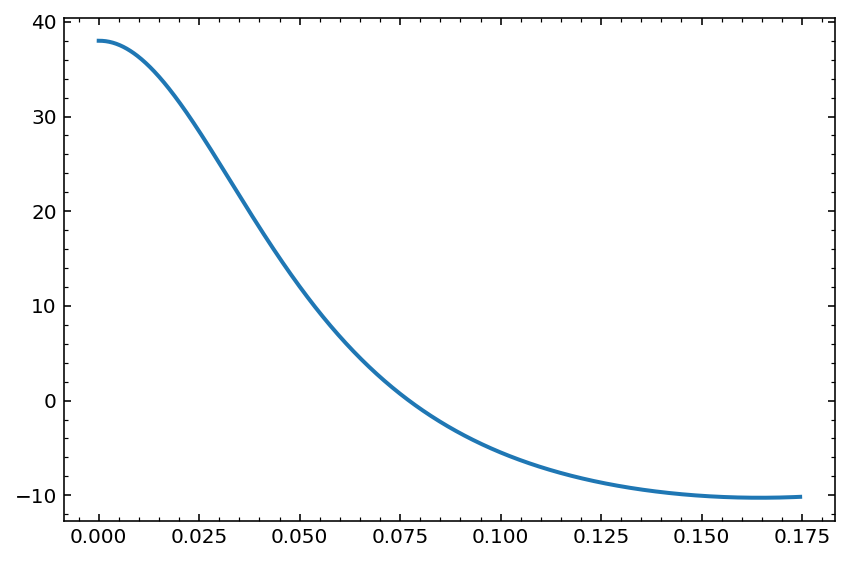

In [67]:
plt.plot(t,p)

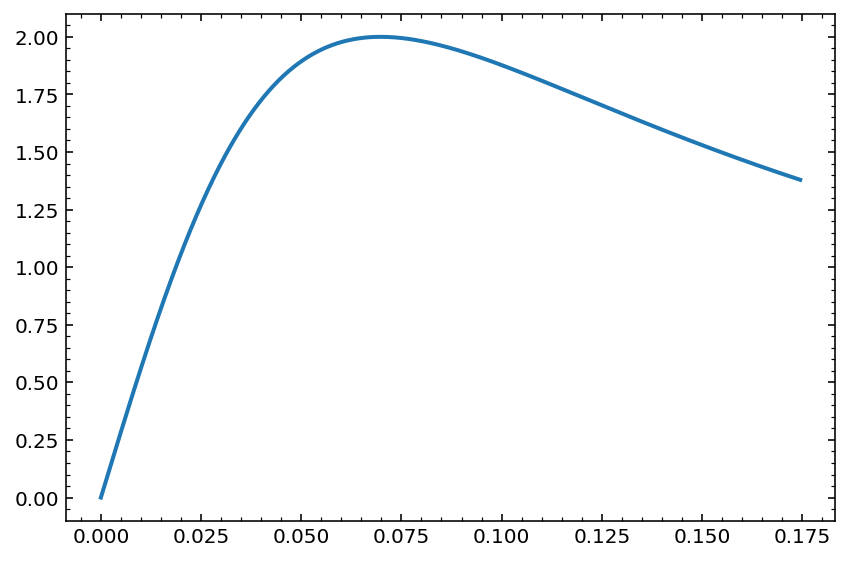

In [37]:
plt.plot(t, bp)

In [84]:
11.6**2+(23.2/1.6666)**2

328.3419022421283

In [88]:
328/0.225

1457.7777777777778

0.9175128


/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


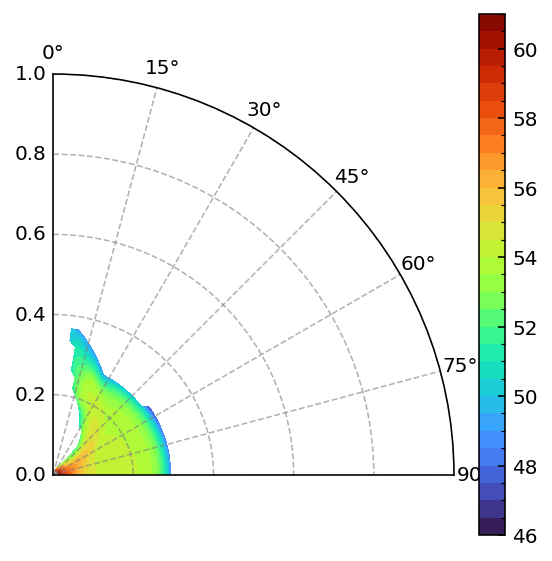

In [120]:
def calc_e(d):
    y = d['x2v']
    x = d['x1v']
    u1 =d['vel1'][0]
    u2 =d['vel2'][0]
    u3 =d['vel3'][0]
    gamma = np.sqrt(1+u1*u1 +u2*u2+u3*u3)
    v1 = u1/gamma
    v2 = u2/gamma
    v3 = u3/gamma
    rho = d['rho']
    press = d['press'][0]
    bx = d['Bcc1'][0]
    by = d['Bcc2'][0]
    bz = d['Bcc3'][0]
    b2 = (bx**2 + by**2 +bz**2)
    vb = v1*bx+v2*by+v3*bz
    
    e = rho*gamma*gamma*(rho + 4*press+b2 - vb*vb)-press-0.5*b2
    
    yid = 60
    print(x[yid])
    
   # print(e/5.555e-55)
    r,theta =np.meshgrid(x,y)
    
    fg = plt.figure(figsize=(4,4))
    ax = fg.add_subplot(1,1,1,projection='polar')
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, (r), np.log10(e[0]*1.78e54) ,levels=30,cmap=cm.turbo)
    #ax.contour(theta, (r), e ,levels=10,linewidths=0.5,colors='w',linestyles='-')
    ax.set_xlim(0,0.5*np.pi)
    ax.set_ylim(0,1)
    cbar = fg.colorbar(l)
calc_e(jet_d)

In [3]:
dic1d = ar.athdf('1dkilo/Blast.out1.00008.athdf')
dic2d = ar.athdf('2dkilo/Blast.out1.00008.athdf')
calc_gamma(dic1d)
calc_gamma(dic2d)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
print(dic1d.keys())

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Bcc1', 'Bcc2', 'Bcc3', 'Gamma'])


In [9]:
0.489461/4**8

7.468582153320312e-06

In [119]:
2e33*3e10**2

1.7999999999999997e+54

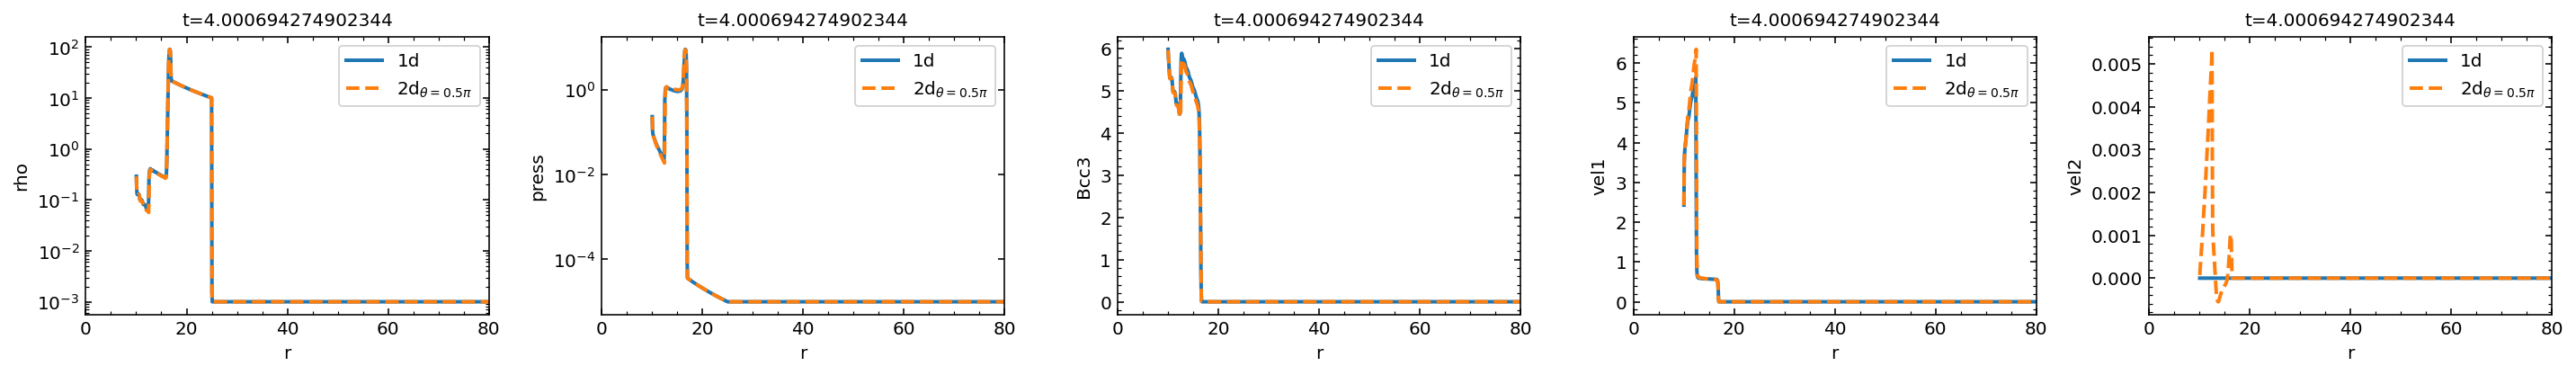

In [6]:
def draw_lines(dic1d, dic2d,x_hi):
    
    fig = plt.figure(figsize=(4*5,3))
    r1d = dic1d['x1v']
    r2d = dic2d['x1v']
    keys = ['rho','press','Bcc3','vel1','vel2']
    axs = [fig.add_subplot(1,5,i+1) for i in range(5)]
    scales =['log','log','linear','linear','linear']
    for key, ax, scale in zip(keys, axs, scales):
    
        y1d = dic1d[key][0,0,:]
    
        y2d = dic2d[key][0,90,:]
    
    
        #w,h = y2d.shape
    #dtheta = (dic2d['x2v'].max() - dic2d['x2v'].min())/(w)
        #y2d = y2d.sum(axis=0)/w
        ax.plot(r1d, y1d, label='1d')
        #ax.plot(r2d, y2d, label='<2d>',ls='--')
        ax.plot(r2d, y2d, label='2d$_{\\theta=0.5\\pi}$',ls='--')
        ax.legend()
        ax.set_xlabel('r')
        ax.set_ylabel(key)
        ax.set_yscale(scale)
        ax.set_title('t='+str(dic1d['Time']-4))
        ax.set_xlim(0,x_hi)
        #ax.set_ylim(1e-4,1e2)
        plt.savefig('ave.png',dpi=300)
    plt.tight_layout()
draw_lines(dic1d, dic2d,80)

In [88]:
def draw_single_plot(idx, quantity):
    
    d = load_file('Blast.block0.out1.'+ ('{0:05d}'.format(idx))+'.tab',324,36,['i','r','j','theta','rho','press'])
    theta = d['theta']
    r = d['r']
    p = np.log10(d[quantity])
    plt.figure()
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    l = ax.contourf(theta, r, p,levels=np.linspace(-4,2,61))
    ax.set_xlim(0,np.pi)
    cbar = fig.colorbar(l)
    cbar.set_label('$\\log_{10}(\\rho_{\\rm code})$', rotation=90)
    plt.title('t='+str(idx))
    plt.savefig('figs/'+quantity+'{0:05d}'.format(idx)+'.png',dpi=300,bbox_inches='tight')


11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12


/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12
11664 12


<Figure size 432x288 with 0 Axes>

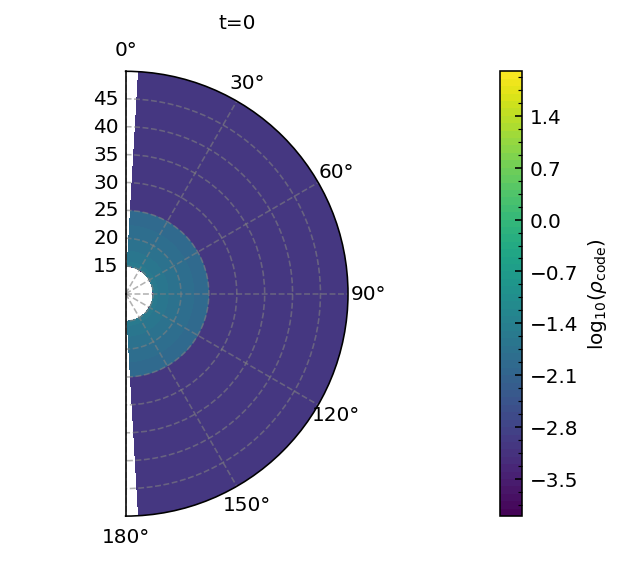

<Figure size 432x288 with 0 Axes>

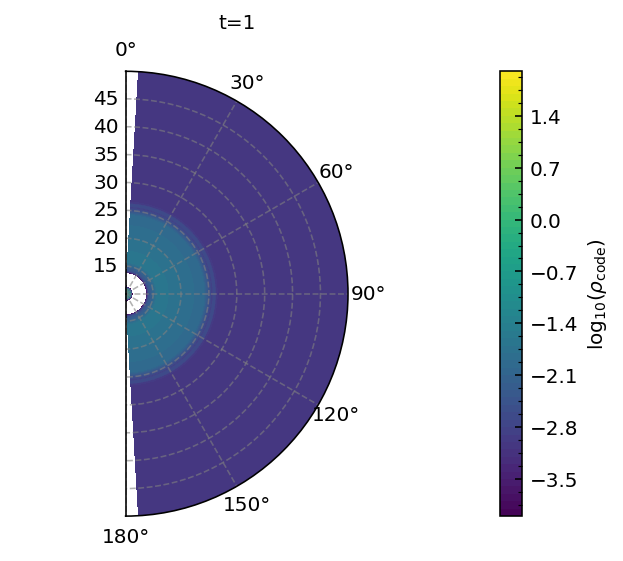

<Figure size 432x288 with 0 Axes>

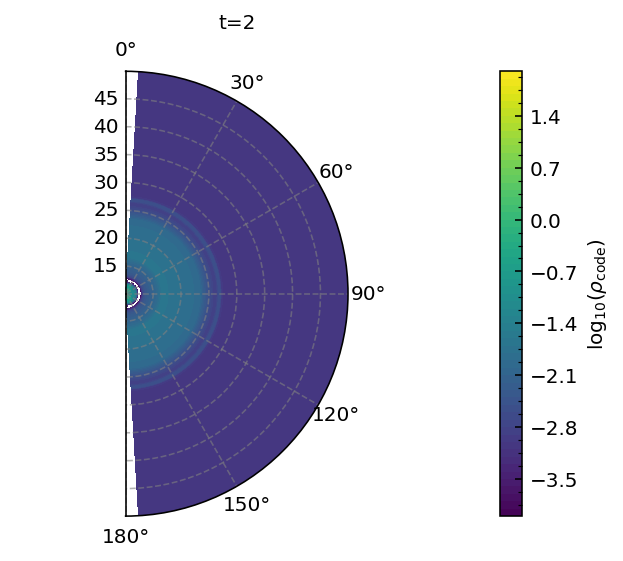

<Figure size 432x288 with 0 Axes>

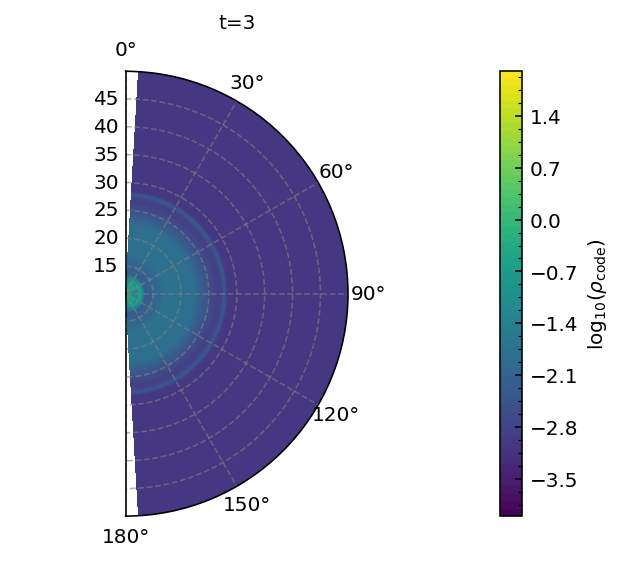

<Figure size 432x288 with 0 Axes>

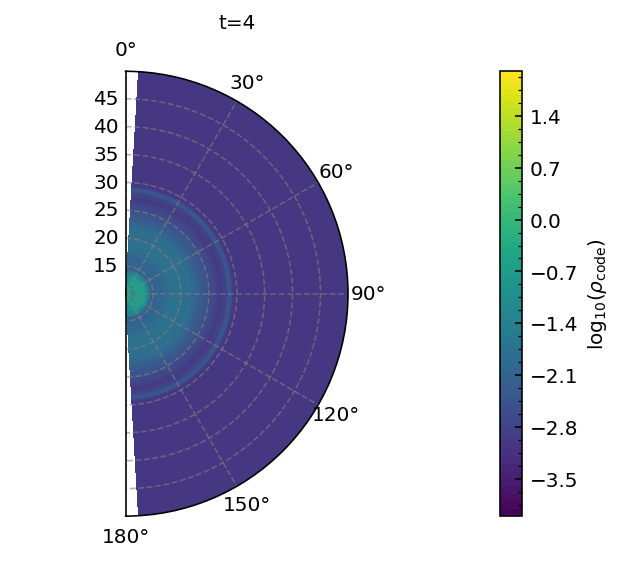

<Figure size 432x288 with 0 Axes>

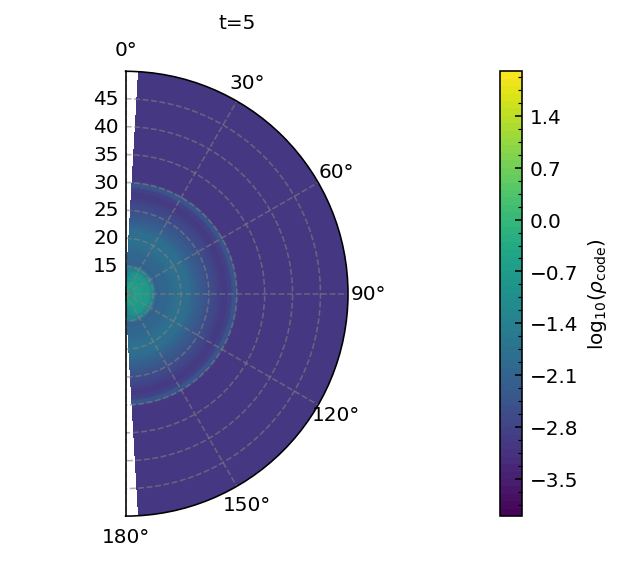

<Figure size 432x288 with 0 Axes>

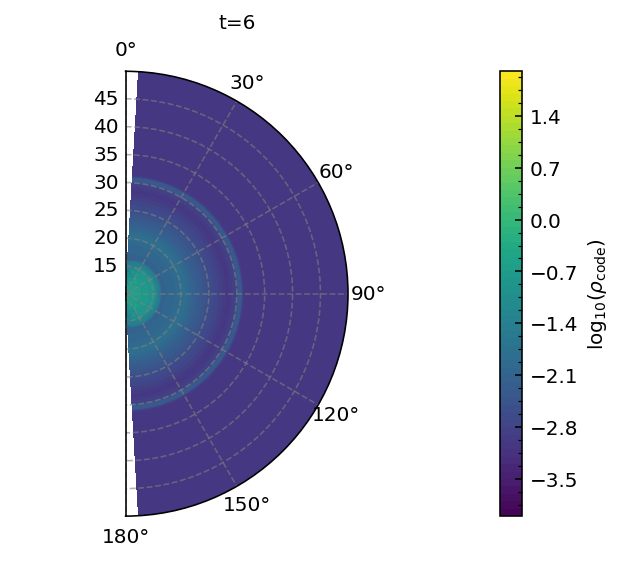

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

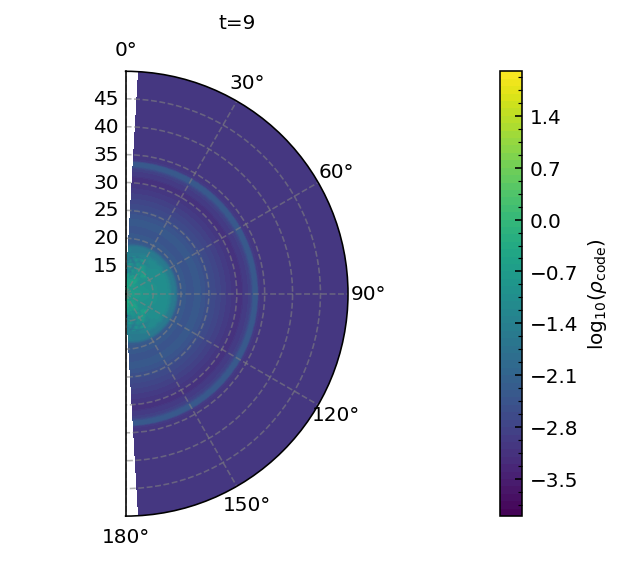

<Figure size 432x288 with 0 Axes>

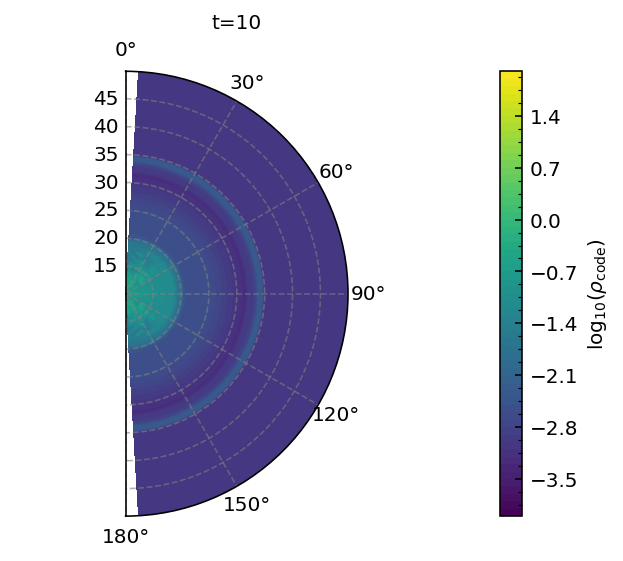

<Figure size 432x288 with 0 Axes>

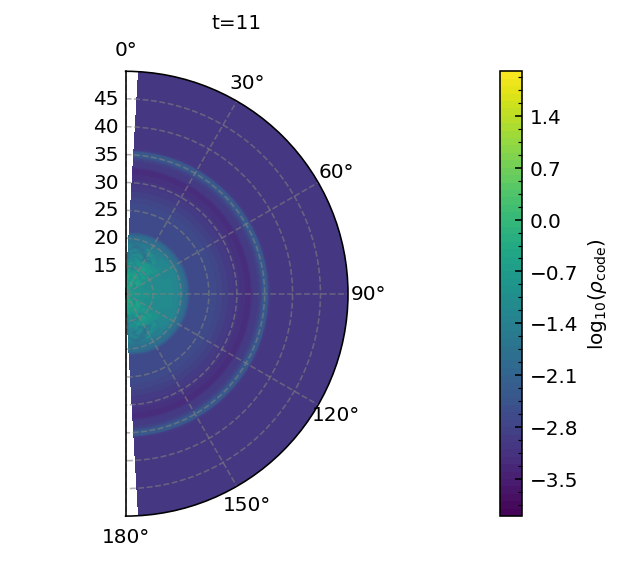

<Figure size 432x288 with 0 Axes>

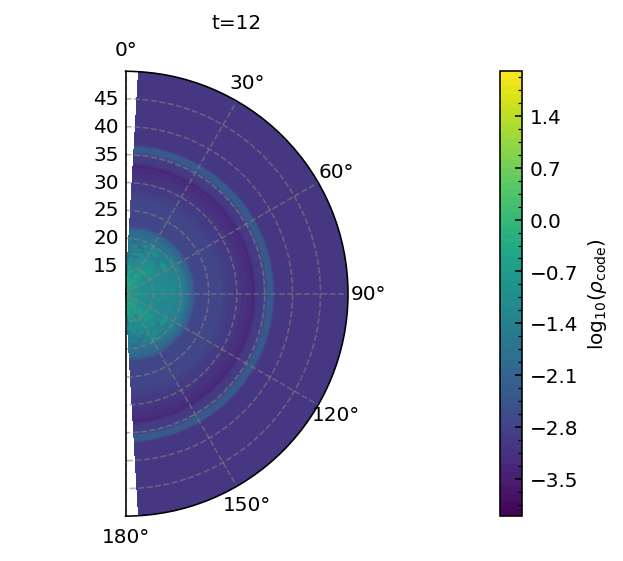

<Figure size 432x288 with 0 Axes>

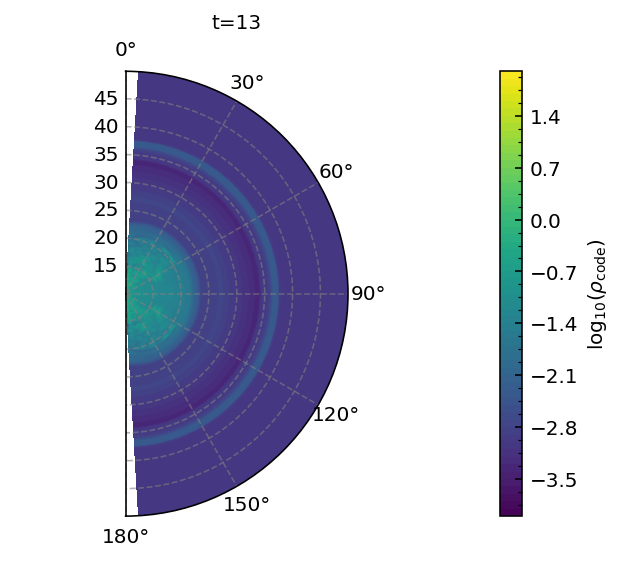

<Figure size 432x288 with 0 Axes>

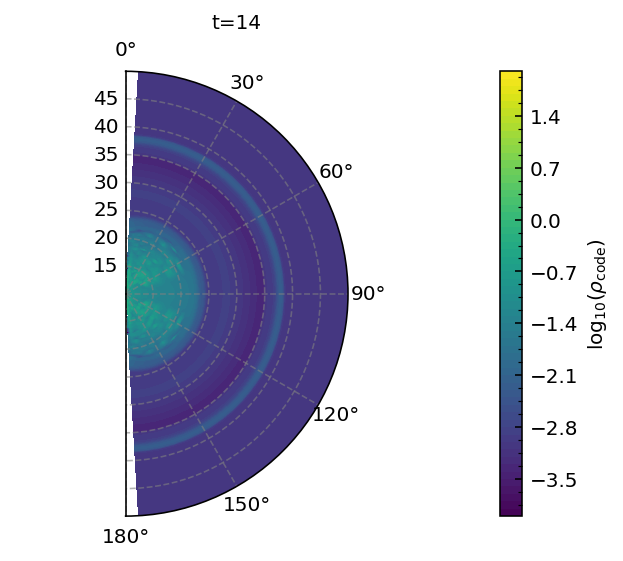

<Figure size 432x288 with 0 Axes>

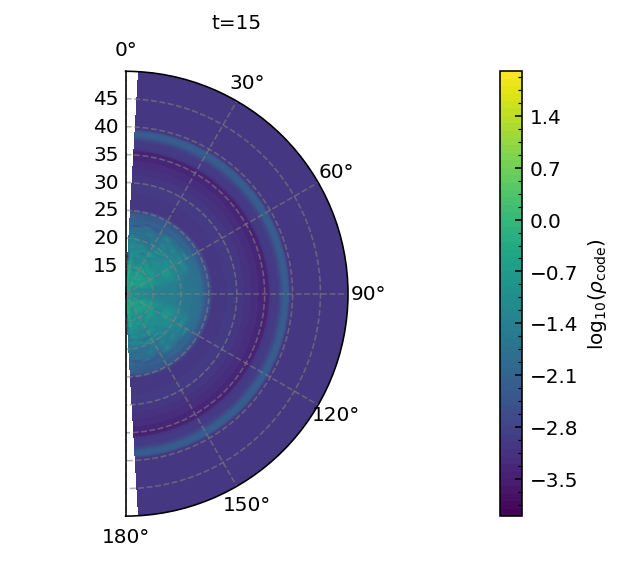

<Figure size 432x288 with 0 Axes>

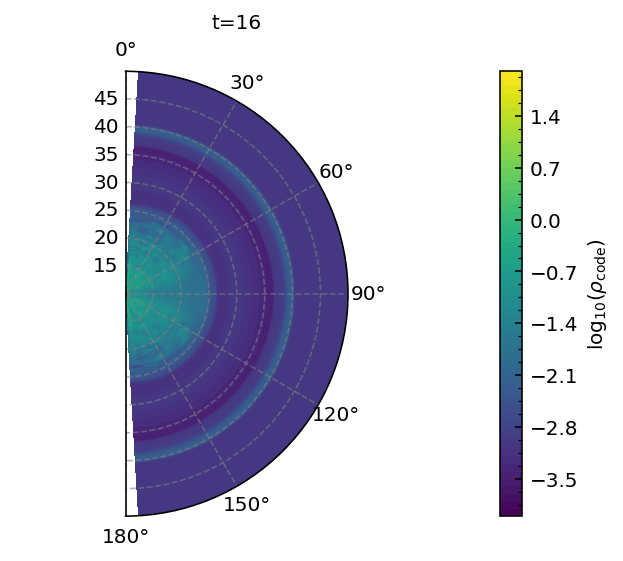

<Figure size 432x288 with 0 Axes>

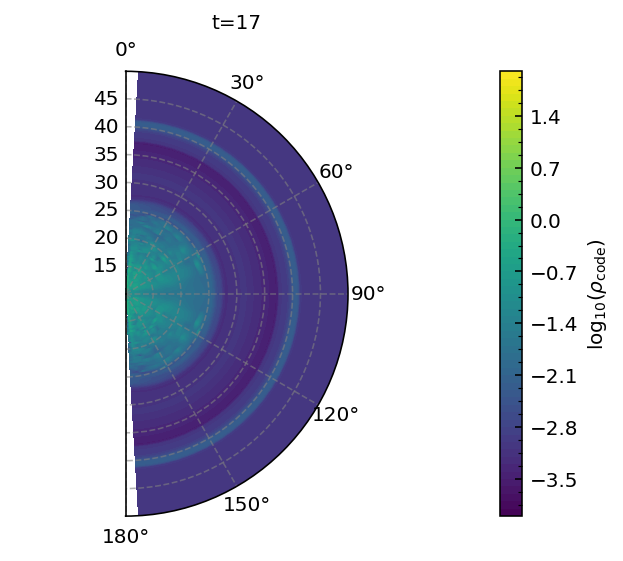

<Figure size 432x288 with 0 Axes>

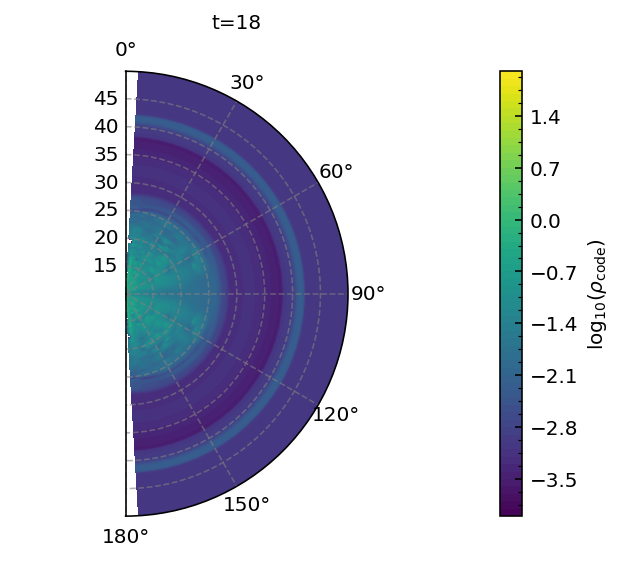

<Figure size 432x288 with 0 Axes>

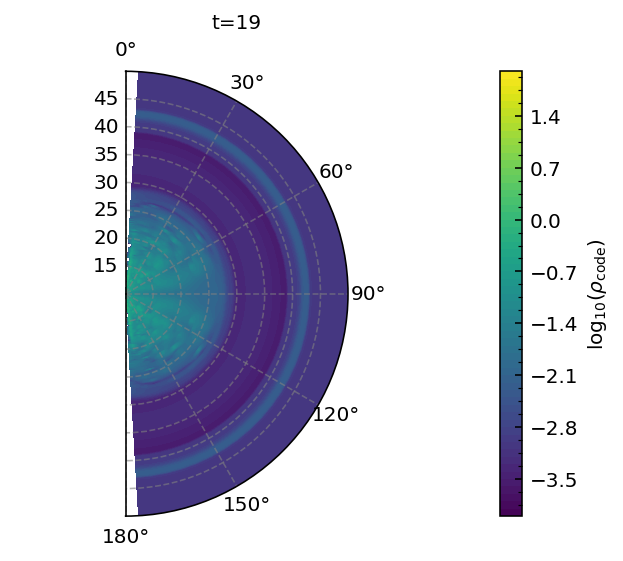

<Figure size 432x288 with 0 Axes>

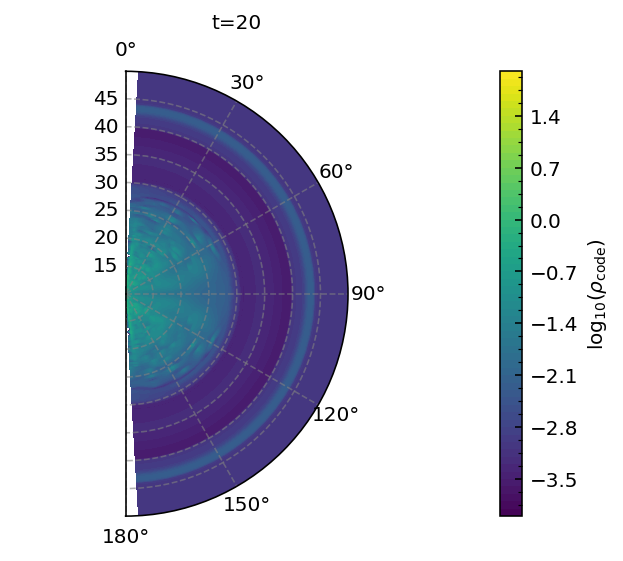

<Figure size 432x288 with 0 Axes>

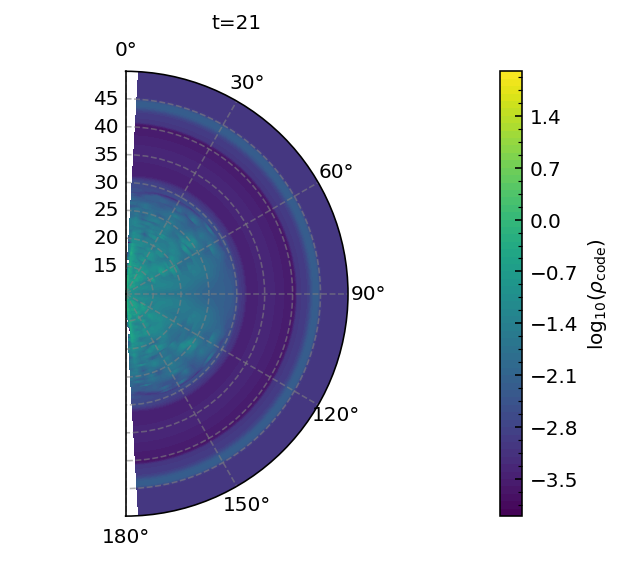

<Figure size 432x288 with 0 Axes>

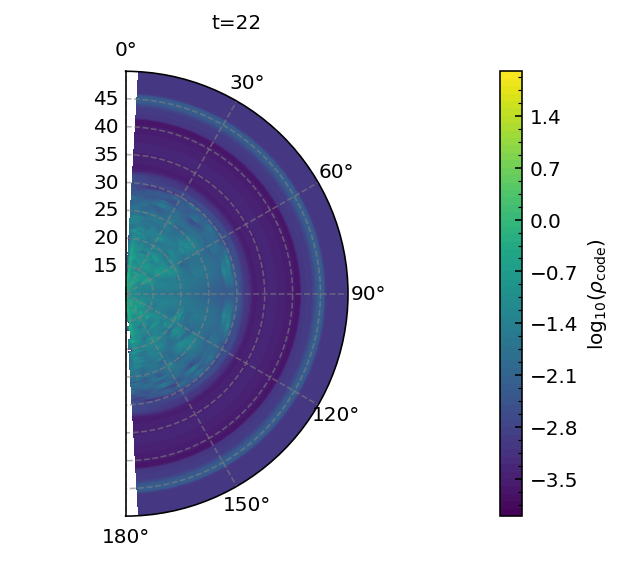

<Figure size 432x288 with 0 Axes>

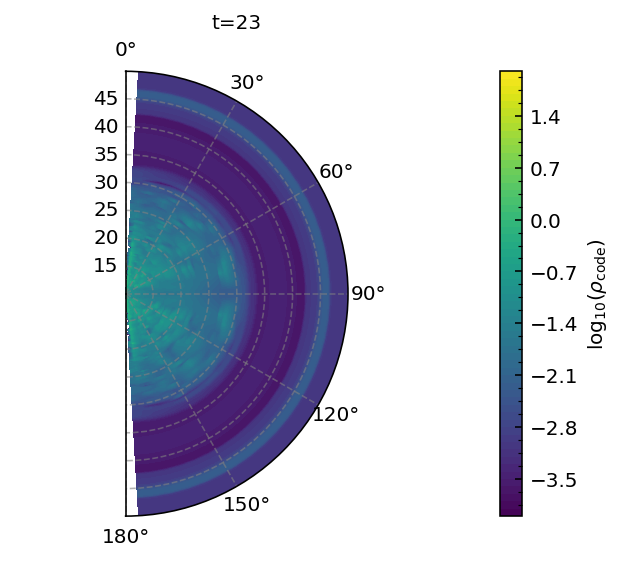

<Figure size 432x288 with 0 Axes>

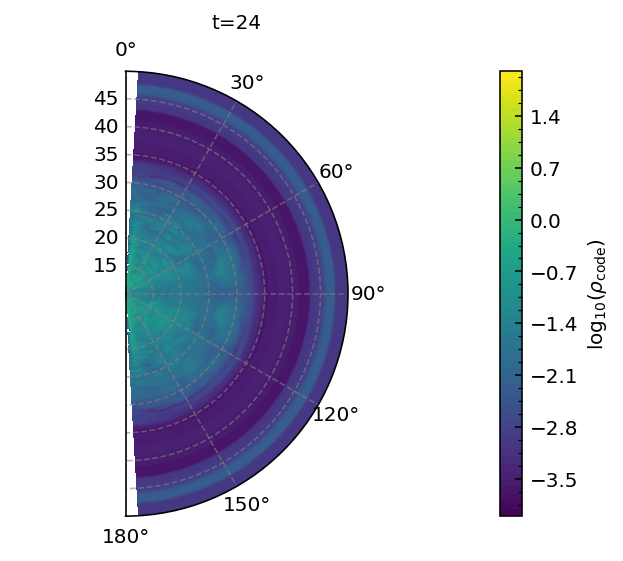

<Figure size 432x288 with 0 Axes>

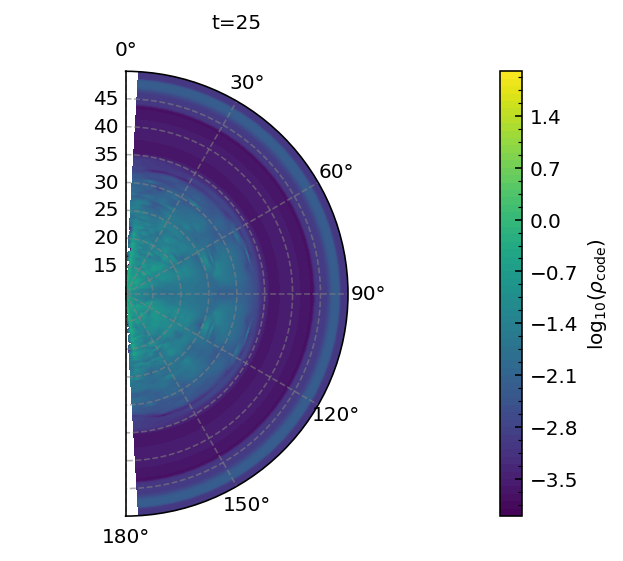

<Figure size 432x288 with 0 Axes>

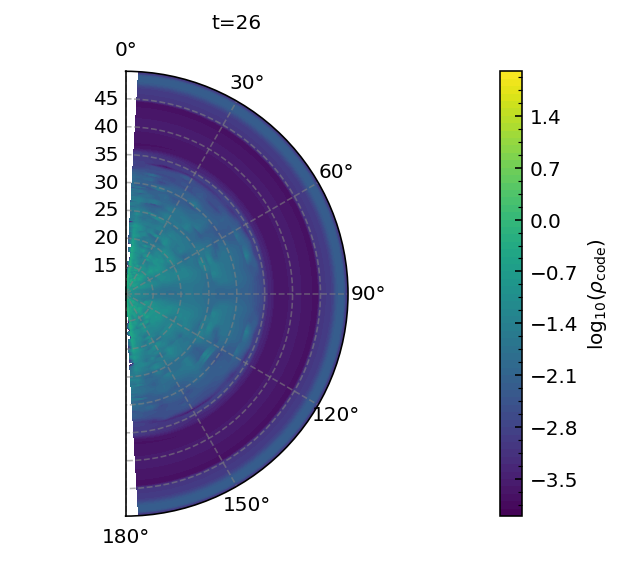

<Figure size 432x288 with 0 Axes>

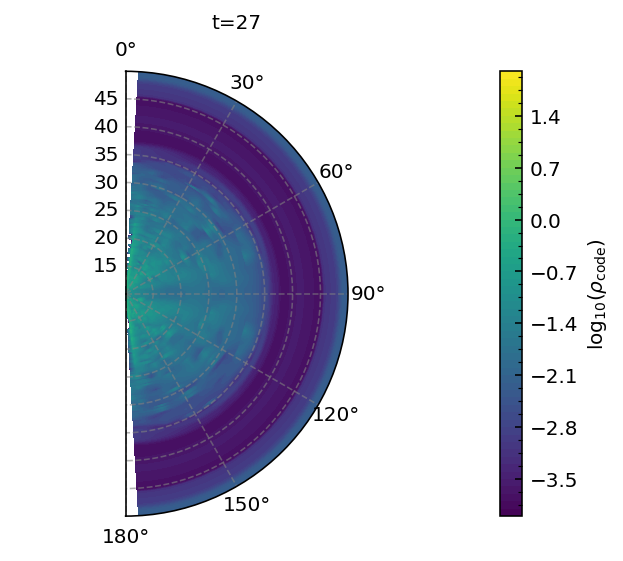

<Figure size 432x288 with 0 Axes>

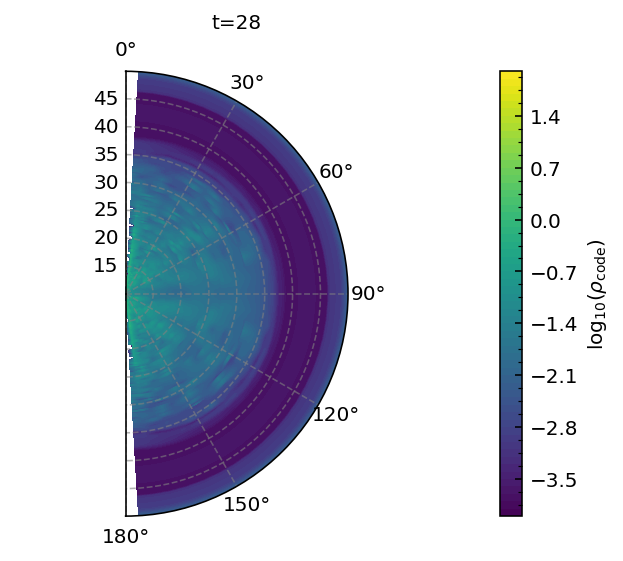

<Figure size 432x288 with 0 Axes>

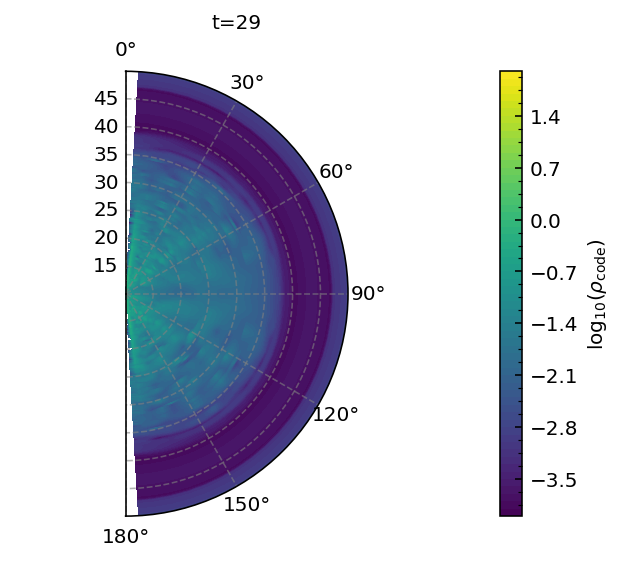

<Figure size 432x288 with 0 Axes>

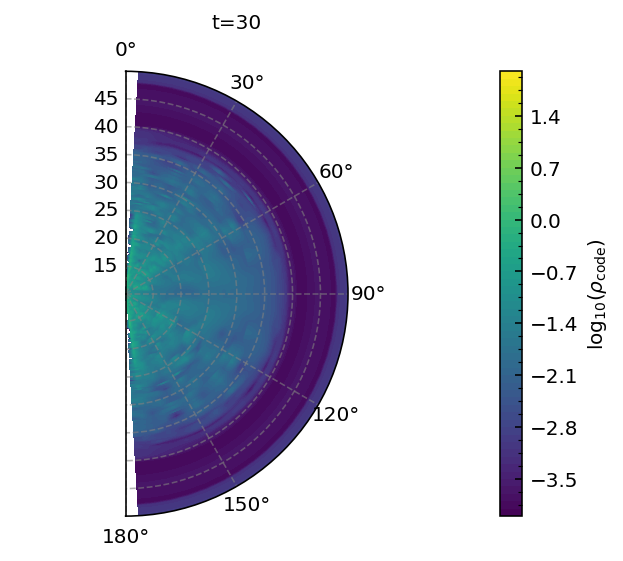

<Figure size 432x288 with 0 Axes>

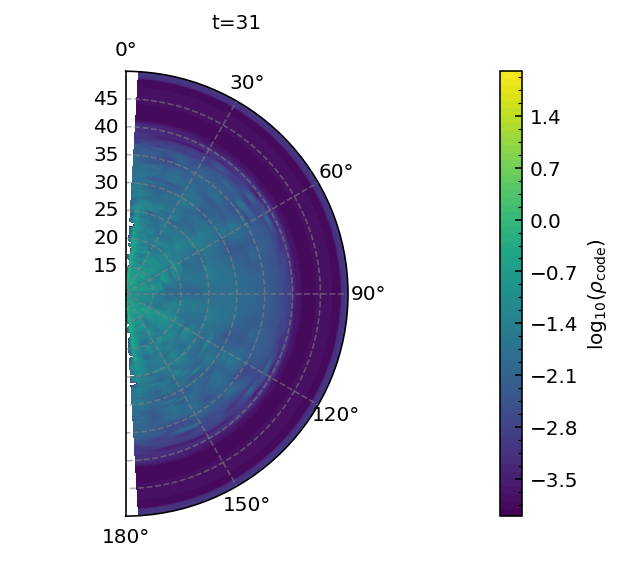

<Figure size 432x288 with 0 Axes>

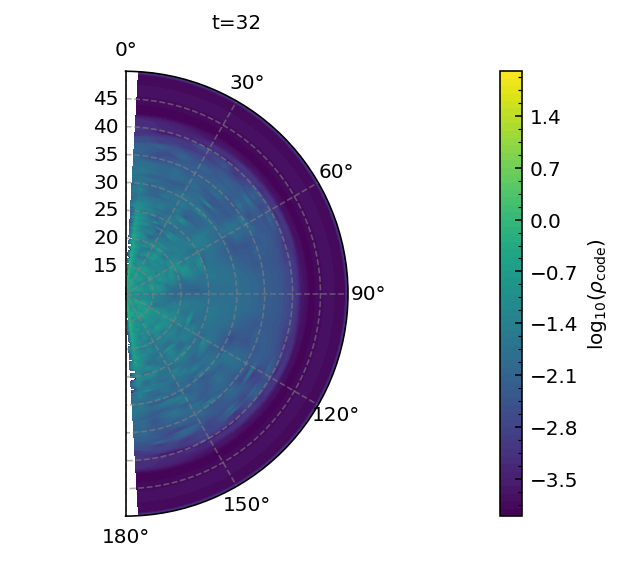

<Figure size 432x288 with 0 Axes>

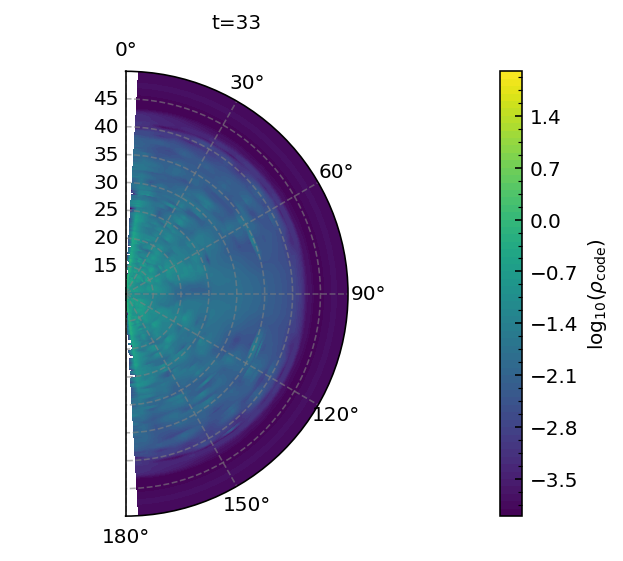

<Figure size 432x288 with 0 Axes>

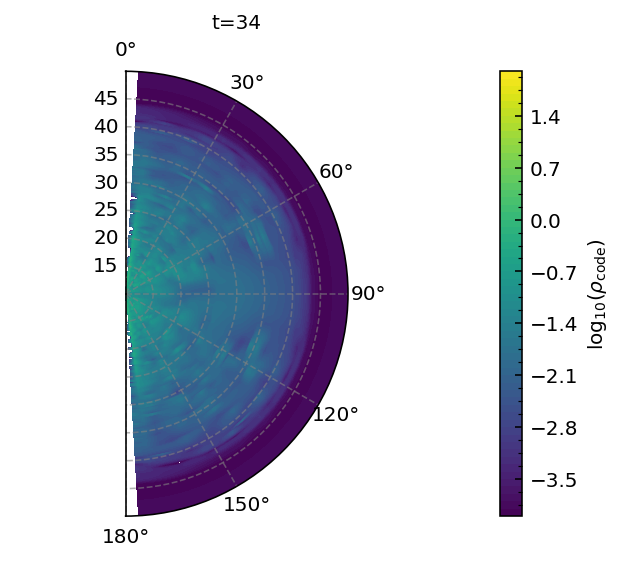

<Figure size 432x288 with 0 Axes>

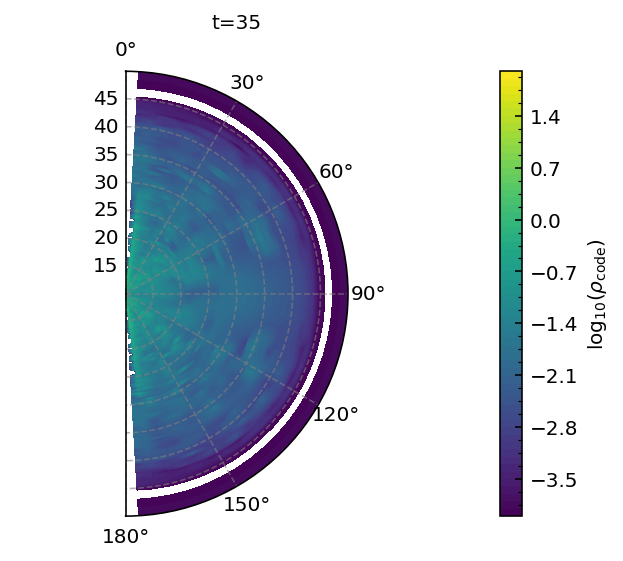

<Figure size 432x288 with 0 Axes>

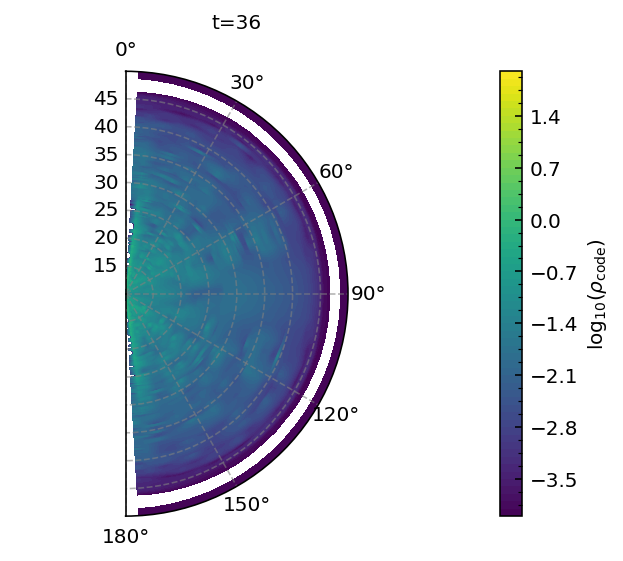

<Figure size 432x288 with 0 Axes>

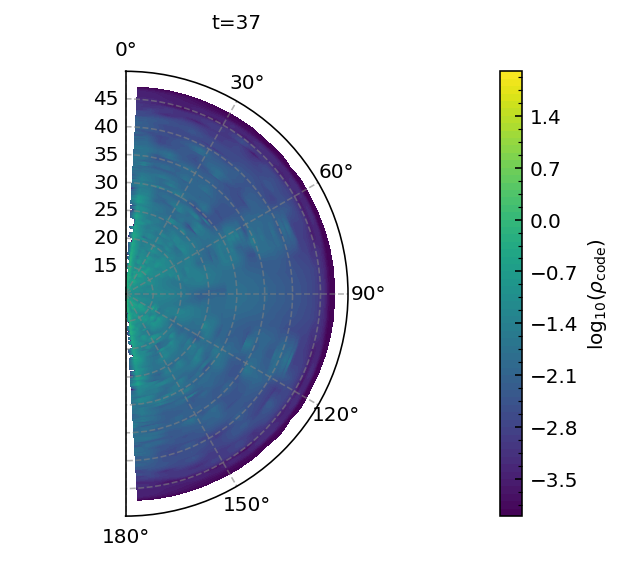

<Figure size 432x288 with 0 Axes>

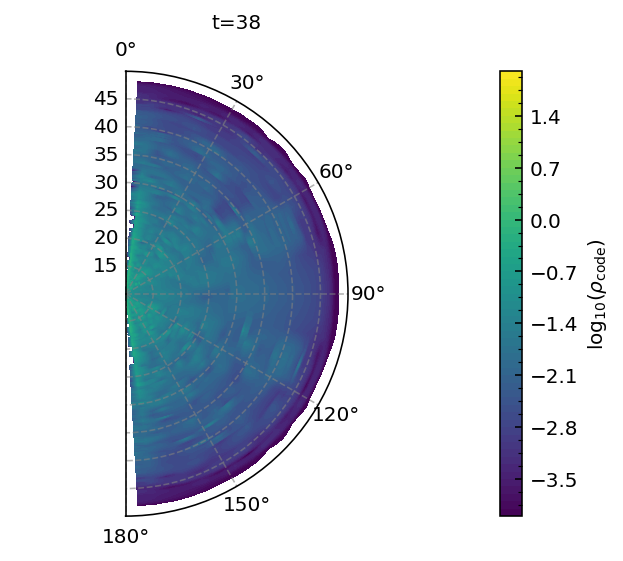

<Figure size 432x288 with 0 Axes>

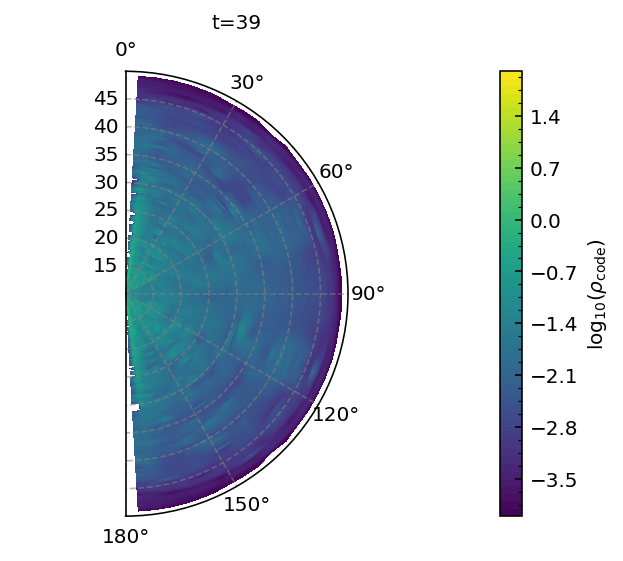

<Figure size 432x288 with 0 Axes>

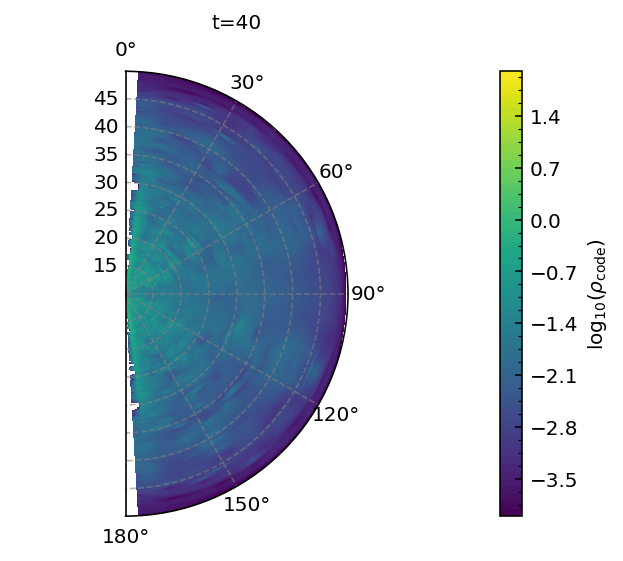

<Figure size 432x288 with 0 Axes>

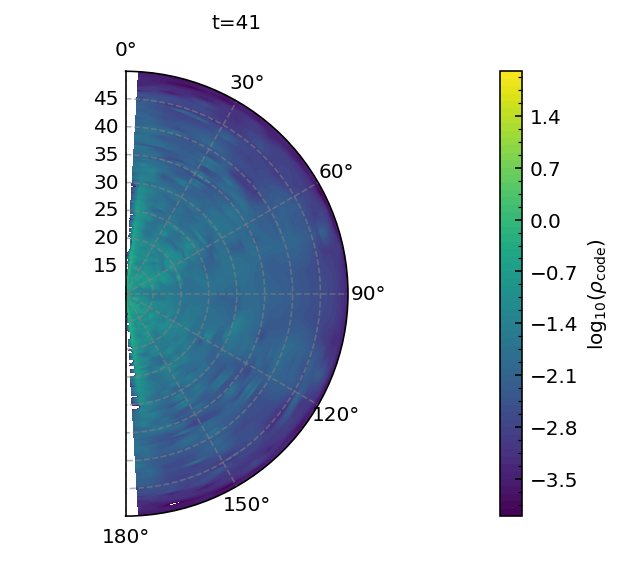

<Figure size 432x288 with 0 Axes>

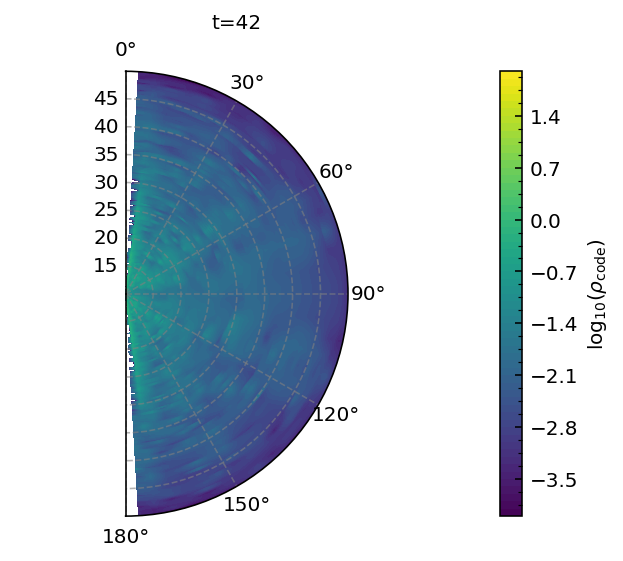

<Figure size 432x288 with 0 Axes>

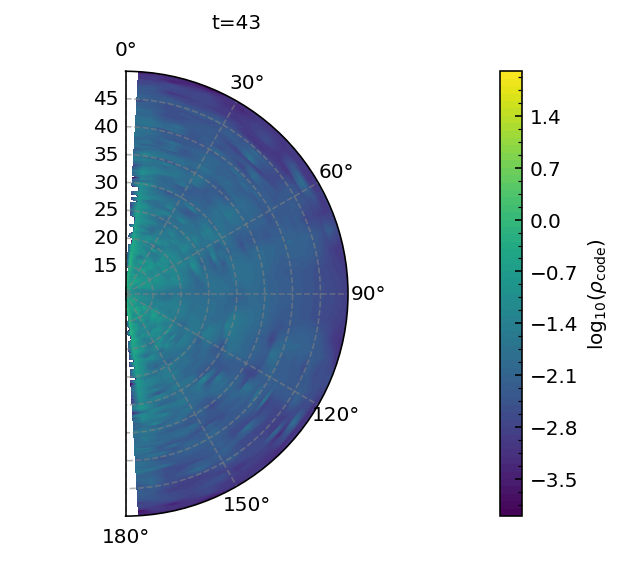

<Figure size 432x288 with 0 Axes>

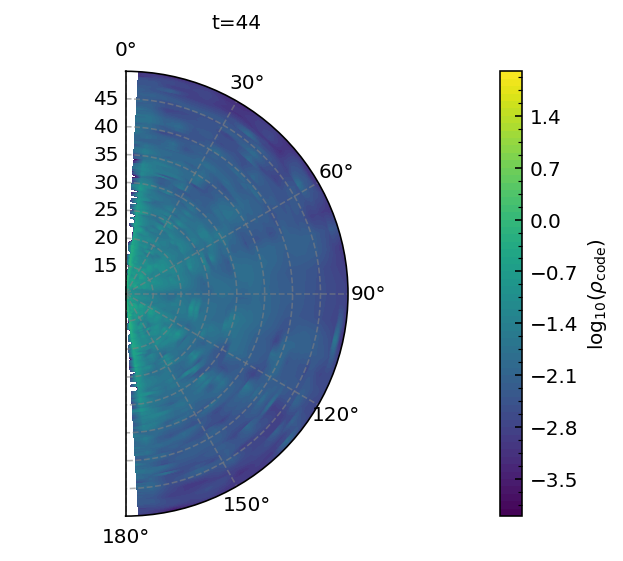

<Figure size 432x288 with 0 Axes>

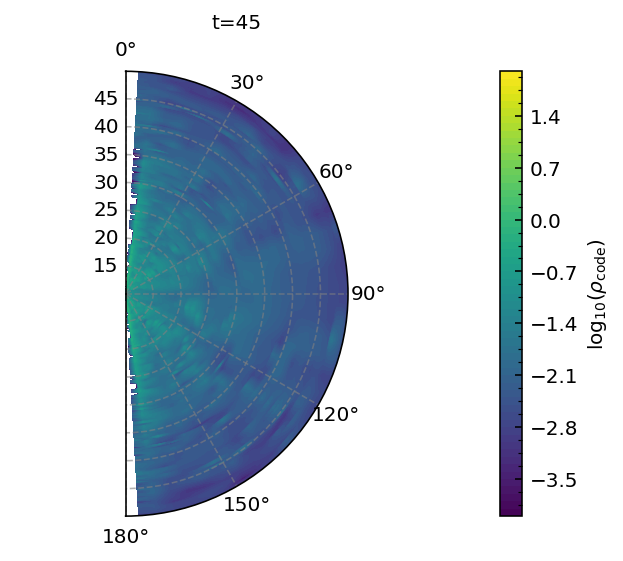

<Figure size 432x288 with 0 Axes>

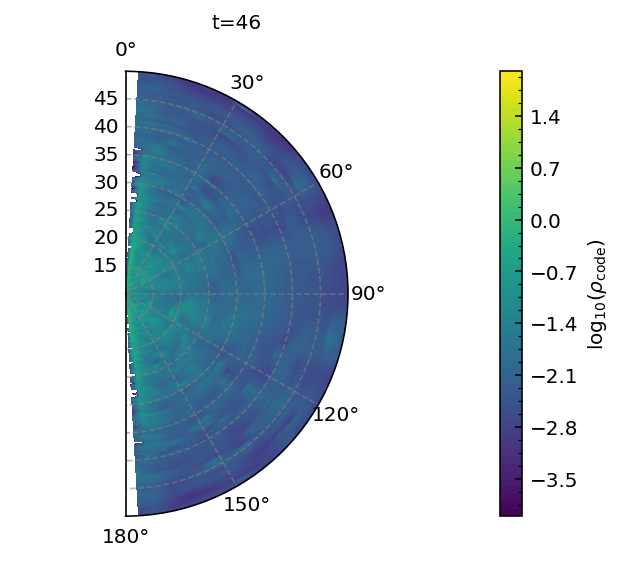

<Figure size 432x288 with 0 Axes>

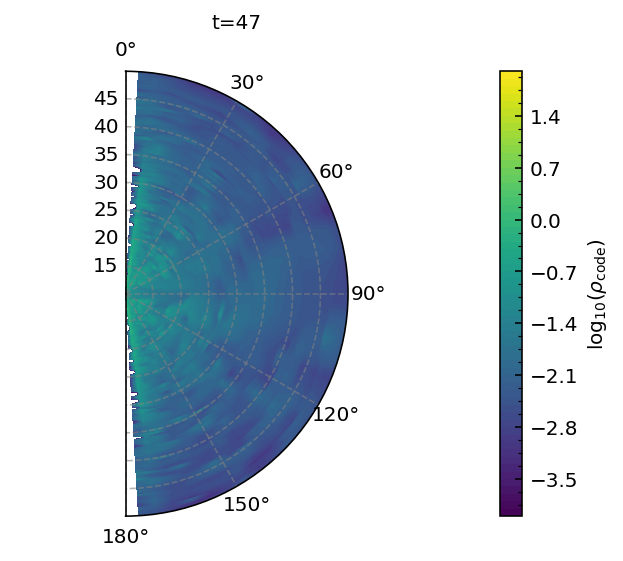

<Figure size 432x288 with 0 Axes>

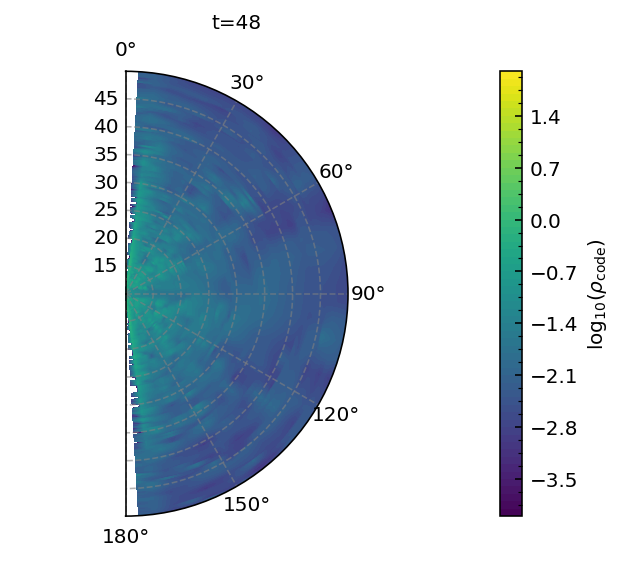

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [89]:
for i in range(51):
    draw_single_plot(i,'rho')

In [3]:


def draw_phase(fname,figname):
    d = np.loadtxt(fname,delimiter=',')
    
    b = d[:,0]
    phi = d[:,1]
    f = d[:,2]
    
    colors = cm.viridis(np.linspace(0,1,3))
    plt.scatter(b[f==0], phi[f==0],s = 0.2, lw =0, color=colors[0])
    plt.scatter(b[f==-1], phi[f==-1],s = 0.2, lw =0, color=colors[1])
    plt.scatter(b[f==2], phi[f==2],s = 0.2, lw =0, color=colors[2])
    
    plt.xlim(0,250)
    plt.ylim(0,2*np.pi)
    plt.xlabel('impact parameter b [au]')
    plt.ylabel('phase of binary BH $\phi_0$')
    
    
    g_patch = mpatches.Patch(color=colors[0], label='$\Delta a > 0$')
    r_patch = mpatches.Patch(color=colors[1], label='BHB disrupted')
    o_patch = mpatches.Patch(color=colors[2], label='$\Delta a <= 0$')
    

    plt.legend(handles=[g_patch, r_patch, o_patch],loc=1)
    
    
    plt.savefig(figname, dpi=600,bbox_inches = 'tight', pad_inches = 0)

In [2]:
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata

def draw_phase_ad(ax, d,num=100000):
    b = d[0:num,0]
    phi = d[0:num,1]
    f = d[0:num,2]
    
    xi = np.linspace(b.min(), b.max(), 1000)
    yi = np.linspace(phi.min(), phi.max(), 1000)

    zi = griddata((b, phi), f, (xi[None,:], yi[:,None]), method='linear')
    CS = ax.contourf(xi, yi, zi, 15, cmap=plt.cm.viridis,vmax=10, vmin=0)
    #ax.colorbar()  
#plt.show()

    
def draw_phase(ax, d, num):
    b = d[0:num,0]
    phi = d[0:num,1]
    f = d[0:num,2]
    colors = cm.viridis(np.linspace(0,1,3))
    s=0.1
    #ax.hist(np.log10(f[f>0]),30,density=True)
    select = b >= 0
    ax.scatter(b[select&(f>1)], phi[(f>1)&select],s = s, lw =0, color=colors[0])
    ax.scatter(b[select&(f<=0)], phi[(f<=0)&select],s = s, lw =0, color=colors[1])
    ax.scatter(b[(0<f)&(f<=1)&select], phi[(0<f)&(f<=1)&select],s = s, lw =0, color=colors[2])
    f1 = '%.1lf' % ( ((f>1)&select).sum()/select.sum()*100)
    f2 = '%.1lf' % ( ( (f<=0)&select ).sum()/select.sum()*100)
    f3 = '%.1lf' % (((0<f)&(f<=1)&select).sum()/select.sum()*100)
    #ax.axvline(0,ls='--',color='k',lw=1)
    ax.text(0.2*max(b), 0.9*np.pi,str(f1)+'%, '+str(f2)+'%, '+str(f3)+'%',color='k', bbox=dict(boxstyle="square", fc=(0.8, 0.8, 0.8),alpha=0.5))

    

def draw_all_phase(ds, figname):
    scale=0.6
    fig = plt.figure(figsize=(scale*4*3, scale*3*5))
    gs1 = gridspec.GridSpec(5, 3)
    gs1.update(wspace=0.0, hspace=0.)
    dist = ['10','5','3','2']
    for i, d in enumerate(ds):
        for j, dd in enumerate(d):
            ax = plt.subplot(gs1[i*3+j])
            num = 1000000
            draw_phase(ax, dd, num)
            ax.set_ylim(0,np.pi)

            
            ax.set_xlim(0,dd[0:num,0].max())
            

            ax.set_yticks([0,np.pi/2,np.pi])
            
            if(i == 0 and j ==0):
                colors = cm.viridis(np.linspace(0,1,3))
                g_patch = mpatches.Patch(color=colors[0], label='$\Delta a > 0$')
                r_patch = mpatches.Patch(color=colors[1], label='BBH disrupted')
                o_patch = mpatches.Patch(color=colors[2], label='$\Delta a <= 0$')
                #ax.legend(handles=[g_patch, r_patch, o_patch],loc=1,bbox_to_anchor=(2.4, 1.3),ncol=3,fontsize=9)
            if(j==0):
                ax.set_ylabel('$\phi_0$')
                if(i!=4):
                    ax.set_yticklabels(['','$\pi/2$','$\pi$'])
                else:
                    ax.set_yticklabels(['0','$\pi/2$','$\pi$'])
            elif(j==2):
                ax.yaxis.set_label_position("right")
                ax.set_yticklabels([])
                if(i == 0):
                    ax.set_ylabel('No SMBH')
                else:
                    ax.set_ylabel('r='+dist[i-1] +'$R_{\\rm TDE}$')
            else:
                ax.set_yticklabels([])
                #ax.set_ylabel('')
                #ax.get_yaxis().set_ticks([])

            if(i==4):
                ax.set_xlabel('b [au]')
            elif(i == 0):
                #ax.xaxis.set_label_position("top")
                ax.set_xlabel('b [au]')
                #ax.set_xticklabels([])
                ##ax.set_xlabel('$a_{\\rm BH}$='+str(10/10**j)+' au')
            else:
                ax.set_xticklabels([])
                

               # ax.set_xlabel('')
                #ax.get_xaxis().set_ticks([])
                
            
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.subplots_adjust(wspace=0, hspace=0)
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(figname, dpi=200,bbox_inches = 'tight', pad_inches = 0)


def load_files(name):
    folder = 'new-ae/'
    #folder ='code/'
    prefix = folder + name

    asmbhs = [100, 50, 30, 20, 10]
    abhs = [10, 1, 0.1]
    data = []

    d =[]
    #d.append(np.loadtxt(folder + name + '10.txt', delimiter = ','))
    #d.append(np.loadtxt(folder + name + '1.txt', delimiter = ','))
    #d.append(np.loadtxt(folder + name + '01.txt', delimiter = ','))
    
    d.append(np.loadtxt(folder + name + '10-1.txt', delimiter = ','))
    data.append(d)
    
    #for asmbh in asmbhs:
    #    d = []
    #    for abh in abhs:
    #        fname = prefix + "%.6lf"%asmbh + '-' + "%.6lf"%abh + "-"+"%.6lf"%v + '.txt'
    #        d.append(np.loadtxt(fname, delimiter = ','))
    #    data.append(d)
    
    return data         

In [116]:
single_data = np.loadtxt('../agn_tde/single-60-retro3.txt', delimiter= ',')

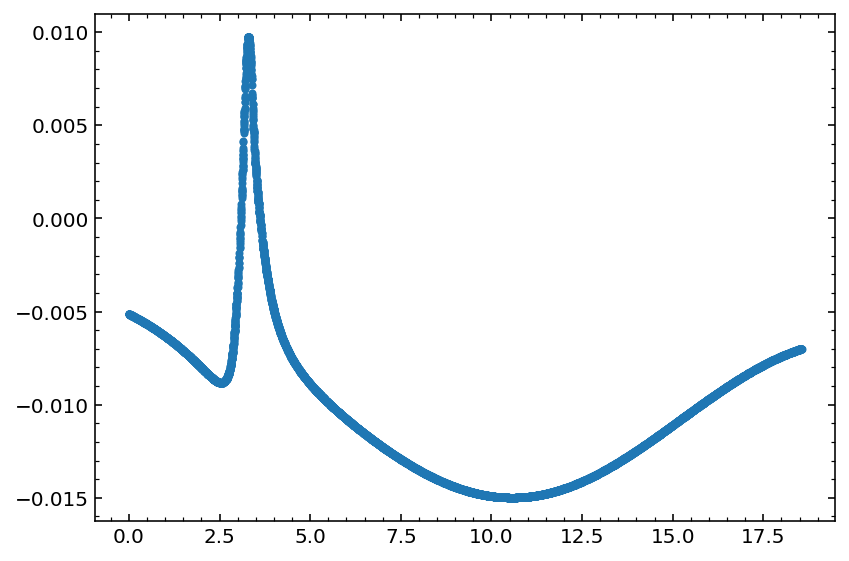

In [117]:
def draw_single_angle(ax,d):
    b = d[0:10000,0]
    cos1 = d[0:10000,1]
    cos2 = d[0:10000,2]
    
    theta1 = np.arccos(cos1) * 180/np.pi
    #theta1[cos2<0] = -theta1[cos2<0]
    
    theta2 = np.arccos(cos2) * 180/np.pi
    #theta2[cos1>0] = -theta2[cos1>0]
    
    
    
    plt.plot(b,cos1,lw=0,marker='.')

    


draw_single_angle(plt, single_data)

In [13]:
data_10_50_pro = load_files('ae-10-smbh_pro', 50)

In [14]:
data_10_50_retro = load_files('ae-10-smbh_retro', 50)

In [15]:
data_1_50_pro = load_files('ae-1-smbh_pro', 50)

In [16]:
data_1_50_retro = load_files('ae-1-smbh_retro', 50)

In [17]:
data_1_3000_pro = load_files('ae-1-smbh_pro', 3000)

In [18]:
data_1_3000_retro = load_files('ae-1-smbh_retro', 3000)

In [19]:
data_10_3000_pro = load_files('ae-10-smbh_pro', 3000)

In [20]:
data_10_3000_retro = load_files('ae-10-smbh_retro', 3000)

In [22]:
data_10_300_pro = load_files('ae-10-smbh_pro', 300)

In [23]:
data_10_300_retro = load_files('ae-10-smbh_retro', 300)

In [ ]:
def draw_incdist(data):
    
    for d in data:
        b = d[:,0]
        phi = d[:,1]
        f = d[:,2]
        e = d[:,3]
        cos1 = d[:,4]
        cos2 = d[:,5]
        
        
        theta1 = np.arccos(cos1)
        

In [49]:
from scipy.interpolate import griddata
def calc_ae(u, x,y, z, vx, vy, vz):
    r = np.sqrt(x**2 + y**2+ z**2)
    v2 = (vx**2 + vy**2+ vz**2)
    vr = x*vx + y*vy + z*vz
    vdfs = v2 - u/r
    a = -u / (v2 - 2 * u / r)
    ex = (x * vdfs - vx * vr) / u
    ey = (y * vdfs - vy * vr) / u
    ez = (z * vdfs - vz * vr) / u
    e =np.sqrt(ex**2 + ey**2 + ez**2)
    return a, e
  
def draw_rp(ax,d):
    b = d[:,0]
    phi = d[:,1]
    f = d[:,2]
    e = d[:,3]
    cos1 = d[:,4]
    cos2 = d[:,5]
    x = d[:,6]
    y = d[:,7]
    z = d[:,8]
    vx = d[:,9]
    vy = d[:,10]
    vz = d[:,11]
    af,ef = calc_ae(1e8, x,y,z,vx,vy,vz)
    rp = af*(1-ef)
    
    ax.hist((ef[ef<1]),bins=30,density=True,histtype='step')
    ax.set_xlim(0,1)
    ax.set_ylim(3e-5,30)
    ax.set_yscale('log')
   
    
def draw_angle(ax,d, label, color):
    b = d[:,0]
    phi = d[:,1]
    f = d[:,2]
    e = d[:,3]
    cos1 = d[:,4]
    cos2 = d[:,5]
    x = d[:,6]
    y = d[:,7]
    z = d[:,8]
    vx = d[:,9]
    vy = d[:,10]
    vz = d[:,11]
    rp = calc_ae(1e8, x,y,z,vx,vy,vz)
    
    theta1 = np.arccos(cos1) * 180/np.pi
    #theta1[cos2<0] = -theta1[cos2<0]
    
    theta2 = np.arccos(cos2) * 180/np.pi
    #theta2[cos1>0] = -theta2[cos1>0]

    
    ax.hist(theta1,bins=30,density=True,color=color,label=label,histtype='step')
    ax.set_xlim(0,180)
    ax.set_ylim(3e-5,30)
    ax.set_yscale('log')
    #ax.scatter(xi, yi, s=1, lw=0,c= zi, cmap='viridis')
    #plt.colorbar(im,cax=ax, orientation='vertical')
    #ax.colorbar()
    ax.legend()
    

    
def draw_all_angles(datas,labels, fname):
    scale=0.6
    fig = plt.figure(figsize=(scale*4*3, scale*3*4))
    gs1 = gridspec.GridSpec(5, 3)
    gs1.update(wspace=0.0, hspace=0.)
    dist = ['100','50','30','20', '10']
    
    colors = cm.viridis(np.linspace(0,0.8,len(labels)))
    
    for data,label,c in zip(datas,labels,colors):
        for i, d in enumerate(data):
            for j, dd in enumerate(d):
                ax = plt.subplot(gs1[i*3+j])
                num = 500000
                draw_angle(ax, dd[0:num,:],label, c)
            
                if(i == 0 and j ==0):
                    #plt.colorbar()
                    colors = cm.viridis(np.linspace(0,1,3))
                
                if(j==0):
                    ax.set_ylabel('PDF')
                elif(j==2):
                    ax.yaxis.set_label_position("right")
                    ax.set_yticklabels([])
                
                    ax.set_ylabel('r='+dist[i] +'$R_{\\rm TDE}$')
                else:
                    ax.set_yticklabels([])
                
                if(i==4):
                    #ax.set_xticks([80,85,90,95,100])
                    ax.set_xlabel('$\\theta$ [deg]')
                elif(i == 0):
                    ax.xaxis.set_label_position("top")
                    ax.set_xticklabels([])
                    ax.set_xlabel('$a_{\\rm BH}$='+str(10/10**j)+' au')
                else:
                    ax.set_xticklabels([])
             
    plt.savefig(fname,dpi=300)

#print(data[1][0])

In [39]:
def draw_all_rp(data):
    scale=0.6
    fig = plt.figure(figsize=(scale*4*3, scale*3*4))
    gs1 = gridspec.GridSpec(5, 3)
    gs1.update(wspace=0.0, hspace=0.)
    dist = ['10','5','3','2']
    
    
    
    for i, d in enumerate(data):
        for j, dd in enumerate(d):
            ax = plt.subplot(gs1[i*3+j])
            num = 500000
            draw_rp(ax, dd[0:num,:])
        
            if(i == 0 and j ==0):
                
                #plt.colorbar()
                colors = cm.viridis(np.linspace(0,1,3))
        
            if(j==0):
                ax.set_ylabel('PDF')
            elif(j==2):
                ax.yaxis.set_label_position("right")
                ax.set_yticklabels([])
                
                ax.set_ylabel('r='+dist[i] +'$R_{\\rm TDE}$')
            else:
                ax.set_yticklabels([])
                #ax.set_ylabel('')
                #ax.get_yaxis().set_ticks([])

            if(i==3):
                #ax.set_xticks([80,85,90,95,100])
                ax.set_xlabel('$a(1-e)$ [au]')
            elif(i == 0):
                ax.xaxis.set_label_position("top")
                ax.set_xticklabels([])
                ax.set_xlabel('$a_{\\rm BH}$='+str(10/10**j)+' au')
            else:
                ax.set_xticklabels([])
            
    #plt.savefig('10Ms.png',dpi=300)


In [57]:
draw_all_angles([ data_1_50_pro, data_1_50_retro] ,['pro','retro'],'1M_s_Tertiary_50kms.png')

In [25]:
draw_all_rp(data_10_50_pro)

NameError: name 'draw_all_rp' is not defined

In [5]:
def calc_area(d,a0):
    b = d[:,0]
    phi = d[:,1]
    f = d[:,2]
    e = d[:,3]
    a = f*a0
    select = b >= 0
    tgw = 2.98e17*30**-3*(a)**4*(1-e**2)**3.5
    area = (b.max())*(phi.max() - phi.min())
    #print(area)
    #return ((tgw < 13.6e9) & (0<f)&(f<1) & (e>=0) & (e<1) ).sum()/ len(b)  * area
    std = 1/np.sqrt(select.sum()) #1e6 simulations
    
    ff=((0<f)&(f<1) & (e>=0) & (e<1) & select).sum()/ select.sum()
    return ff,   ff * area, std*area


def calc_tgw(d,a0):
    b = d[:,0]
    phi = d[:,1]
    f = d[:,2]
    e = d[:,3]
    a = f*a0
    select = b >= 0
    tgw = 2.98e17*30**-3*(a)**4*(1-e**2)**3.5
    area = (b.max())*(phi.max() - phi.min())
    std = 1/np.sqrt(select.sum()) #1e6 simulations
    #print("a=",a0,"ratio" ,((tgw < 13.6e9) & (0<f)&(f<1) & (e>=0) & (e<1) ).sum()/ len(b) )
    #print(area)
    ff = ((tgw < 13.6e9) & (0<f)&(f<1) & (e>=0) & (e<1) & select ).sum()/ select.sum()
    return ff,  ff * area, std*area
    #return ((0<f)&(f<1) & (e>=0) & (e<1) ).sum()/ len(b)  * area
    #return ( (0<f)&(f<1) ).sum()/ len(b)  * area

def calc_phase_area(ds):
    areas = []
    errs = []
    fs = []
    for i, d in enumerate(ds):
        for dd ,a0 in zip(d,[10,1,0.1]):
            f, n, e = calc_area(dd, a0)
            areas.append(n)
            errs.append(e)
            fs.append(f)
    return np.array(areas).reshape(5,3), np.array(errs).reshape(5,3),np.array(fs).reshape(5,3)

def calc_phase_area_gw(ds):
    areas = []
    errs = []
    fs = []
    for i, d in enumerate(ds):
        for dd ,a0 in zip(d,[10,1,0.1]):
            f, n,e = calc_tgw(dd, a0)
            areas.append(n)
            errs.append(e)
            fs.append(f)
    return np.array(areas).reshape(5,3), np.array(errs).reshape(5,3),np.array(fs).reshape(5,3)

In [37]:
pro60_data = load_files('ae60-pro')
retro60_data = load_files('ae60-retro')

In [16]:
pro30_data = load_files('ae30-pro')
retro30_data = load_files('ae30-retro')

In [39]:
pro10_data = load_files('ae10-pro')
retro10_data = load_files('ae10-retro')

In [9]:
def calc_a_ratio(pro_data, retro_data):
    pro_A,  pro_err, pro_f = calc_phase_area(pro_data)
    retro_A, retro_err, retro_f = calc_phase_area(retro_data)
    ratio_A = pro_A/retro_A
    
    ratio_err = np.sqrt((pro_err/pro_A)**2 + (retro_err/retro_A)**2) * ratio_A
    
   # print( ratio_err/ratio_A)
    return ratio_A, ratio_err, (pro_f+retro_f)/2

def calc_a_ratio_gw(pro_data, retro_data):
    pro_A, pro_err , pro_f= calc_phase_area_gw(pro_data)
    retro_A, retro_err, retro_f = calc_phase_area_gw(retro_data)
    ratio_A = pro_A/retro_A
    ratio_err = np.sqrt((pro_err/pro_A)**2 + (retro_err/retro_A)**2) * ratio_A
    #print(ratio_err/ratio_A)
    return ratio_A, ratio_err, (pro_f+retro_f)/2


ratio60_A, err60, f60 = calc_a_ratio(pro60_data, retro60_data)
ratio30_A, err30, f30 = calc_a_ratio(pro30_data, retro30_data)
ratio10_A, err10, f10 = calc_a_ratio(pro10_data, retro10_data)


ratio60_A_gw, err60_gw, f60_gw = calc_a_ratio_gw(pro60_data, retro60_data)
ratio30_A_gw, err30_gw, f30_gw = calc_a_ratio_gw(pro30_data, retro30_data)
ratio10_A_gw, err10_gw, f10_gw = calc_a_ratio_gw(pro10_data, retro10_data)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in power
  
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in power
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [10]:
print(err60_gw, err30_gw, err10_gw)

[[           inf            inf 4.37956558e-02]
 [           inf            inf 1.57960546e-02]
 [           nan 4.00169639e-01 5.57043945e-03]
 [3.72209864e+01 1.92043856e-01 2.88166179e-03]
 [2.66087738e+03 3.90563459e+01 3.21268510e-03]] [[           nan 1.31351356e+02 3.66248455e-02]
 [           nan 6.16206718e+04 1.18273466e-02]
 [           nan 4.33426612e-01 5.20416549e-03]
 [           inf 5.31875072e-01 3.01399543e-03]
 [3.65638706e+03 3.36486531e+02 3.01555958e-03]] [[4.00541614e-02 7.64831840e-03 4.42700578e-03]
 [6.67702049e-02 1.42913750e-02 4.20412775e-03]
 [4.34841752e-01 9.62131977e-02 4.37081702e-03]
 [3.39490715e+00 2.44986902e-01 3.06791460e-03]
 [1.01445905e+01 1.58010251e+00 2.80248924e-03]]


In [63]:
import matplotlib.ticker as ticker
def draw_frac(ax, f_A, ms, islegend, scale):
    colors = cm.plasma(np.linspace(0,0.8,3))
    ax.plot([32,10,5,3,2],f_A[:,0],marker='v',lw=1,color=colors[0],label='$a_{\\rm BH}$=10 au')
    
    
    ax.plot([32,10,5,3,2],f_A[:,1],marker='D',lw=1,color=colors[1],label='$a_{\\rm BH}$=1 au')
    ax.plot([32,10,5,3,2],f_A[:,2],marker='s',lw=1,color=colors[2],label='$a_{\\rm BH}$=0.1 au')
    ax.set_ylim(1e-5,2)
    ax.set_yscale('log')
    ax.set_xscale('log')
    y_min, y_max = ax.get_ylim()
    ax.text(3, 10**(np.log10(y_min)+0.1*(np.log(y_max) - np.log10(y_min))),'$M_{\\rm BBH}/M_{\\rm tert}$='+str(60/ms),bbox=dict(boxstyle="square", fc=(0.8, 0.8, 0.8),alpha=0.5))

def draw_ratio(ax, r_A, err, ms, islegend, scale,ylim):
    
    colors = cm.plasma(np.linspace(0,0.8,3))
    #x = [16,8,4,2]
    #ax.plot(x,r_A[1::,0],marker='v',label='$a_{\\rm BH}$=10 au',lw=1,color=colors[0])
    #ax.plot(x,r_A[1::,1],marker='D',label='$a_{\\rm BH}$=1 au',lw=1,color=colors[1])
    #ax.plot(x,r_A[1::,2],marker='s',label='$a_{\\rm BH}$=0.1 au',lw=1,color=colors[2])
    #x2 = [32,16]
    #ax.plot(x2,r_A[0:2,0],marker='v',ls='--',lw=1,color=colors[0])
    #ax.plot(x2,r_A[0:2,1],marker='D',ls='--',lw=1,color=colors[1])
    #ax.plot(x2,r_A[0:2,2],marker='s',ls='--',lw=1,color=colors[2])
    
    r_A[np.isinf(r_A)] = 2e4
    
    r_A[r_A == 0] = 5e-5
    ax.plot([32,10,5,3,2],r_A[:,0],marker='v',lw=1,color=colors[0],label='$a_{\\rm BH}$=10 au')
    ax.plot([32,10,5,3,2],r_A[:,1],marker='D',lw=1,color=colors[1],label='$a_{\\rm BH}$=1 au')
    ax.plot([32,10,5,3,2],r_A[:,2],marker='s',lw=1,color=colors[2],label='$a_{\\rm BH}$=0.1 au')
    r_A[r_A == 2e4] = float('inf')
    
    r_A[r_A == 5e-5] = 0
    #colors = cm.plasma(np.linspace(0,1,3))
    #plt.bar(4*np.array([1,2,3,4,5]),r_A[:,0],label = '$a_{\\rm BH}$=10 au',color=colors[0], width=1)
    #plt.bar(4*np.array([1,2,3,4,5])+1,r_A[:,1], label= '$a_{\\rm BH}$=1 au',color=colors[1], width=1)
    #plt.bar(4*np.array([1,2,3,4,5])+2,r_A[:,2],label= '$a_{\\rm BH}$=0.1 au',color=colors[2], width=1)
    ax.axhline(1,ls=':',label='symmetry',color='k',lw=1)
    #axes = plt.gca()
    
    #plt.xlim(1.75,36.7)
    ax.set_ylim(ylim[0],ylim[1])
    y_min, y_max = ax.get_ylim()
    
    if(scale == 'linear'):
        ax.text(2.5,0.1*y_max,'$M_{\\rm BBH}/M_{\\rm tert}$='+str(60/ms),bbox=dict(boxstyle="square", fc=(0.8, 0.8, 0.8),alpha=0.5))
    else:
        ax.text(3, 10**(np.log10(y_min)+0.1*(np.log(y_max) - np.log10(y_min))),'$M_{\\rm BBH}/M_{\\rm tert}$='+str(60/ms),bbox=dict(boxstyle="square", fc=(0.8, 0.8, 0.8),alpha=0.5))
    if(islegend):
        plt.legend(loc=4,frameon=False)
    #plt.ylabel('$A_{\\rm hard, pro}/A_{\\rm hard, retro}|_{\\rm t_{\\rm GW} < t_H}$')
    #ax.set_ylabel('$A_{\\rm hard, pro}/A_{\\rm hard, retro}$')
    #ax.set_ylabel(ylabel)
    ax.set_yscale(scale)
    ax.set_xscale('log')
    ax.set_xticks([32,10,5,3,2],minor=False)
    ax.set_xticklabels(['$\infty$','10','5','3','2'],fontsize=10)
    
    y_min, y_max = ax.get_ylim()
    #ax.axvspan(24,40,alpha=0.3,hatch='//',color='gray')
    ax.axhspan(1e4,8e8,alpha=0.3,hatch='//',color='gray',ls=':')
    
    ax.axhspan(1e-8,8e-5,alpha=0.3,hatch='//',color='gray',ls=':')
    
    #(plt.xticks()[-1][0]).set_fontsize(13)
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    
    #plt.minorticks_off()


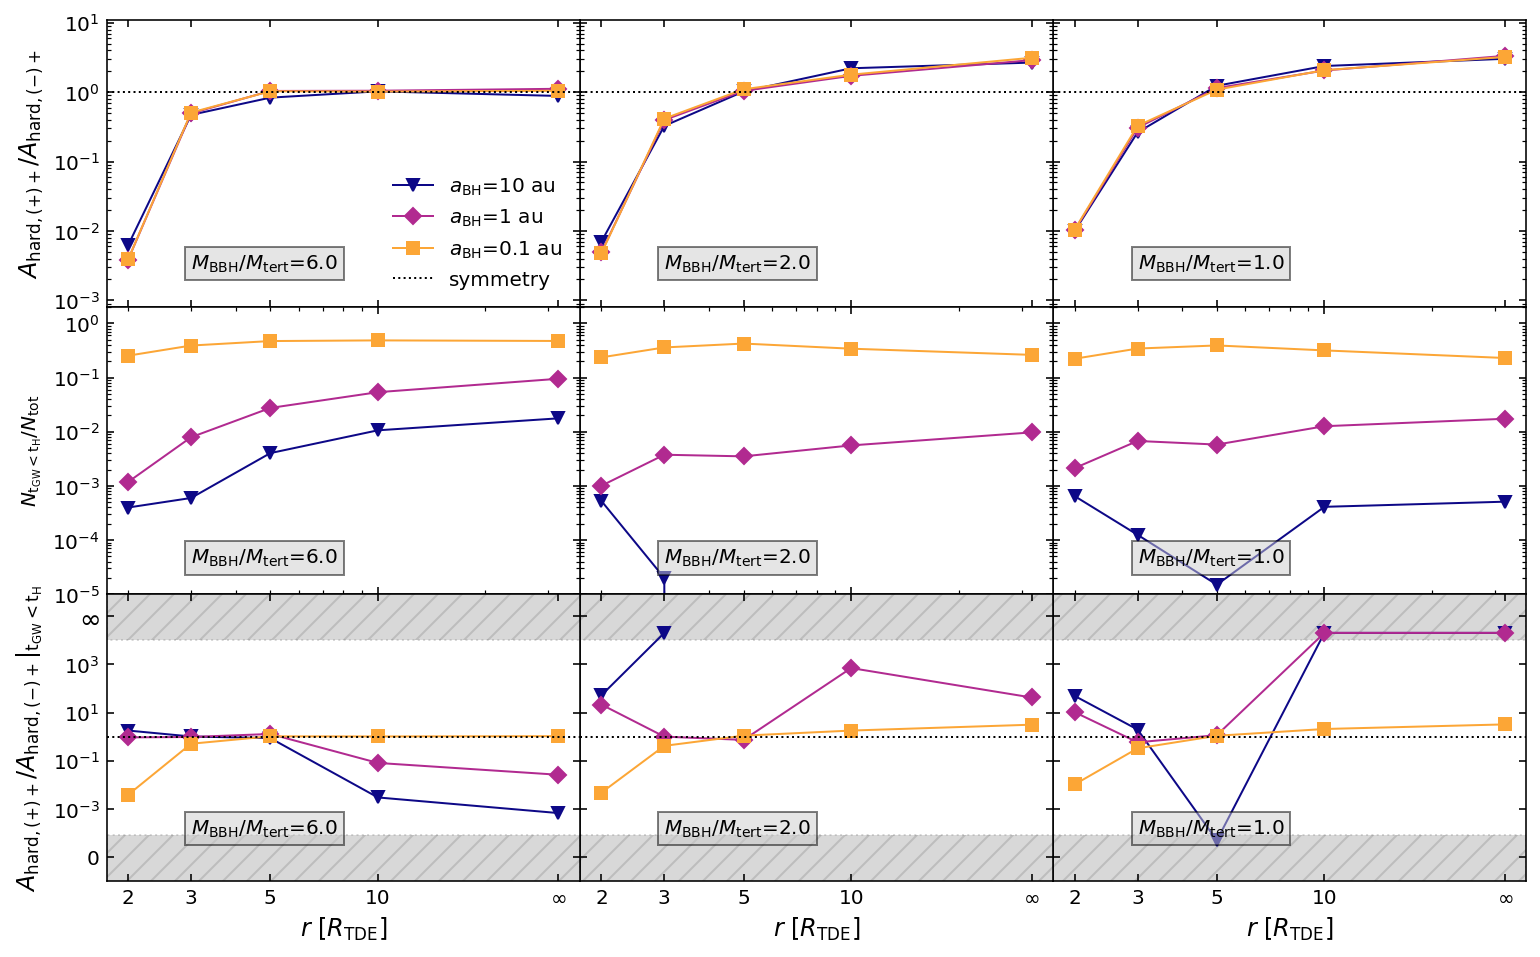

In [66]:
fig = plt.figure(figsize=(0.9*3*4, 2.5*3*0.9))
label1 = '$A_{\\rm hard,(+)+}/A_{\\rm hard,(-)+}$'
label2 = '$A_{\\rm hard,(+)+}/A_{\\rm hard,(-)+}|_{\\rm t_{\\rm GW} < t_H}$'
ft=12
y_max = 8e5
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.0, hspace=0.)
    
y_min1 = 8e-4

ax = plt.subplot(gs1[2])
draw_ratio(ax, ratio60_A, err60, 60, False,'log',[y_min1,11])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = plt.subplot(gs1[1])
draw_ratio(ax, ratio30_A, err30, 30, False,'log',[y_min1,11])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = plt.subplot(gs1[0])
draw_ratio(ax, ratio10_A, err10, 10, True,'log',[y_min1,11])
ax.set_xticklabels([])
ax.set_ylabel(label1,fontsize=ft)


ax = plt.subplot(gs1[5])
draw_frac(ax,f60_gw, 60, False, 'log')
ax = plt.subplot(gs1[4])
draw_frac(ax,f30_gw, 30, False, 'log')
ax = plt.subplot(gs1[3])
draw_frac(ax,f10_gw, 10, False, 'log')
ax.set_ylabel('$N_{\\rm t_{\\rm GW} < t_H}/N_{\\rm tot}$')



y_min2 = 1e-6

y2tick = [1e-5,1e-3, 1e-1, 1e1, 1e3, 1e5]
y2ticklabel = ['$0$','$10^{-3}$','$10^{-1}$','$10^{1}$','$10^{3}$','$\infty$']

ax = plt.subplot(gs1[8])
draw_ratio(ax, ratio60_A_gw, err60_gw, 60, False,'log',[y_min2,y_max])
ax.set_yticklabels([])
ax.set_xlabel('$r$ $[R_{\\rm TDE}]$',fontsize=ft)
#ax.text(21, 10**(1.06*np.log10(1e-4)),'>',fontsize=ft)
#ax.text(21, 10**(0.965*np.log10(y_max)),'>',fontsize=ft)
ax.set_yticks(y2tick,minor=False)

ax = plt.subplot(gs1[7])
draw_ratio(ax, ratio30_A_gw, err30_gw,30, False,'log',[y_min2,y_max])
ax.set_yticklabels([])
ax.set_xlabel('$r$ $[R_{\\rm TDE}]$',fontsize=ft)
#ax.text(21, 10**(1.06*np.log10(1e-4)),'>',fontsize=ft)
#ax.text(21, 10**(0.965*np.log10(y_max)),'>',fontsize=ft)
ax.set_yticks(y2tick,minor=False)

ax = plt.subplot(gs1[6])
draw_ratio(ax, ratio10_A_gw, err10_gw, 10, False,'log',[y_min2,y_max])
ax.set_ylabel(label2,fontsize=ft)
ax.set_xlabel('$r$ $[R_{\\rm TDE}]$',fontsize=ft)

#ax.text(21, 10**(1.06*np.log10(1e-4)),'>',fontsize=ft)
#ax.text(21, 10**(0.965*np.log10(y_max)),'>',fontsize=ft)
#ax.text(1.63, 5e4,'^',fontsize=ft)
#ax.text(1.63+32.7, 5e4,'^',fontsize=ft)
#ax.text(1.63+721, 5e4,'^',fontsize=ft)

ax.set_yticks(y2tick,minor=False)
ax.set_yticklabels(y2ticklabel,fontsize=10)
(plt.yticks()[-1][-1]).set_fontsize(13)

plt.tight_layout(pad=0,h_pad=0,w_pad=0)
plt.savefig('area-ratio.png', dpi=600,bbox_inches = 'tight')

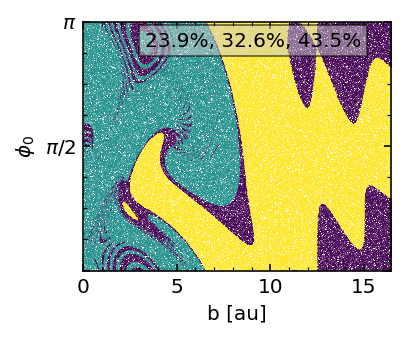

In [24]:
draw_all_phase(pro30_data,'pro_30Ms.jpg')

In [3]:
print(np.tan(0.5/180*np.pi))

0.00872686779075879


In [191]:
km = 6.68459e-9
Rs = 0.00465047
Msmbh = 1e8
Mbh = 5
Ms = 1

rg = 3*km*Msmbh

Ru = (Mbh/Ms)**(1.0/3)*(Ms)**0.75*Rs

Reff = 3*km*(Mbh+Ms)
    
def get_bmin(alpha):
    b_min_pro = Ru*(3*alpha**3*Reff/Ru*rg**2/Ru**2)**(1.0/4)
    
    b_min_ret = Ru*np.sqrt(1+.5*alpha*Reff/Ru)
    
    return b_min_pro, b_min_ret

def get_bmax(alpha, theta):
    b_max_pro = (4*alpha**3*Reff*rg**2/np.tan(theta/2))**(1.0/3)
    
    b_max_ret = 0.25*alpha*Reff/np.tan(theta/2)
    
    return b_max_pro, b_max_ret
    
def get_theta(alpha, bp,br):
    
    theta_pro = 2*np.arctan(4*alpha**3*Reff*rg**2/bp**3)*180/np.pi
    theta_ret = 2*np.arctan(0.25*alpha*Reff/br)*180/np.pi
    
    return theta_pro, theta_ret

def draw_beff():
    alpha = 10**np.linspace(2,5,1000)
    
    fig = plt.figure(figsize=(4,3))
    ax1 =fig.add_subplot(1,1,1)
    #ax2 =fig.add_subplot(2,1,2)
   

    b_min_p, b_min_r = get_bmin(alpha)
    b_max_p, b_max_r = get_bmax(alpha,1/180.0*np.pi)
        
       
    
    ax1.fill_between(alpha,b_min_p, b_max_p,alpha=0.4,color='r')
    ax1.plot(alpha, b_max_p,label='$b_{\\rm eff,pro}$',color='r',ls='-')
    ax1.plot(alpha,b_min_p,label='$b_{\\rm \mu,pro}$',color='r',ls=':')
    ax1.fill_between(alpha[b_min_r<=b_max_r],b_min_r[b_min_r<=b_max_r], b_max_r[b_min_r<=b_max_r],alpha=0.4,color='b')
    ax1.plot(alpha, b_max_r,label='$b_{\\rm eff,ret}$',color='b',ls='--')
    ax1.plot(alpha,b_min_r,label='$b_{\\rm \mu,ret}$',color='b',ls=':')
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend()
    ax1.set_xlabel('$\\alpha$')
    ax1.set_ylabel('b [au]')

    
def draw_theta():
    alphas = [50,100,500,1000,5000]
    
    fig = plt.figure(figsize=(4*1.2,1.2*5))
    ax1 =fig.add_subplot(2,1,1)
    ax2 = ax1.twinx()
    ax3 =fig.add_subplot(2,1,2)
    #ax2.tick_params('y', colors='r')


    
    colors = cm.viridis(np.linspace(0,1,len(alphas)))
    for alpha,c  in zip(alphas,colors):
        b_min_p, b_min_r = get_bmin(alpha)
        
       
        
        bp = 10**np.linspace(np.log10(b_min_p), 3, 1000)
        
        br = 10**np.linspace(np.log10(b_min_r), 3, 1000)
        
        theta_p, theta_r = get_theta(alpha, bp, br)
        
        ax2.plot(bp, theta_p,label='$\\alpha=$'+str(alpha),color=c)
        
        ax1.plot(br, theta_r,ls='--',color=c)
        
        ax2.axvline(b_min_p,color=c)
        ax1.axvline(b_min_r,color=c,ls='--')
        
    ax2.legend()
    #ax2.legend()
    ax2.set_ylabel('$\\theta_{\\rm turn, pro}$')
    ax1.set_ylabel('$\\theta_{\\rm turn, ret}$')
    
    ax2.set_xlabel('b [au]')
    ax1.set_xlabel('b [au]')
    #plt.yscale('log')
    ax2.set_xscale('log')
    ax1.set_xscale('log')
    
    
    alpha = 10**np.linspace(2,5,1000)

    b_min_p, b_min_r = get_bmin(alpha)
    b_max_p, b_max_r = get_bmax(alpha,1/180.0*np.pi)
        
       
    
    ax3.fill_between(alpha,b_min_p, b_max_p,alpha=0.4,color='r')
    ax3.plot(alpha, b_max_p,label='$b_{\\rm eff,pro}$',color='r',ls='-')
    ax3.plot(alpha,b_min_p,label='$b_{\\rm \mu,pro}$',color='r',ls=':')
    ax3.fill_between(alpha[b_min_r<=b_max_r],b_min_r[b_min_r<=b_max_r], b_max_r[b_min_r<=b_max_r],alpha=0.4,color='b')
    ax3.plot(alpha, b_max_r,label='$b_{\\rm eff,ret}$',color='b',ls='--')
    ax3.plot(alpha,b_min_r,label='$b_{\\rm \mu,ret}$',color='b',ls=':')
    
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.legend()
    ax3.set_xlabel('$\\alpha$')
    ax3.set_ylabel('b [au]')
    
    plt.savefig('thetas-55-1.png',dpi=600)
    
def draw_theta_max():
    
    
    fig = plt.figure(figsize=(4*1.2,1.2*5))
    ax1 =fig.add_subplot(2,1,1)
    ax2 = ax1.twinx()
    ax3 =fig.add_subplot(2,1,2)
    #ax2.tick_params('y', colors='r')


    
    alpha = 10**np.linspace(2,5,1000)

    b_min_p, b_min_r = get_bmin(alpha)
    b_max_p, b_max_r = get_bmax(alpha,1.0/180*np.pi)
     
    theta_p, theta_r = get_theta(alpha, b_min_p, b_min_r)
        
       
    ax1.plot(alpha, theta_p,label='prograde')
        
    ax2.plot(alpha, theta_r,ls='--',label='retrograde')
        
    #ax2.axvline(b_min_p,color=c)
    #ax1.axvline(b_min_r,color=c,ls='--')
        
    ax1.legend()
    ax2.legend(loc=4)
    ax1.set_ylabel('$\\theta_{\\rm turn, pro, max}$')
    ax2.set_ylabel('$\\theta_{\\rm turn, ret, max}$')
    
   
    ax1.set_xlabel('$\\alpha$')
    ax2.set_xlabel('$\\alpha$')
    #plt.yscale('log')
    ax2.set_xscale('log')
    ax1.set_xscale('log')
    
    
    
        
       
    
    ax3.fill_between(alpha,b_min_p, b_max_p,alpha=0.4,color='r')
    ax3.plot(alpha, b_max_p,label='$b_{\\rm eff,pro}$',color='r',ls='-')
    ax3.plot(alpha,b_min_p,label='$b_{\\rm \mu,pro}$',color='r',ls=':')
    ax3.fill_between(alpha[b_min_r<=b_max_r],b_min_r[b_min_r<=b_max_r], b_max_r[b_min_r<=b_max_r],alpha=0.4,color='b')
    ax3.plot(alpha, b_max_r,label='$b_{\\rm eff,ret}$',color='b',ls='--')
    ax3.plot(alpha,b_min_r,label='$b_{\\rm \mu,ret}$',color='b',ls=':')
    
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.legend()
    ax3.set_xlabel('$\\alpha$')
    ax3.set_ylabel('b [au]')
    
    plt.savefig('thetas-5-1.png',dpi=600)
    

In [192]:
draw_theta_max()

In [132]:
draw_beff()

In [130]:
def draw_timescale():
    km = 6.68459e-9
    Rs = 0.00465047
    Msmbh = 1e8
    Mbh = 30
    Ms = 1

    rg = 3*km*Msmbh
    b = [1, 10, 100, 1000]
    alpha = 10**np.linspace(2,5,1000)
    fig=plt.figure(figsize=(4,3))
    colors = cm.jet(np.linspace(0,1,len(b)))
    for bb,c in zip(b,colors):
        tturn = 
        tob = 2*np.pi*sqrt((alpha*rg)**3/Msmbh)
        r = 16*1e14*(bb/4/alpha/rg)**3
        
        plt.loglog(alpha,r,c=c,label='b='+str(bb)+' au')
    plt.axhline(1,ls='--',lw=1.5,color='k')
    plt.legend()
    plt.xlabel('$\\alpha$')
    plt.ylabel('$\\tau_{\\rm orb}/\\tau_{\\rm turn}|_{\\rm pro}$')
    plt.savefig('timescale.png',dpi=600)
draw_timescale()

In [ ]:
def draw_e():
    km = 6.68459e-9
    Rs = 0.00465047
    Msmbh = 1e8
    Mbh = 30
    Ms = 1

    rg = 3*km*Msmbh
    
    
    b = [1, 10, 100, 1000]
    alpha = 10**np.linspace(2,5,1000)
    fig=plt.figure(figsize=(4,3))
    colors = cm.jet(np.linspace(0,1,len(b)))
    
    for bb,c in zip(b,colors):
        r = 16*1e14*(bb/4/alpha/rg)**3
        
        plt.loglog(alpha,r,c=c,label='b='+str(bb)+' au')
    plt.axhline(1,ls='--',lw=1.5,color='k')
    plt.legend()
    plt.xlabel('$\\alpha$')
    plt.ylabel('$\\tau_{\\rm orb}/\\tau_{\\rm turn}|_{\\rm pro}$')
    plt.savefig('timescale.png',dpi=600)
draw_timescale()

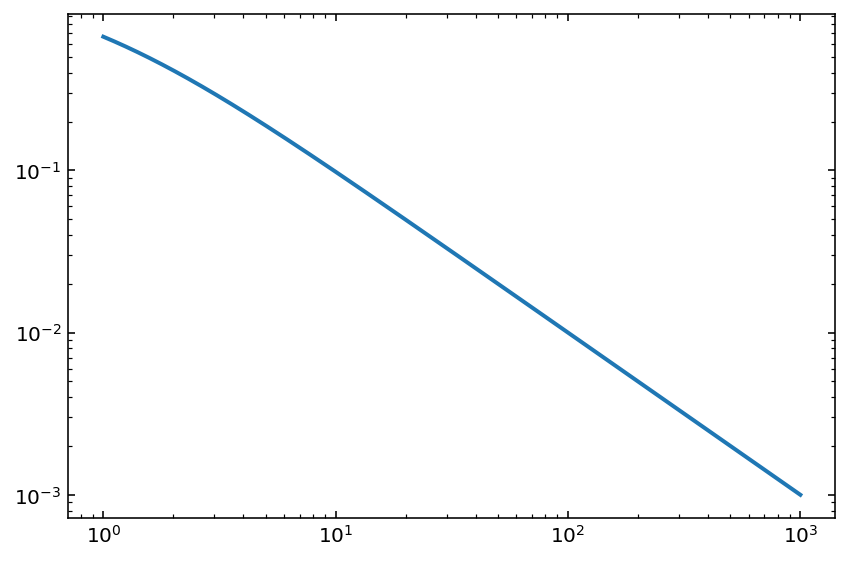

In [17]:
def draw_ge():
    e = np.logspace(1e-7,3,1000)
    y=(e*np.sqrt(e*e-1)-np.log(e+np.sqrt(e**2-1)))/(e*e-1)**1.5
    plt.loglog(e,y)
    
draw_ge()

In [49]:
def get_bmin(alpha):
    b_min_pro = Ru*(3*alpha**3*Reff/Ru*rg**2/Ru**2)**(1.0/4)
    
    b_min_ret = Ru*np.sqrt(1+.5*alpha*Reff/Ru)
    
    return b_min_pro, b_min_ret

def get_bmax(alpha, theta):
    b_max_pro = (4*alpha**3*Reff*rg**2/np.tan(theta/2))**(1.0/3)
    
    b_max_ret = 0.25*alpha*Reff/np.tan(theta/2)
    
    return b_max_pro, b_max_ret

def fe(e):
    res = ( e*np.sqrt(e**2-1) - np.log(e+np.sqrt(e**2-1)) ) /(e**2-1)**1.5
    res[e==1] = 2.0/3
    return res

def draw_2d(r,b, y_pro, y_ret,bar_label,lvs=40):
    fig =plt.figure(figsize=(4,6))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    
    cs1 = ax1.contourf(r, b, y_pro,levels=lvs,extend='both')
    #cs1.cmap.set_over('y')
    #cs1.cmap.set_under('b')
    cbar1 = plt.colorbar(cs1,ax=ax1)
    cbar1.set_label(bar_label)
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    #ax1.set_xlabel('r [$r_g$]')
    ax1.set_xlabel('r [au]')
    ax1.set_ylabel('b [au]')
    ax1.set_ylim(1e0,1e3)
    #ax1.set_ylim(1e-2,1e3)
    
    cs2 = ax2.contourf(r,b, y_ret,levels=lvs,extend='both')
    #cs2.cmap.set_over('y')
    #cs2.cmap.set_under('b')
    cbar2 = plt.colorbar(cs2, ax=ax2)
    cbar2.set_label(bar_label)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    #ax2.set_xlabel('r [$r_g$]')
    ax2.set_xlabel('r [au]')
    ax2.set_ylabel('b [au]')
    ax2.set_ylim(1e-2,1e2)
    #ax2.set_ylim(1e-2,1e3)
    
    
    plt.tight_layout()
    return ax1, ax2
    
def draw_forbiden(ax1, ax2, r, b, rr, R_pro, R_ret, log_t_r_pro, log_t_r_ret):
    cs = ax1.contour(r,b, log_t_r_pro,levels=[0],linestyles='--',colors='k')
    ax1.clabel(cs,inline=1)
    cs = ax2.contour(r,b, log_t_r_ret,levels=[0],linestyles='--',colors='k')
    ax2.clabel(cs,inline=1)
    
    
    #ax1.fill_between(rr,b.min(), R_pro,lw=1.5,color='gray',alpha=1,label='$\\mu$TDE',hatch='/')
    #ax2.fill_between(rr,b.min(), R_ret,lw=1.5,color='gray',alpha=1,label='$\\mu$TDE',hatch='/')
    ax1.legend()
    ax2.legend()
    
    
def build_model(m1, m2, m3):
    G = 6.67e-11
    km = 1000
    Rs = 6.957e8
    ms = 2e30
    au = 1.5e11
    
    mu12=G*(m1+m2)*ms
    mu3 =G*m3*ms
    rg = m3*3*km
    
    data_den = 100
    
    Rutde =  (m1/m2)**(1.0/3)*m2**0.75*Rs
    Rtde =(m3/m2)**(1.0/3)*m2**0.75*Rs
    
    
    rr = np.logspace(2,5,data_den)*rg
   
    bb = np.logspace(-2,3,data_den)*au
    
    R_hill = rr*(m1/3/m3)**(1.0/3)
    
    r, b= np.meshgrid(rr,bb)
    #R_hill = r*(m1/3/m3)**(1.0/3)
    
    
    v_inf_pro = 0.5*b/r*np.sqrt(mu3/r)
    v_inf_ret = 2*np.sqrt(mu3/r)
    
    t_orb = 2*np.pi*np.sqrt(r**3/mu3)
    
    a_pro = -mu12/v_inf_pro**2
    e_pro = np.sqrt(1+b**2/a_pro**2)
    
    a_ret = -mu12/v_inf_ret**2
    e_ret = np.sqrt(1+b**2/a_ret**2)
    
    h_pro = b*v_inf_pro
    h_ret = b*v_inf_ret
    
    p_pro = h_pro**2/mu12
    p_ret = h_ret**2/mu12
    
    t_turn_pro = 2*np.sqrt(p_pro**3/mu12)*fe(e_pro)
    t_turn_ret = 2*np.sqrt(p_ret**3/mu12)*fe(e_ret)
    
    t_r_pro = t_turn_pro/t_orb
    
    t_r_ret = t_turn_ret/t_orb
    
    #print(t_turn_pro, t_r_pro)
    theta_pro = 2*np.arctan( 4*mu12/mu3* (r/b)**3)
    cos_pro = np.cos(theta_pro)
    
    theta_ret = 2*np.arctan( mu12/mu3/4* (r/b))
    cos_ret = np.cos(theta_ret)
    
    bu_pro = Rutde*(8*mu12/mu3)**0.25*(rr/Rutde)**0.75
    bu_ret = Rutde*np.sqrt(1+ rr/Rutde*mu12/mu3/2)
    
    k1 = m1/(m1+m2)
    k2 = m2/(m1+m2)
    
    
    a1_ret = r/(2-  ( (k1-k2)**2 +4*(k1-k2)*k2*cos_ret+4*k2**2 ) )
    a2_ret = r/(2-  ( (k1-k2)**2 -4*(k1-k2)*k1*cos_ret+4*k1**2 ) )
    
    e1_ret = np.sqrt(1-  (2-  ( (k1-k2)**2 +4*(k1-k2)*k2*cos_ret+4*k2**2 ) ) *(k1-k2+2*k2*cos_ret)**2 ) 
    e2_ret = np.sqrt(1- (2-  ( (k1-k2)**2 -4*(k1-k2)*k1*cos_ret+4*k1**2 ) ) * (k1-k2-2*k1*cos_ret)**2)
    
    beta1 = m1/(m1+m2)*b/(2*r)
    beta2 = m2/(m1+m2)*b/(2*r)
    a1_pro = r/(1-beta2**2 + 2*beta2*cos_pro)
    a2_pro = r/(1-beta1**2 - 2*beta1*cos_pro)
    
    e1_pro = np.sqrt(1-(beta2*cos_pro-1)**2*(1+2*beta2*cos_pro-beta2**2))
    e2_pro = np.sqrt(1-(beta1*cos_pro+1)**2*(1-2*beta1*cos_pro-beta1**2))
    
    log_t_r_pro = np.log10(t_r_pro)
    log_t_r_ret = np.log10(t_r_ret)
    
    
    ax1, ax2 = draw_2d(r/rg,b/au, log_t_r_pro, log_t_r_ret,'$\\log_{10}(\\tau_{\\rm turn}/\\tau_{\\rm orb})$',np.linspace(-6,6,13))
    ax1.plot(rr/rg, R_hill/au,color='r',label='$R_{\\rm Hill}$',ls='--')
    ax2.plot(rr/rg, R_hill/au,color='r',label='$R_{\\rm Hill}$',ls='--')
    ax1.set_title('$m_1=1$$M_\\oplus$,$m_2=1$$M_\\oplus$,$m_3=1$$M_\\odot$')
    ax2.set_title('retrograde')
    
    draw_forbiden(ax1, ax2,r/rg, b/au,rr/rg, bu_pro/au, bu_ret/au, log_t_r_pro, log_t_r_ret)
    plt.tight_layout()
    plt.savefig('timescale-planet.pdf',dpi=400)
    return
    
    ax1, ax2 = draw_2d(r/rg,b/au, theta_pro*180/np.pi, theta_ret*180/np.pi,'$\\theta_{\\rm turn}$',np.linspace(0,180,19))
    draw_forbiden(ax1, ax2,r/rg, b/au,rr/rg, bu_pro/au, bu_ret/au, log_t_r_pro, log_t_r_ret)
    plt.savefig('turning-angle.pdf',dpi=400)
    
    ax1, ax2 = draw_2d(r/rg,b/au, e1_pro, e1_ret,'$e_{\\rm 1}$',np.linspace(0,1,10))
    draw_forbiden(ax1, ax2,r/rg, b/au,rr/rg, bu_pro/au, bu_ret/au, log_t_r_pro, log_t_r_ret)
    plt.savefig('e1.pdf',dpi=400)
    
    ax1, ax2 = draw_2d(r/rg,b/au, e2_pro, e2_ret,'$e_{\\rm 2}$',np.linspace(0,1,10))
    draw_forbiden(ax1, ax2,r/rg, b/au,rr/rg, bu_pro/au, bu_ret/au, log_t_r_pro, log_t_r_ret)
    plt.savefig('e2.pdf',dpi=400)
    
    
    ax1, ax2 = draw_2d(r/rg,b/au, np.log10(a1_pro/au), np.log10(a1_ret/au),'$\\log_{10}(r_{p,1}/R_{\\rm TDE})$')
    draw_forbiden(ax1, ax2,r/rg, b/au,rr/rg, bu_pro/au, bu_ret/au, log_t_r_pro, log_t_r_ret)
    plt.savefig('rp1.pdf',dpi=400)
    
    ax1, ax2 = draw_2d(r/rg,b/au, np.log10(a2_pro/au), np.log10(a2_ret/au),'$\\log_{10}(r_{p,2}/R_{\\rm TDE})$')
    draw_forbiden(ax1, ax2,r/rg, b/au,rr/rg, bu_pro/au, bu_ret/au, log_t_r_pro, log_t_r_ret)
    plt.savefig('rp2.pdf',dpi=400)
    

In [30]:
build_model(30,1,1e8)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:137: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:148: RuntimeWarning: invalid value encountered in log10


In [19]:
def calc_turning_angle(mu,v_inf, b):
    #return 2*np.arctan(mu/(v_inf**2*b))
    return  np.arccos(-mu/np.sqrt(mu**2+v_inf**4*b**2))

def rotate(vx,vy, turn_angle):
    cost = np.cos(turn_angle)
    sint = np.sin(turn_angle)
    
    return vx*cost-vy*sint, vx*sint+vy*cost 

def get_cos_sin(a, e, r, positive=1):
    p = a*(1-e*e)
    
    if(e==0):
        cosi = 0
    else:
        cosi = (p/r-1)/e
    
    if(positive==1):
        sini = np.sqrt(1-cosi*cosi)
    else:
        sini = -np.sqrt(1-cosi*cosi)
        
    return cosi, sini
        
def get_vp(a,e, mu, r, cosi, sini, signs=1):
    p = a*(1-e*e)
    v = np.sqrt(mu/p)
    return signs*v*(-sini), signs*v*(e+cosi), r*cosi, r*sini

def fe(e):
    res = ( e*np.sqrt(e**2-1) - np.log(e+np.sqrt(e**2-1)) ) /(e**2-1)**1.5
    res[e==1] = 2.0/3
    return res
def fe_gen(e):
    return e*np.sqrt(e**2-1) - np.log(e+np.sqrt(e**2-1))

def scattering(m1, m2, theta, v1x, v1y, v2x, v2y):
    m12 = m1+m2
    vcmx = (m1*v1x+m2*v2x)/m12
    vcmy = (m1*v1y+m2*v2y)/m12
    
    v1rx = (v1x-v2x)*m2/m12
    v1ry = (v1y-v2y)*m2/m12
    
    v2rx = (v2x-v1x)*m1/m12
    v2ry = (v2y-v1y)*m1/m12
    
    v1px, v1py =  rotate(v1rx, v1ry, theta)
    
    v2px, v2py =  rotate(v2rx, v2ry, theta)
    
    return vcmx+v1px, vcmy+v1py, vcmx+v2px, vcmy+v2py
    
def get_ae(mu, vx, vy, x, y):
    v2 = (vx*vx+vy*vy)
    r=np.sqrt(x**2+y**2)
    a = mu/(2*mu/r-v2)
    lz = x*vy-y*vx
    l2= lz*lz
    epsilon = -mu/2/a
    e2 = 1+2*l2*epsilon/mu**2
    
    return a, np.sqrt(e2)
    
def draw_2d(r,b, y,bar_label,lvs=40):
    fig =plt.figure(figsize=(4.5*1.5,3*1.5))
    ax1 = fig.add_subplot(1,1,1)
    
    
    cs1 = ax1.contourf(r, b, y,levels=lvs)
    cbar1 = plt.colorbar(cs1,ax=ax1)
    cbar1.set_label(bar_label)
    
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('r [$r_g$]')
    ax1.set_ylabel('b [au]')
    #ax1.set_ylim(5e-1,1e4)

    return ax1

def draw_forbiden(ax1, r, b, rr, R, log_t_r):
    cs = ax1.contour(r,b, log_t_r,levels=[0],linestyles='--',colors='k')
    ax1.clabel(cs,inline=1)
    
    
    ax1.fill_between(rr,b.min(), R,lw=1.5,color='gray',alpha=0.3,label='$\\mu$TDE',hatch='/')
   
    ax1.legend()
    
def calc_gen_b_range(m1,m2,m3,a1,e1, r, sign, positive, rmin):
    G = 6.67e-11
    km = 1000
    Rs = 6.957e8
    ms = 2e30
    au = 1.5e11
    
    mu12=G*(m1+m2)*ms
    mu3 =G*m3*ms
    b = np.logspace(-10,10,100)*au
    #rg = m3*3*km
    
    data_den = 100
   
    coss, sins = get_cos_sin(a1, e1, r, positive)
        
    v1x, v1y, x1, y1 = get_vp(a1+b*m2/(m1+m2), e1, mu3, r+b*m2/(m1+m2), coss, sins, sign)
    
    v2x, v2y, x2, y2 = get_vp(r-b*m1/(m1+m2), 0, mu3, r-b*m1/(m1+m2), coss, sins, 1)
    
    #print(v2x, v2y, x2, y2)
    
    vinfx = v1x - v2x
    
    vinfy = v1y - v2y
    
    vinf = np.sqrt(vinfx*vinfx+vinfy*vinfy)
    
    bu = rmin*np.sqrt(1+ 2*mu12/rmin/vinf**2)
    
    t_orb = 2*np.pi*np.sqrt(r**3/mu3)
    
    a_hyp = -mu12/vinf**2
    
    e_hyp = np.sqrt(1+b**2/a_hyp**2)
  
    t_turn = 2*np.sqrt(-a_hyp**3/mu12)*fe_gen(e_hyp)
    
    t_r = t_turn/t_orb
    
   # print(bu)
    
    return bu, np.interp(1,t_r,b)
    
def build_gen_model(m1,m2,m3,a1,e1, r,b, sign, positive, turn_sign):
    G = 6.67e-11
    km = 1000
    Rs = 6.957e8
    ms = 1.98e30
    au = 1.49e11
    
    mu12=G*(m1+m2)*ms
    mu3 =G*m3*ms
    
    coss, sins = get_cos_sin(a1, e1, r, positive)
        
    v1x, v1y, x1, y1 = get_vp(a1+b*m2/(m1+m2), e1, mu3, r+b*m2/(m1+m2), coss, sins, sign)
    
    v2x, v2y, x2, y2 = get_vp(r-b*m1/(m1+m2), 0, mu3, r-b*m1/(m1+m2), coss, sins, 1)
    
    #print(v2x, v2y, v1x, v1y)
    
    vinfx = v1x - v2x
    
    vinfy = v1y - v2y
    
    vinf = np.sqrt(vinfx*vinfx+vinfy*vinfy)
    
    
   
    turn = turn_sign* calc_turning_angle(mu12, vinf, b)
    
    v1px, v1py, v2px, v2py = scattering(m1, m2, turn, v1x, v1y, v2x, v2y)
    
    a1p, e1p = get_ae(mu3,v1px, v1py, x1, y1)
    
    a2p, e2p = get_ae(mu3,v2px, v2py, x2, y2)
    
    in1 = (v1px*coss+v1py*sins)<0
    in2 = (v2px*coss+v2py*sins)<0
    
    return a1p, e1p, a2p, e2p, in1, in2

In [3]:
build_gen_model(1,30,1e8, 1e5,0.03,-1, 1, -1)

NameError: name 'build_gen_model' is not defined

2.152768901029606


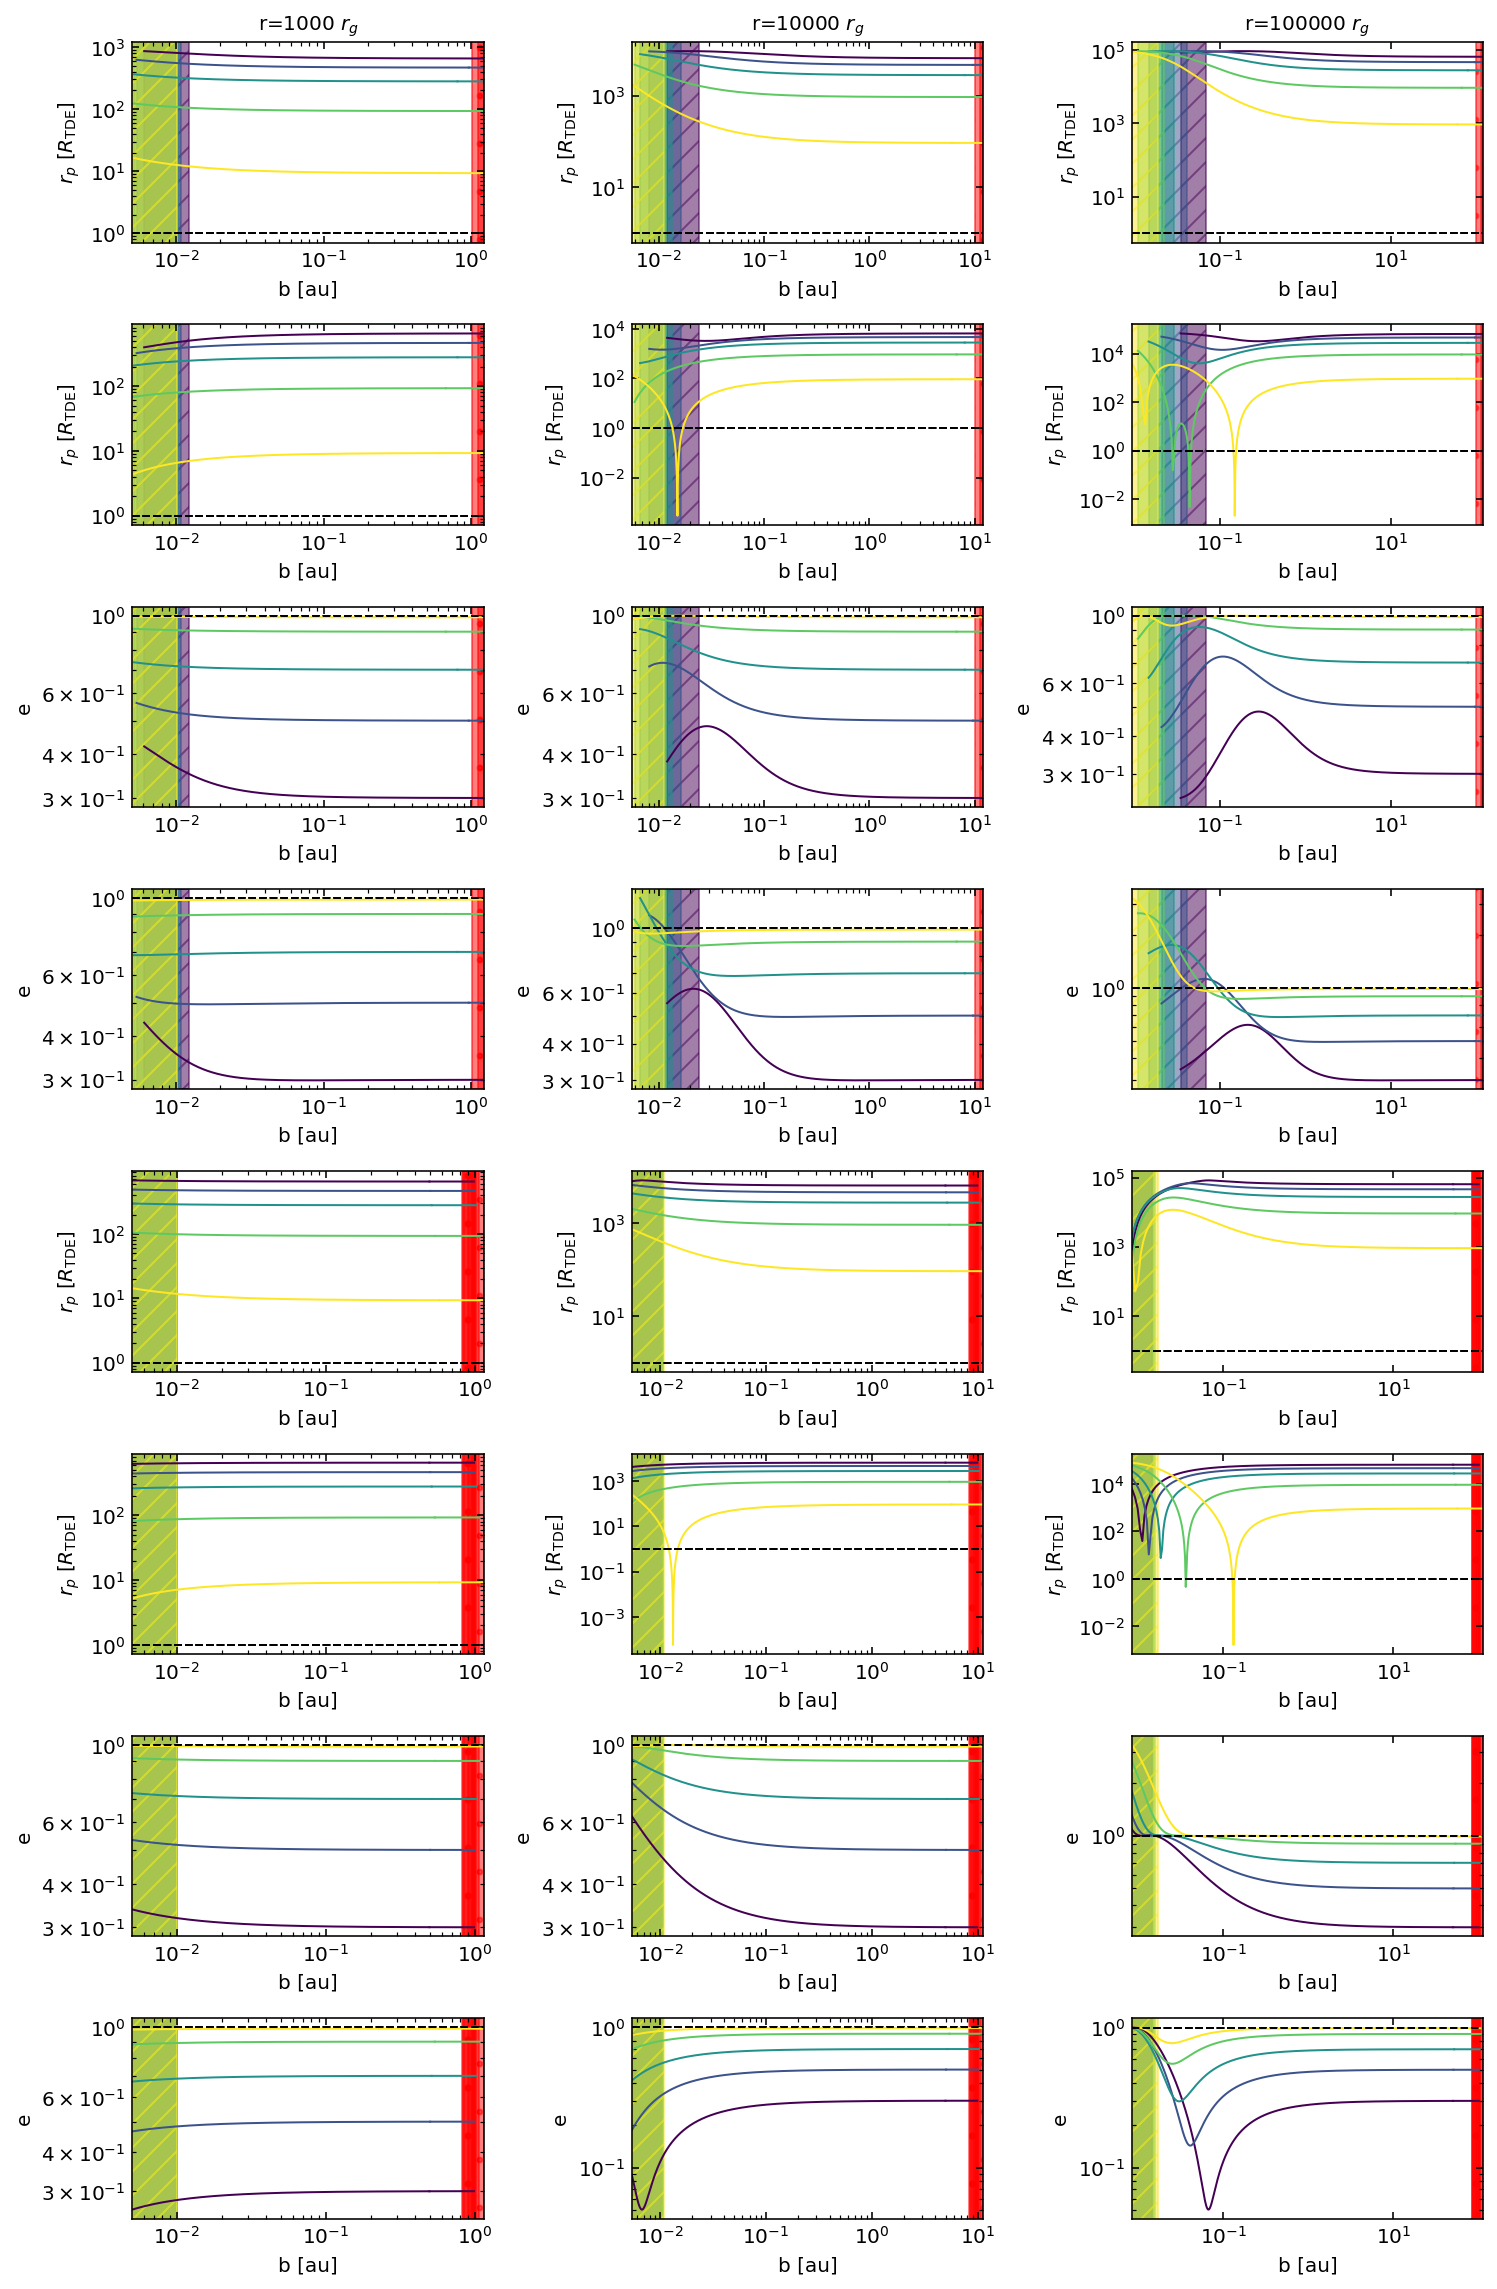

In [59]:
def draw_gen_a_dist():
    m1 =10
    m2 =1
    m3 =1e8
    au = 1.5e11
    rg = m3*3000
    Rs = 6.957e8
    
    Rtde =(m3/m2)**(1.0/3)*m2**0.75*Rs
    print(Rtde/au)
    
    rs = np.array([1000, 10000, 100000])*rg
    
    #rs = np.array([1,10, 100])*au
    
    fig = plt.figure(figsize=(3*3.5,4*4))
    axs = [fig.add_subplot(8,len(rs),i+1) for i in range(len(rs)*8)]
    es = [0.3,0.5,0.7,0.9,0.99]
    colors=cm.viridis(np.linspace(0,1,len(es)))
    for r, i in zip(rs,range(len(rs))):
        a0 = r
        for e0,c in zip(es,colors):
            bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, 1, 1)
            b= np.linspace((bmin)*0.5,(bmax)*1.2,150000)
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, 1, 1, 1) 
            axs[i].plot(b/au, a2*(1-e2)/Rtde,color=c,lw=1,label='$m_2$')
            
            axs[i].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i].set_xlim(b.min()/au,b.max()/au)
            axs[i].set_xscale('log')
            axs[i].set_yscale('log')
            axs[i].set_xlabel('b [au]')
            axs[i].set_ylabel('$r_p$ [$R_{\\rm TDE}$]')
            axs[i].set_title('r='+str(int(r/rg))+' $r_g$')
            
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, 1, 1, -1) 
            axs[i+len(rs)].plot(b/au, a2*(1-e2)/Rtde,color=c,lw=1,label='$m_2$')
            axs[i+len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+len(rs)].set_xscale('log')
            axs[i+len(rs)].set_yscale('log')
            axs[i+len(rs)].set_xlabel('b [au]')
            axs[i+len(rs)].set_ylabel('$r_p$ [$R_{\\rm TDE}$]')
            
            
            bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, 1, -1)
            b= np.linspace((bmin)*0.5,(bmax)*1.2,150000)
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, 1, -1, 1) 
            axs[i+2*len(rs)].plot(b/au, e2,color=c,lw=1,label='$m_2$')
            axs[i+2*len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+2*len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+2*len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+2*len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+2*len(rs)].set_xscale('log')
            axs[i+2*len(rs)].set_yscale('log')
            axs[i+2*len(rs)].set_xlabel('b [au]')
            axs[i+2*len(rs)].set_ylabel('e')
            
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, 1, -1, -1) 
            axs[i+3*len(rs)].plot(b/au, e2,color=c,lw=1,label='$m_2$')
            axs[i+3*len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+3*len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+3*len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+3*len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+3*len(rs)].set_xscale('log')
            axs[i+3*len(rs)].set_yscale('log')
            axs[i+3*len(rs)].set_xlabel('b [au]')
            axs[i+3*len(rs)].set_ylabel('e')
            
            bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, -1, 1)
            b= np.linspace((bmin)*0.5,(bmax)*1.2,150000)
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, -1, 1, 1) 
            axs[i+4*len(rs)].plot(b/au, a2*(1-e2)/Rtde,color=c,lw=1,label='$m_2$')
            axs[i+4*len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+4*len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+4*len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+4*len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+4*len(rs)].set_xscale('log')
            axs[i+4*len(rs)].set_yscale('log')
            axs[i+4*len(rs)].set_xlabel('b [au]')
            axs[i+4*len(rs)].set_ylabel('$r_p$ [$R_{\\rm TDE}$]')
            #axs[i+4*len(rs)].set_title('r='+str(int(r/rg))+' $r_g$')
            
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, -1, 1, -1) 
            axs[i+5*len(rs)].plot(b/au, a2*(1-e2)/Rtde,color=c,lw=1,label='$m_2$')
            axs[i+5*len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+5*len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+5*len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+5*len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+5*len(rs)].set_xscale('log')
            axs[i+5*len(rs)].set_yscale('log')
            axs[i+5*len(rs)].set_xlabel('b [au]')
            axs[i+5*len(rs)].set_ylabel('$r_p$ [$R_{\\rm TDE}$]')
            
            
            bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, -1, -1)
            b= np.linspace((bmin)*0.5,(bmax)*1.2,150000)
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, -1, -1, 1) 
            axs[i+6*len(rs)].plot(b/au, e2,color=c,lw=1,label='$m_2$')
            axs[i+6*len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+6*len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+6*len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+6*len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+6*len(rs)].set_xscale('log')
            axs[i+6*len(rs)].set_yscale('log')
            axs[i+6*len(rs)].set_xlabel('b [au]')
            axs[i+6*len(rs)].set_ylabel('e')
            
            
            a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, -1, -1, -1) 
            axs[i+7*len(rs)].plot(b/au, e2,color=c,lw=1,label='$m_2$')
            axs[i+7*len(rs)].axhline(1,color='k',label='TDE',ls='--',lw=1)
            axs[i+7*len(rs)].axvspan(b.min()/au,bmin/au,color=c,hatch='//',alpha=0.5)
            axs[i+7*len(rs)].axvspan(bmax/au,b.max()/au,color='r',hatch='.',alpha=0.5)
            axs[i+7*len(rs)].set_xlim(b.min()/au,b.max()/au)
            axs[i+7*len(rs)].set_xscale('log')
            axs[i+7*len(rs)].set_yscale('log')
            axs[i+7*len(rs)].set_xlabel('b [au]')
            axs[i+7*len(rs)].set_ylabel('e')
          
        
    plt.savefig('TDE.pdf',dpi=400)
    
draw_gen_a_dist()

In [ ]:
def draw_gen_a_dist():
    m1 =1
    m2 =30
    m3 =1e8
    au = 1.5e11
    rg = m3*3000
    Rs = 6.957e8
    
    Rtde =(m3/m2)**(1.0/3)*m2**0.75*Rs

    
    rs = np.array([200,400,1000, 10000, 100000])*rg
    
    #rs = np.array([0.1,1,10, 100])*au
    
    #rs = np.array([2,4,10, 100])*au
    
    lens = len(rs)
    es = [0,0.1,0.2]#,0.5,0.99]
    #es = [0.01,0.2,0.4,0.8,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        #plt.figure(figsize = (4*lens,4))
        
        f, axarr = plt.subplots(2, lens, gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4*4,3))

        for r, i in zip(rs,range(lens)):
            a0 = r
            R_hill = r*(m1/3/m3)**(1.0/3)
            for e0,c in zip(es,colors):
                bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1])
                b= np.logspace(np.log10(bmin),np.log10(bmax),10000)
            
                a1, e1, a2, e2,in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
                
                ax = f.axes[i]
                ax.plot(b/R_hill, (a1-a0)/a0,color=c,lw=1.5,label='$m_1$, $e_1$='+str(e0))
                ax.plot(b/R_hill, (a2-a0)/a0,color=c,lw=1.5,label='$m_2$',ls='--')
                print(bmin, R_hill)
                ax.axvline(bmin/R_hill,color=c,ls='--',lw=1.5)
                ax.axvline(bmax/R_hill,color=c,ls=':',lw=1.5)
                if(e0==1e-6):
                    print(r/rg, bmin/R_hill,bmax/R_hill)
                
                ax.set_xscale('log')
                if((np.abs((a2-a0)/a0).max()>10 ) | (np.abs((a1-a0)/a0).max()>10)):
                    ax.set_yscale('symlog')
                
                ax.set_xticklabels([])
                ax.set_ylabel('$\\Delta a/a_0$')
                
                if(case == (1,1,1)):
                    #ax.set_title('r=10$^{'+str(int(np.log10(r/rg)))+'}$ $r_g$',fontsize=12,bbox=props)
                    ax.set_title('r=10$^{'+str(int(np.log10(r/au)))+'}$ au',fontsize=12,bbox=props)
                    if(i==0):
                        ax.legend(fontsize=8,loc=1,ncol=2)
            
            
                
                ax = f.axes[i+lens]
                ax.plot(b/R_hill, e1,color=c,lw=1.5)
                ax.plot(b/R_hill, e2,color=c,lw=1.5,ls='--')
               
                ax.axvline(bmin/R_hill,color=c,ls='--',lw=1.5)
                ax.axvline(bmax/R_hill,color=c,ls=':',lw=1.5)
                #ax.set_xlim(b.min()/R_hill/3,b.max()/R_hill*3)
                ax.set_xscale('log')
                #ax.set_yscale('log')
                ax.set_xlabel('b [$R_{\\rm Hill}$]')
                ax.set_ylabel('e')
            
            if(i==0):
                g=0.3
                xmin, xmax = ax.get_xlim()
                ymin, ymax = ax.get_ylim()

                ax.text(xmin**(1+g)/xmax**g,ymax*1,csl,bbox=props,fontsize=15)
                
            
        #plt.savefig('planet-ae-'+csl+'.pdf',dpi=400,bbox_inches='tight')
                
        #plt.tight_layout()
            
            
            
          
    #plt.tight_layout()
    #plt.subplots_adjust(wspace=0, hspace=0)
    #plt.savefig('TDE.pdf',dpi=400)
    
draw_gen_a_dist()

In [45]:
def verify(m1,m2,m3,rr):
    G = 6.67e-11
    km = 1000
    Rs = 6.957e8
    ms = 2e30
    au = 1.5e11
    
    mu12=G*(m1+m2)*ms
    mu3 =G*m3*ms
    rg = m3*3*km
    
    r =rr*rg
    data_den = 200
   
    b = np.logspace(-7.,-2,data_den)*r
    
    
    
    
    v_inf_pro = np.sqrt(mu3/(r-b*m1/(m1+m2))) - np.sqrt(mu3/(r+b*m2/(m1+m2)))
    
    v_inf_ret = np.sqrt(mu3/(r+b*m2/(m1+m2))) + np.sqrt(mu3/(r-b*m1/(m1+m2)))
    #v_inf_ret = 2*np.sqrt(mu3/(r+1000000*b*m2/(m1+m2)))# + np.sqrt(mu3/(r-b*m1/(m1+m2)))
    
    
    #theta_pro = 2*np.arctan( 4*mu12/mu3* (r/b)**3)
    #theta_pro = 2*np.arctan( mu12/v_inf_pro**2/b)
    theta_pro = np.pi - 2*np.arccos(1/np.sqrt(1+(b*v_inf_pro**2)**2/mu12**2))

    cos_pro = np.cos(theta_pro)
    
    #theta_ret = 2*np.arctan( mu12/mu3/4* (r/b))
    #theta_ret = 2*np.arctan(  mu12/v_inf_ret**2/b)
    theta_ret = np.pi - 2*np.arccos(1/np.sqrt(1+(b*v_inf_ret**2)**2/mu12**2))
    cos_ret = np.cos(theta_ret)
    
    k1 = m1/(m1+m2)
    k2 = m2/(m1+m2)
   # print(k1,k2,r/au)
    a10 = r+b* m2/(m1+m2)
    a20 = r-b * m1/(m1+m2)
    
    R_hill = r*(m1/3/m3)**(1.0/3)
    
    a1_ret = a10/(2-  ( (k1-k2)**2 +4*(k1-k2)*k2*cos_ret+4*k2**2 ) )
    a2_ret = a20/(2-  ( (k1-k2)**2 -4*(k1-k2)*k1*cos_ret+4*k1**2 ) )
    
    e1_ret = np.sqrt(1-  (2-  ( (k1-k2)**2 +4*(k1-k2)*k2*cos_ret+4*k2**2 ) ) *(k1-k2+2*k2*cos_ret)**2 ) 
    e2_ret = np.sqrt(1- (2-  ( (k1-k2)**2 -4*(k1-k2)*k1*cos_ret+4*k1**2 ) ) * (k1-k2-2*k1*cos_ret)**2)
    
    beta1 = m1/(m1+m2)*b/(2*r)
    beta2 = m2/(m1+m2)*b/(2*r)

    a1_pro = a10/(1-beta2**2 + 2*beta2*cos_pro)
    a2_pro = a20/(1-beta1**2 - 2*beta1*cos_pro)
    
    e1_pro = np.sqrt(1-(beta2*cos_pro-1)**2*(1+2*beta2*cos_pro-beta2**2))
    e2_pro = np.sqrt(1-(beta1*cos_pro+1)**2*(1-2*beta1*cos_pro-beta1**2))
    
    #plt.figure()
    #plt.plot(b/R_hill, (a2_ret-r)/r)
   # print("aaaa",a1_pro/rg,r/rg)
    return b/R_hill, e1_pro, a1_pro/a10, e2_pro, a2_pro/a20,e1_ret, a1_ret/a10, e2_ret, a2_ret/a20
    
def load_verify(fname):
    km = 1000
    Rs = 6.957e8
    ms = 2e30
    au = 1.5e11
    rg = 1e8*3*km
    
    
    
    rr = np.array([500000])*rg#[1000,100]#,10,4,2]#,4,10,100,1000]
    
    ##prograde
    #bs2=[ 0.22542548897442702, 5.81593718826535]
    #bs4=[0.15938583770806608, 5.844190165966328]    
    #bs10=[0.10079912121687432, 5.8383464513356325]
    #bs100=[0.03187446890238977, 5.914147418568634]
    
    ##retrograde
    #bs2=[0.004380769665560917, 0.3018384754422989]
    #bs4=[0.0022617014952401597, 0.302581683428365]
    #bs10=[0.0009853176111092117, 0.3032208000678681]
    #bs100=[0.00018046905406799365, 0.30603415348264346]


    #prograde
    #bs200= [3.164009259263482, 50.22760874098482]
    #bs400= [2.237259902196113, 50.65238139934471]
    #bs1k =[1.4149550684241223, 50.19442738411197]
    #bs10k= [0.4474457402032884, 50.8518959130969]
    #bs100k= [0.14149469283760585, 51.44980397001889]

    #retrograde
    bs200= [0.024170397314339714, 0.46039009203105263]
    bs400= [0.012111055907786656, 0.4592783640153521]
    bs1k= [0.004875319411999273, 0.46649071652933943]
    bs10k= [0.0005317274623393942, 0.4618780271758223]
    bs100k= [8.562716270921955e-05, 0.4595149465883935]

    colors = cm.viridis(range(len(rr)))
    plt.figure(figsize=(4,3))
    for r,c in zip(rr,colors):
        R_hill = r*(1/3/1e8)**(1.0/3)
        data = np.loadtxt(fname+'-'+str(int(r/rg))+'.000000-0.000000.txt',delimiter=',')
        b=data[:,0]
        a1 = data[:,1]
        e1 =data[:,2]
        a2=data[:,3]
        e2 =data[:,4]
        stat=data[:,5]
        select= stat==0
        #a01 = r+b*au*(30)/(31)
        #a02 = r-b*au*(1)/(31)#*rg/au
        bx, e1_pro, a1_pro, e2_pro, a2_pro,e1_ret, a1_ret, e2_ret, a2_ret = verify(1,30,1e8,r/rg)
    
        #plt.plot(bx, a1_ret,color='r',lw=1,ls='-',label='$a_1^\\prime$ analytical')
        #plt.plot(b[select]*au/R_hill,(a1)[select],'.',color='r',markersize=4,label='$a_1^\\prime$ simulations')
        
        #plt.plot(bx, a2_ret,color='g',lw=1,ls=':',label='$a_2^\\prime$ analytical')
        #plt.plot(b[select]*au/R_hill,(a2)[select],'.',color='g',markersize=4,label='$a_2^\\prime$ simulations')
        #print(a1,r/au)
        
        plt.plot(bx, e1_ret,color='r',lw=1,ls='-',label='$e_1^\\prime$ analytical')
        plt.plot(b[select]*au/R_hill,e1[select],'.',color='r',markersize=4,label='$e_1^\\prime$ simulations')
        
        plt.plot(bx, e2_ret,color='g',lw=1,ls=':',label='$e_2^\\prime$ analytical')
        plt.plot(b[select]*au/R_hill,e2[select],'.',color='g',markersize=4,label='$e_2^\\prime$ simulations')
        
        #plt.axvline(bs200[0],ls='--',color='gray',label='collision')
        plt.axvline(bs100k[0],ls='--',color='gray',label='micro-TDE')
        plt.axvline(bs100k[1],ls='--',color='b',label='valid $b_{\\rm max}$')
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('b [R$_{\\rm Hill}$]')
    #plt.ylabel('$e$')
    plt.ylabel('$a$ $[a_0]$')
    #plt.legend()
    #plt.ylim(-10,10)
    #plt.xlim(1e-4,1e-3)
   # plt.savefig('smbh-verify-ret-a100k.png',dpi=400)
load_verify('code/SMBH-retTDE-30.000000')


In [212]:
def calc_b_range(m1, m2, m3, rrr):
    G = 6.67e-11
    km = 1000
    Rs = 6.957e8
    ms = 2e30
    au = 1.5e11
    
    mu12=G*(m1+m2)*ms
    mu3 =G*m3*ms
    #rg = m3*3*km
    
    Rutde = 2*6.3781e6# (m1/m2)**(1.0/3)*m2**0.75*Rs
    Rutde =  (m2/m1)**(1.0/3)*m1**0.75*Rs
    
    b =np.logspace(-6,6,1000)*au
    r = rrr
    
    v_inf_pro = 0.5*b/r*np.sqrt(mu3/r)
    v_inf_ret = 2*np.sqrt(mu3/r)
    
    t_orb = 2*np.pi*np.sqrt(r**3/mu3)
    
    a_pro = -mu12/v_inf_pro**2
    e_pro = np.sqrt(1+b**2/a_pro**2)
    
    a_ret = -mu12/v_inf_ret**2
    e_ret = np.sqrt(1+b**2/a_ret**2)
    
    h_pro = b*v_inf_pro
    h_ret = b*v_inf_ret
    
    p_pro = h_pro**2/mu12
    p_ret = h_ret**2/mu12
    
    t_turn_pro = 2*np.sqrt(p_pro**3/mu12)*fe(e_pro)
    t_turn_ret = 2*np.sqrt(p_ret**3/mu12)*fe(e_ret)
    
    t_r_pro = t_turn_pro/t_orb
    
    t_r_ret = t_turn_ret/t_orb
    
    bmax_pro = np.interp(1,(t_r_pro),b)
    
    bmax_ret = np.interp(1,(t_r_ret),b)
    
    bu_pro = Rutde*(8*mu12/mu3)**0.25*(r/Rutde)**0.75
    
    bu_ret = Rutde*np.sqrt(1+ r/Rutde*mu12/mu3/2)

    
    return bu_pro/au, bmax_pro/au, bu_ret/au, bmax_ret/au
    
def calc_p_ae(m1, m2, m3,rrr,b ):
    G = 6.67e-11
    km = 1000
    Rs = 6.957e8
    ms = 2e30
    au = 1.5e11
    
    mu12=G*(m1+m2)*ms
    mu3 =G*m3*ms
    #rg = m3*3*km
    #Rutde =  (m1/m2)**(1.0/3)*m2**0.75*Rs
    #Rtde =(m3/m2)**(1.0/3)*m2**0.75*Rs
    r = rrr

    #v_inf_pro = 0.5*b/r*np.sqrt(mu3/r)
    #v_inf_ret = 2*np.sqrt(mu3/r)
    
    #t_orb = 2*np.pi*np.sqrt(r**3/mu3)
    
    #a_pro = -mu12/v_inf_pro**2
    #e_pro = np.sqrt(1+b**2/a_pro**2)
    
    #a_ret = -mu12/v_inf_ret**2
    #e_ret = np.sqrt(1+b**2/a_ret**2)
    
    #h_pro = b*v_inf_pro
    #h_ret = b*v_inf_ret
    
    #p_pro = h_pro**2/mu12
    #p_ret = h_ret**2/mu12
    
    #t_turn_pro = 2*np.sqrt(p_pro**3/mu12)*fe(e_pro)
    #t_turn_ret = 2*np.sqrt(p_ret**3/mu12)*fe(e_ret)
    
    #t_r_pro = t_turn_pro/t_orb
    
    #t_r_ret = t_turn_ret/t_orb
    
    #print(t_turn_pro, t_r_pro)
    theta_pro = 2*np.arctan( 4*mu12/mu3* (r/b)**3)
    cos_pro = np.cos(theta_pro)
    
    theta_ret = 2*np.arctan( mu12/mu3/4* (r/b))
    cos_ret = np.cos(theta_ret)
    
    k1 = m1/(m1+m2)
    k2 = m2/(m1+m2)
    
    a1_ret = r/(2-  ( (k1-k2)**2 +4*(k1-k2)*k2*cos_ret+4*k2**2 ) )
    a2_ret = r/(2-  ( (k1-k2)**2 -4*(k1-k2)*k1*cos_ret+4*k1**2 ) )
    
    e1_ret = np.sqrt(1-  (2-  ( (k1-k2)**2 +4*(k1-k2)*k2*cos_ret+4*k2**2 ) ) *(k1-k2+2*k2*cos_ret)**2 ) 
    e2_ret = np.sqrt(1- (2-  ( (k1-k2)**2 -4*(k1-k2)*k1*cos_ret+4*k1**2 ) ) * (k1-k2-2*k1*cos_ret)**2)
    
    beta1 = m1/(m1+m2)*b/(2*r)
    beta2 = m2/(m1+m2)*b/(2*r)

    a1_pro = r/(1-beta2**2 + 2*beta2*cos_pro)
    a2_pro = r/(1-beta1**2 - 2*beta1*cos_pro)
    
    e1_pro = np.sqrt(1-(beta2*cos_pro-1)**2*(1+2*beta2*cos_pro-beta2**2))
    e2_pro = np.sqrt(1-(beta1*cos_pro+1)**2*(1-2*beta1*cos_pro-beta1**2))
    
    return a1_ret, a2_ret, e1_ret, e2_ret, a1_pro, a2_pro, e1_pro, e2_pro


def draw_a_dist():
    #m1 =30
    #m2 =1
    #m3 =1e8
    
    m1 =3e-6
    m2 =3e-6
    m3 =1
    au = 1.5e11
    rg = m3*3000
    
    #rs = np.array([100, 1000, 10000,100000])*rg
    
    
    
    rs = np.array([1,10, 100,1000])*au
    
    fig = plt.figure(figsize=(4*3.5,3*2))
    axs = [fig.add_subplot(4,len(rs),i+1) for i in range(len(rs)*4)]
    
    for r, i in zip(rs,range(len(rs))):
        a0 = r
        
        R_hill = r*(m1/3/m3)**(1.0/3)
        
        bmin_p, bmax_p, bmin_r, bmax_r = calc_b_range(m1, m2, m3, r)
     
        b_pro= np.linspace((bmin_p)*0.5,(bmax_p)*1.2,100000)*au
        
        a1_ret, a2_ret, e1_ret, e2_ret, a1_pro, a2_pro, e1_pro, e2_pro = calc_p_ae(m1, m2, m3,r,b_pro)
        
        axs[i].plot(b_pro/R_hill, (a1_pro-a0)/a0,color='k',label='$m_1$')
        axs[i].plot(b_pro/R_hill, (a2_pro-a0)/a0,color='orange',lw=1,label='$m_2$')
        b_crit = np.interp(0,(a2_pro-a0)/a0,b_pro/au)
        theta_c = b_crit/ ( (m1+m2)/m1*4*r/au)
        print(np.arccos(theta_c)*180/np.pi)
        axs[i].axvline(b_crit/R_hill,ls='--',lw=1,color='k',label='$-\\frac{4m_{12}r}{m_1}\\cos\\theta_{\\rm c}$')
       
        axs[i].axvspan(b_pro.min()/R_hill,bmin_p*au/R_hill,color='gray',hatch='//',alpha=0.5)
        axs[i].axvspan(bmax_p*au/R_hill,b_pro.max()/R_hill,color='r',hatch='.',alpha=0.5)
        axs[i].set_xlim(b_pro.min()/R_hill,b_pro.max()/R_hill)
        #axs[i].set_xscale('log')
        axs[i].set_xlabel('b [$R_{\\rm Hill}$]')
        #axs[i].set_xticklabels([])

        axs[i].set_ylabel('$\\Delta a/a_0$')
        #axs[i].set_title('r=10$^{'+str(int(np.log10(r/rg)))+'}$ $r_g$')
        axs[i].set_title('r=10$^{'+str(int(np.log10(r/au)))+'}$ au')
        if(i==0):
            axs[i].legend(fontsize=8)
        
        axs[i+len(rs)].plot(b_pro/R_hill, e1_pro,color='k')
        axs[i+len(rs)].plot(b_pro/R_hill, e2_pro,color='orange',lw=1)
       
        axs[i+len(rs)].axvspan(b_pro.min()/R_hill,bmin_p*au/R_hill,color='gray',hatch='//',alpha=0.5)
        axs[i+len(rs)].axvspan(bmax_p*au/R_hill,b_pro.max()/R_hill,color='r',hatch='.',alpha=0.5)
        axs[i+len(rs)].set_xlim(b_pro.min()/R_hill,b_pro.max()/R_hill)
        #axs[i].set_xscale('log')
        axs[i+len(rs)].set_xlabel('b [$R_{\\rm Hill}$]')
        axs[i+len(rs)].set_ylabel('$\\Delta e$')
        
        
        b_ret= np.linspace((bmin_r)*0.5,(bmax_r)*1.2,100000)*au
        
        a1_ret, a2_ret, e1_ret, e2_ret, a1_pro, a2_pro, e1_pro, e2_pro = calc_p_ae(m1, m2, m3,r,b_ret)
        
        axs[i+2*len(rs)].plot(b_ret/R_hill, (a1_ret-a0)/a0,color='k',ls='--')
        axs[i+2*len(rs)].plot(b_ret/R_hill, (a2_ret-a0)/a0,color='orange',ls='--',lw=1)

        axs[i+2*len(rs)].axvspan(b_ret.min()/R_hill,bmin_r*au/R_hill,color='gray',hatch='//',alpha=0.5)
        axs[i+2*len(rs)].axvspan(bmax_r*au/R_hill,b_ret.max()/R_hill,color='r',hatch='.',alpha=0.5)
        axs[i+2*len(rs)].set_xlim(b_ret.min()/R_hill,b_ret.max()/R_hill)
        axs[i+2*len(rs)].set_xscale('log')
        axs[i+2*len(rs)].set_xlabel('b [$R_{\\rm Hill}$]')
        axs[i+2*len(rs)].set_ylabel('$\\Delta a/a_0$')
        
        axs[i+3*len(rs)].plot(b_ret/R_hill, e1_ret,color='k',ls='--')
        axs[i+3*len(rs)].plot(b_ret/R_hill, e2_ret,color='orange',ls='--',lw=1)

        axs[i+3*len(rs)].axvspan(b_ret.min()/R_hill,bmin_r*au/R_hill,color='gray',hatch='//',alpha=0.5)
        axs[i+3*len(rs)].axvspan(bmax_r*au/R_hill,b_ret.max()/R_hill,color='r',hatch='.',alpha=0.5)
        axs[i+3*len(rs)].set_xlim(b_ret.min()/R_hill,b_ret.max()/R_hill)
        axs[i+3*len(rs)].set_xscale('log')
        axs[i+3*len(rs)].set_xlabel('b [$R_{\\rm Hill}$]')
        axs[i+3*len(rs)].set_ylabel('$\\Delta e$')
        #axs[i+len(rs)].set_yscale('symlog')

    #plt.subplots_adjust(bottom=0,top=1,hspace=0)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    #ax1.set_xscale('log')
    #ax2.set_xscale('log')
    #plt.yscale('log')
    plt.savefig('planet.pdf',dpi=400)
    
#draw_a_dist()

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages

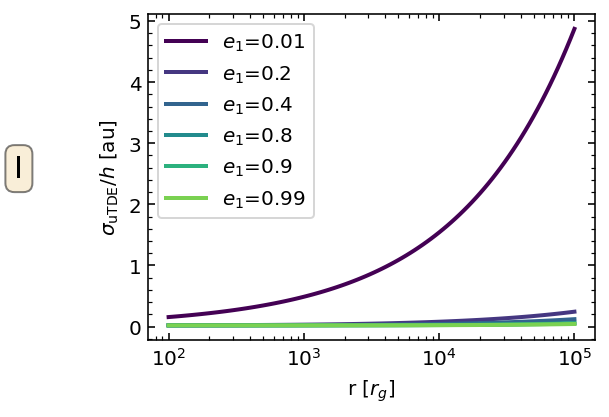

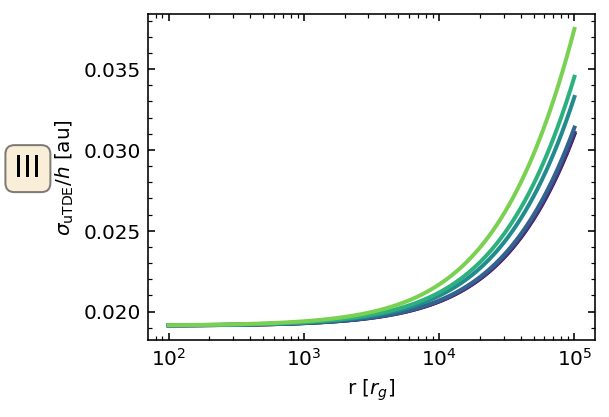

In [239]:
def micro_tde(m1, m2, m3):
    au = 1.5e11
    rg = m3*3000
    Rs = 6.957e8
    
    #rs = np.array([100,1000, 10000, 100000])*rg
    
    #rs = np.array([0.1,1,10, 100])*au
    
   
    #es = [0.01,0.1,0.2]#,0.5,0.99]
    es = [0.01,0.2,0.4,0.8,0.9,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        #plt.figure(figsize = (4*lens,4))
        
        f, axarr = plt.subplots(1,1 , gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4,3))
        
        r = np.logspace(2,5,100)*rg

       
        R_hill = r*(m1/3/m3)**(1.0/3)
        for e0,c in zip(es,colors):
            bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1])
            ax = f.axes[0]
            ax.plot(r/rg, bmin/au,color=c,label= '$e_1$='+str(e0))
            ax.set_xscale('log')
            ax.set_xlabel('r [$r_g$]')
            ax.set_ylabel('$\\sigma_{\\rm uTDE}/h$ [au]')
            
        if(csl=='I'):
            ax.legend()
        g=0.3
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        ax.text(xmin**(1+g)/xmax**g,ymin+(ymax-ymin)*0.5,csl,bbox=props,fontsize=15)
            #ax.set_yscale('log')
                #b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
            
                #a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
        plt.savefig('uTDE-'+csl+'.pdf',dpi=400,bbox_inches='tight')
micro_tde(1,30,1e8)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages

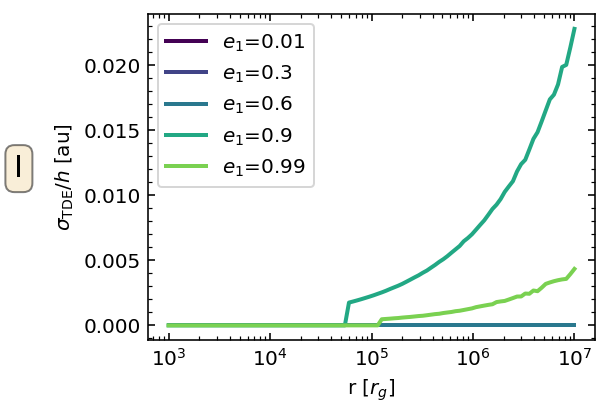

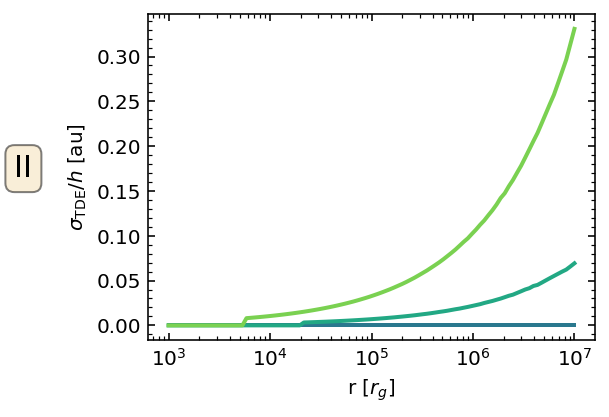

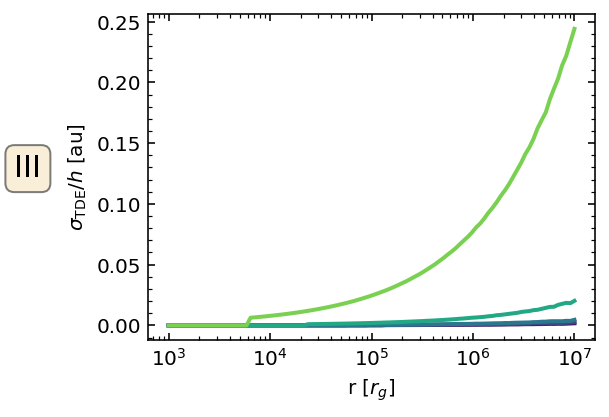

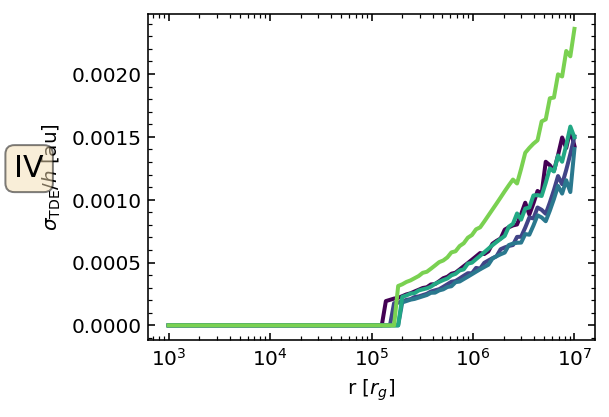

In [243]:
def macro_tde(m1, m2, m3):
    au = 1.5e11
    rg = m3*3000
    Rs = 6.957e8
    Rtde =(m3/m1)**(1.0/3)*m1**0.75*Rs
    
    #rs = np.array([100,1000, 10000, 100000])*rg
    
    #rs = np.array([0.1,1,10, 100])*au
    
   
    #es = [0.01,0.1,0.2]#,0.5,0.99]
    es = [0.01,0.3,0.6,0.9,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        
        f, axarr = plt.subplots(1,1 , gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4,3))
        
        for e0,c in zip(es,colors):
            rs = np.logspace(3,7,100)*rg
            tde = []
            for r in rs:
                bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1])
                b= np.logspace(np.log10(bmin),np.log10(bmax),100000)
                a1, e1, a2, e2, in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
                rp = a1*(1-e1)/Rtde
                
                
                index = (rp<=1)&in1
                boudary = index[1::] ^ index[0:-1]
                
                btde = b[1::][boudary]
                
                xx = 0
                if(len(btde)==2):
                    xx+=(btde.max()-btde.min())
                elif(len(btde)==4):
                    xx+=(btde[1]-btde[0]) + (btde[3]-btde[2])
                    
                a1, e1, a2, e2, in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], -1) 
                rp = a1*(1-e1)/Rtde
                
                index = (rp<=1)&in1
                boudary = index[1::] ^ index[0:-1]
                
                btde = b[1::][boudary]
                
                if(len(btde)==2):
                    xx+=(btde.max()-btde.min())
                elif(len(btde)==4):
                    xx+=(btde[1]-btde[0]) + (btde[3]-btde[2])
                    
                tde.append(xx)
                
            ax = f.axes[0]
            ax.plot(rs/rg, np.array(tde)/au,color=c,label= '$e_1$='+str(e0))
            ax.set_xscale('log')
            #ax.set_yscale('log')
            ax.set_xlabel('r [$r_g$]')
            ax.set_ylabel('$\\sigma_{\\rm TDE}/h$ [au]')
            
        if(csl=='I'):
            ax.legend()
        g=0.3
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        ax.text(xmin**(1+g)/xmax**g,ymin+(ymax-ymin)*0.5,csl,bbox=props,fontsize=15)
            #ax.set_yscale('log')
                #b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
            
                #a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
        plt.savefig('TDE-'+csl+'.pdf',dpi=400,bbox_inches='tight')
macro_tde(1,30,1e8)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-package

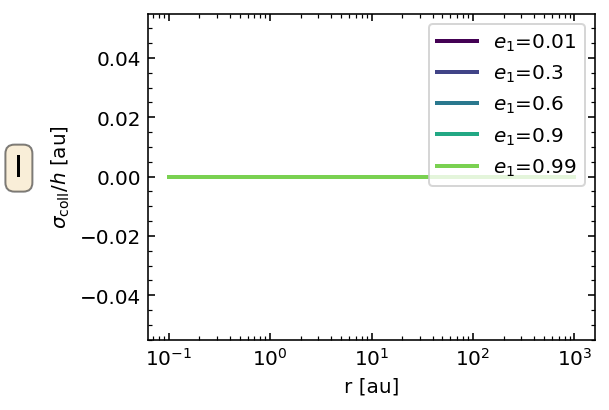

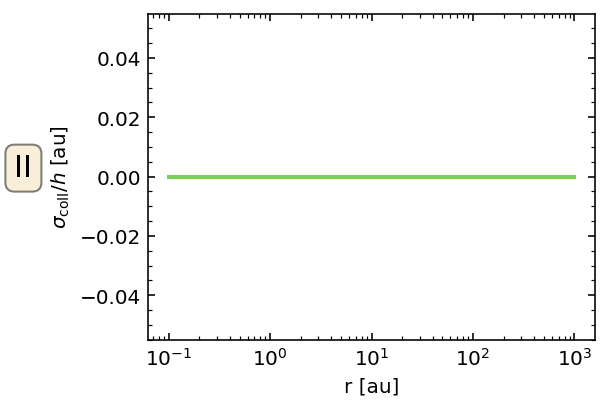

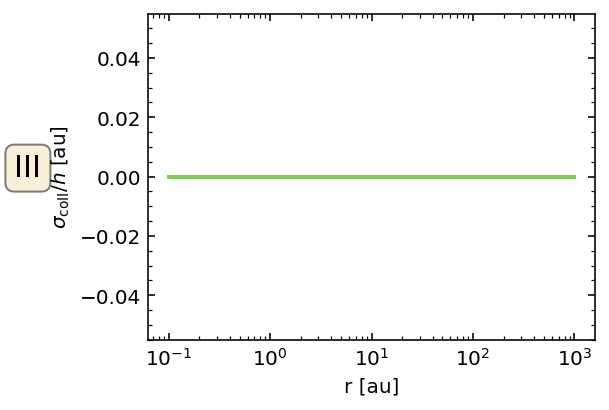

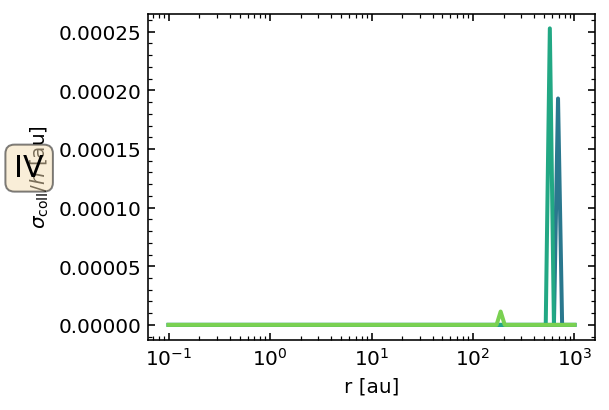

In [25]:
def planet_star_coll(m1, m2, m3):
    au = 1.5e11

    rmin = 6.95700e8
    
    #rs = np.array([100,1000, 10000, 100000])*rg
    
    rs = np.array([2,4,10, 100])*au
    
   
    #es = [0.01,0.1,0.2]#,0.5,0.99]
    es = [0.01,0.3,0.6,0.9,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        
        f, axarr = plt.subplots(1,1 , gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4,3))
        
        for e0,c in zip(es,colors):
            rs = np.logspace(-1,3,100)*au
            tde = []
            for r in rs:
                bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1], rmin)
                b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
                a1, e1, a2, e2, in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
                rp = a1*(1-e1)/rmin
                
                
                index = (rp<=1)&in1
                boudary = index[1::] ^ index[0:-1]
                
                btde = b[1::][boudary]
                
                xx = 0
                if(len(btde)==2):
                    xx+=(btde.max()-btde.min())
                elif(len(btde)==4):
                    xx+=(btde[1]-btde[0]) + (btde[3]-btde[2])
                    
                a1, e1, a2, e2, in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], -1) 
                rp = a1*(1-e1)/rmin
                
                index = (rp<=1)&in1
                boudary = index[1::] ^ index[0:-1]
                
                btde = b[1::][boudary]
                
                if(len(btde)==2):
                    xx+=(btde.max()-btde.min())
                elif(len(btde)==4):
                    xx+=(btde[1]-btde[0]) + (btde[3]-btde[2])
                    
                tde.append(xx)
                
            ax = f.axes[0]
            ax.plot(rs/au, np.array(tde)/au,color=c,label= '$e_1$='+str(e0))
            ax.set_xscale('log')
            #ax.set_yscale('log')
            ax.set_xlabel('r [au]')
            ax.set_ylabel('$\\sigma_{\\rm coll}/h$ [au]')
            
        if(csl=='I'):
            ax.legend()
        g=0.3
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        ax.text(xmin**(1+g)/xmax**g,ymin+(ymax-ymin)*0.5,csl,bbox=props,fontsize=15)
            #ax.set_yscale('log')
                #b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
            
                #a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
        plt.savefig('planet-star-coll-'+csl+'.pdf',dpi=400,bbox_inches='tight')
planet_star_coll(3e-6,3e-6,1)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-package

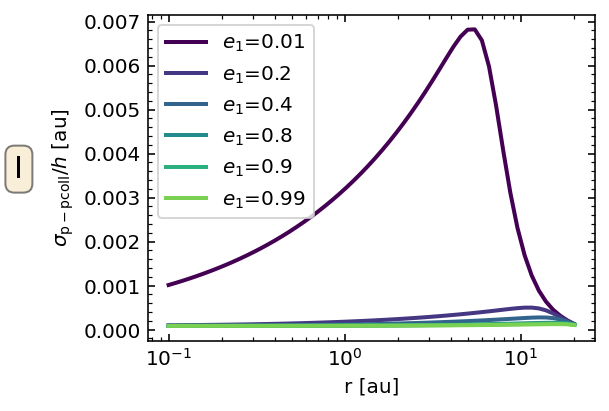

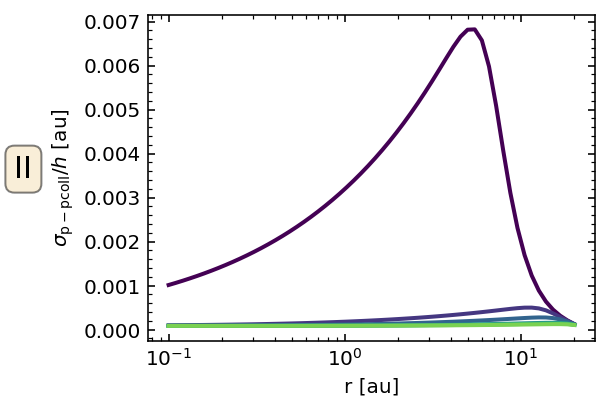

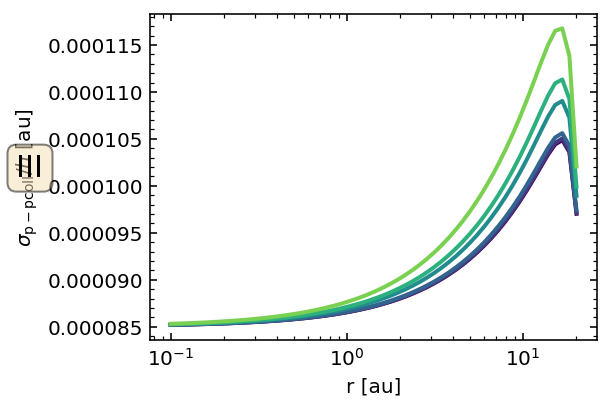

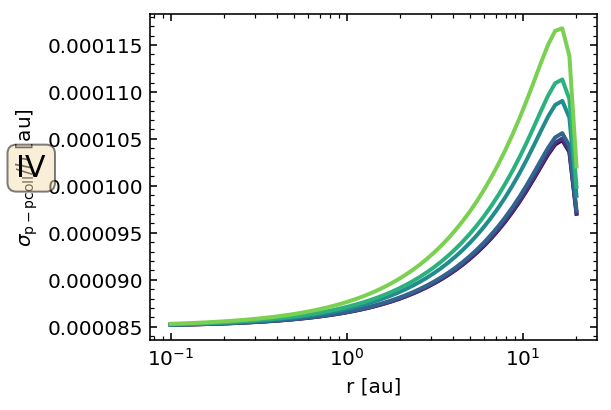

In [22]:
def planet_coll(m1, m2, m3):
    au = 1.5e11
    
    rmin = 6.3781e6*2
    
    #rs = np.array([100,1000, 10000, 100000])*rg
    
    #rs = np.array([0.1,1,10, 100])*au
    
   
    #es = [0.01,0.1,0.2]#,0.5,0.99]
    es = [0.01,0.2,0.4,0.8,0.9,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        #plt.figure(figsize = (4*lens,4))
        
        f, axarr = plt.subplots(1,1 , gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4,3))
        
        r = np.logspace(-1,3,100)*au

       
        R_hill = r*(m1/3/m3)**(1.0/3)
        for e0,c in zip(es,colors):
            bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1],rmin)
            ax = f.axes[0]
            ax.plot(r/au, bmin/au,color=c,label= '$e_1$='+str(e0))
            ax.set_xscale('log')
            ax.set_xlabel('r [au]')
            ax.set_ylabel('$\\sigma_{\\rm p-p coll}/h$ [au]')
            
        if(csl=='I'):
            ax.legend()
        g=0.3
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        ax.text(xmin**(1+g)/xmax**g,ymin+(ymax-ymin)*0.5,csl,bbox=props,fontsize=15)
            #ax.set_yscale('log')
                #b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
            
                #a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
        plt.savefig('planet-coll-'+csl+'.pdf',dpi=400,bbox_inches='tight')
planet_coll(3e-6,3e-6,1)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that

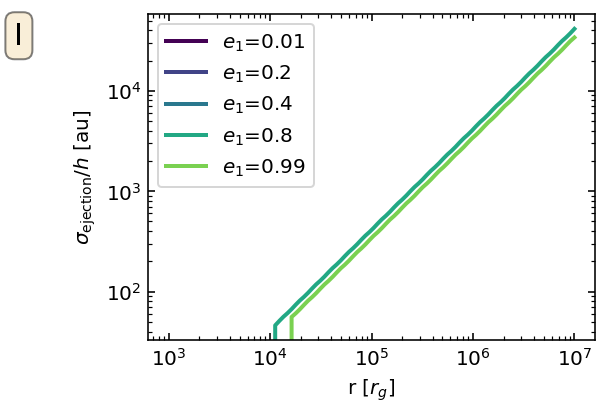

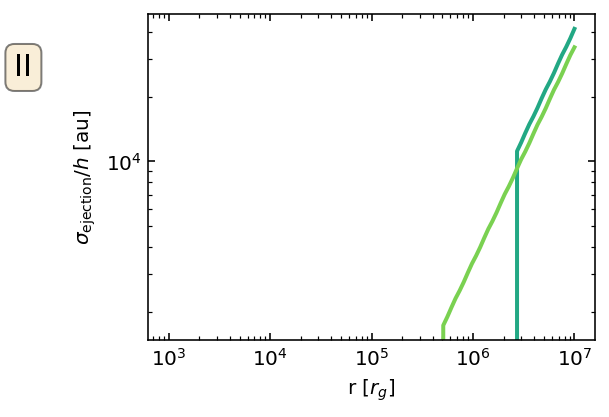

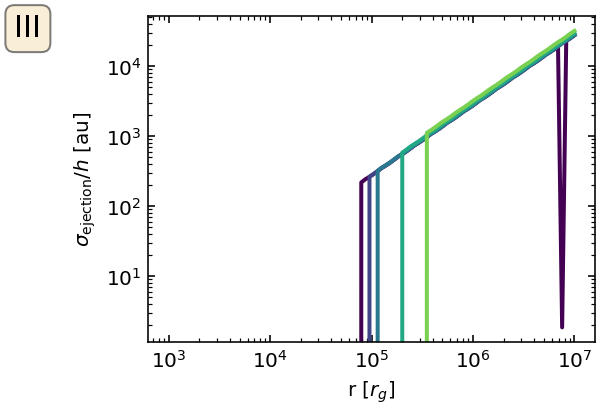

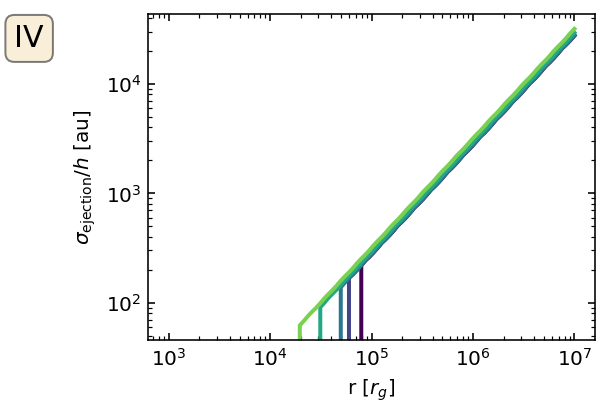

In [246]:
def eje(m1, m2, m3):
    au = 1.5e11
    rg = m3*3000
    Rs = 6.957e8
    Rtde =(m3/m1)**(1.0/3)*m1**0.75*Rs
    
    #rs = np.array([100,1000, 10000, 100000])*rg
    
    #rs = np.array([0.1,1,10, 100])*au
    
   
    #es = [0.01,0.1,0.2]#,0.5,0.99]
    es = [0.01,0.2,0.4,0.8,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        
        f, axarr = plt.subplots(1,1 , gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4,3))
        
        for e0,c in zip(es,colors):
            rs = np.logspace(3,7,100)*rg
            tde = []
            for r in rs:
                bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1])
                b= np.logspace(np.log10(bmin),np.log10(bmax),100000)
                a1, e1, a2, e2, in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
               
                
                index = (e1<=1)
                boudary = index[1::] ^ index[0:-1]
                
                btde = b[1::][boudary]
                
                xx = 0
                if(len(btde)==1):
                    xx+=b[index].max() - b[index].min()
                elif(len(btde)==2):
                    xx+=(btde.max()-btde.min())
                elif(len(btde)==3):
                    xx+=(btde[2]-btde[1]) + (btde[0]-b[index].min())
                elif(len(btde)==4):
                    xx+=(btde[1]-btde[0]) + (btde[3]-btde[2])
                    
                tde.append(xx*2)
                
                    
                
                
            ax = f.axes[0]
            ax.plot(rs/rg, np.array(tde)/au,color=c,label= '$e_1$='+str(e0))
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlabel('r [$r_g$]')
            ax.set_ylabel('$\\sigma_{\\rm ejection}/h$ [au]')
            
        if(csl=='I'):
            ax.legend()
        g=0.3
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        ax.text(xmin**(1+g)/xmax**g,ymin+(ymax-ymin)*0.5,csl,bbox=props,fontsize=15)
            #ax.set_yscale('log')
                #b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
            
                #a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
        plt.savefig('ejection-'+csl+'.pdf',dpi=400,bbox_inches='tight')
eje(1,30,1e8)

In [ ]:
def planet_eje(m1, m2, m3):
    au = 1.5e11
   
    Rs = 6.957e8
    rmin = 6.3781e6*2
    
    #rs = np.array([100,1000, 10000, 100000])*rg
    
    #rs = np.array([0.1,1,10, 100])*au
    
   
    #es = [0.01,0.1,0.2]#,0.5,0.99]
    es = [0.01,0.2,0.4,0.8,0.99]
    colors=cm.viridis(np.linspace(0,0.8,len(es)))
    
    cases=[(1,1,1),(1,-1,1),(-1,1,1),(-1,-1,1)]
    cas_label = ['I','II','III','IV']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for case,csl in zip(cases,cas_label):
        
        f, axarr = plt.subplots(1,1 , gridspec_kw = {'wspace':0.3, 'hspace':0.1},figsize=(4,3))
        
        for e0,c in zip(es,colors):
            rs = np.logspace(-1,3,100)*au
            tde = []
            for r in rs:
                bmin,bmax = calc_gen_b_range(m1, m2, m3,r,e0, r, case[0], case[1],rmin)
                b= np.logspace(np.log10(bmin),np.log10(bmax),100000)
                a1, e1, a2, e2, in1, in2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
               
                
                index = (e1<=1)
                boudary = index[1::] ^ index[0:-1]
                
                btde = b[1::][boudary]
                
                xx = 0
                if(len(btde)==1):
                    xx+=b[index].max() - b[index].min()
                elif(len(btde)==2):
                    xx+=(btde.max()-btde.min())
                elif(len(btde)==3):
                    xx+=(btde[2]-btde[1]) + (btde[0]-b[index].min())
                elif(len(btde)==4):
                    xx+=(btde[1]-btde[0]) + (btde[3]-btde[2])
                    
                tde.append(xx*2)
                
                    
                
                
            ax = f.axes[0]
            ax.plot(rs/au, np.array(tde)/au,color=c,label= '$e_1$='+str(e0))
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlabel('r [au]')
            ax.set_ylabel('$\\sigma_{\\rm p,ejection}/h$ [au]')
            
        if(csl=='I'):
            ax.legend()
        g=0.3
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()

        ax.text(xmin**(1+g)/xmax**g,ymin+(ymax-ymin)*0.5,csl,bbox=props,fontsize=15)
            #ax.set_yscale('log')
                #b= np.logspace(np.log10(bmin),np.log10(bmax),1000)
            
                #a1, e1, a2, e2 = build_gen_model(m1, m2, m3,r,e0, r,b, case[0], case[1], 1) 
        plt.savefig('planet-ejection-'+csl+'.pdf',dpi=400,bbox_inches='tight')
planet_eje(3e-6,3e-6,1)

/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
/home/yihanw/anaconda3/lib/python3.7/site-packages/ipyke

In [2]:
import orbits as ob

In [68]:
n,d = ob.load_spacehub_data('code/protraj-0.txt')

0.4684862221197117 -100.23200238657162 -0.466301656341958 -99.76461185088793


(-4.0836467824488984,
 75.49794599190379,
 -101.7581869651678,
 -68.18212623605214)

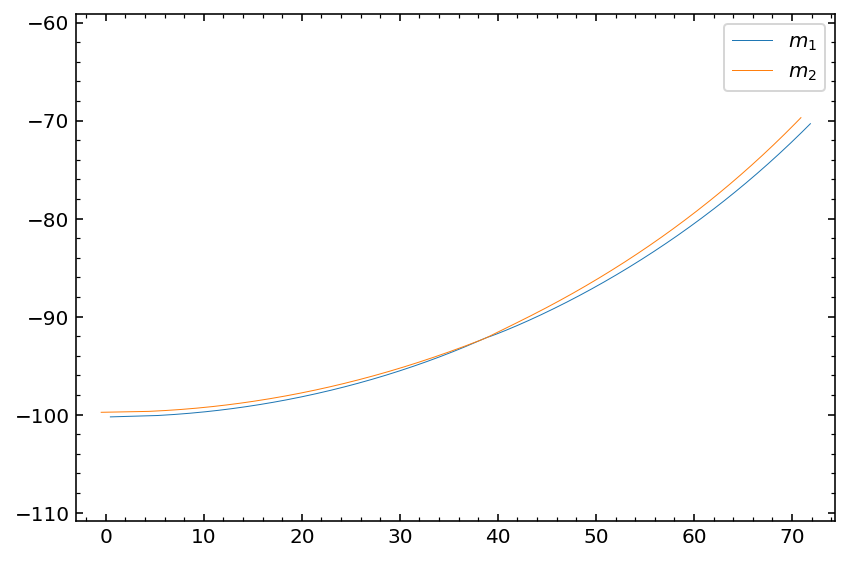

In [69]:
select = d['time']<(d['time'][-1]/1)

plt.plot(d['px1'][select],d['py1'][select],label='$m_1$',lw=0.5)
plt.plot(d['px2'][select],d['py2'][select],label='$m_2$',lw=0.5)
#plt.plot(d['px0'][select],d['py0'][select],label='$m_3$',lw=5)
plt.legend()

print(d['px1'][0],d['py1'][0], d['px2'][0],d['py2'][0])

plt.axis('equal')
#plt.xlim(-120,120)
#plt.ylim(-120,120)

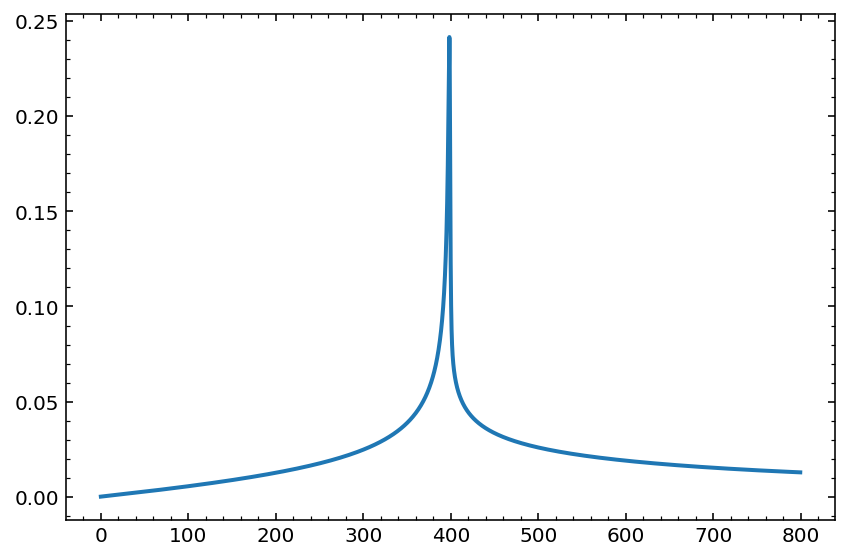

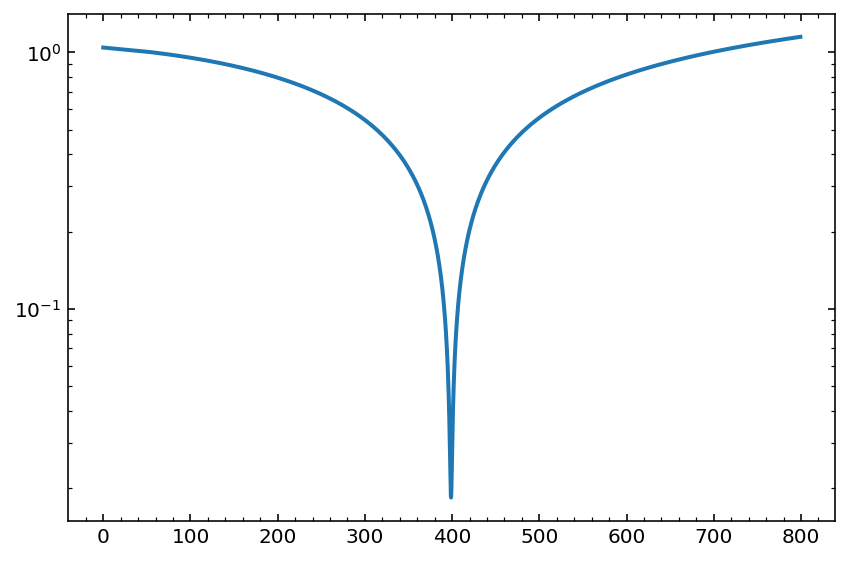

In [70]:
ex,ey,ez =ob.get_ecc(d,0,2)
e = np.sqrt(ex**2 + ey**2 +ez**2)
plt.plot(d['time'],e)

dx,dy, dz = ob.distance(d,'p',1,2)
r=np.sqrt(dx**2 + dy**2 + dz**2)
plt.figure()
plt.plot(d['time'],r)
plt.yscale('log')